In [1]:

#!pip install fuzzy-c-means
#!cp -r numpy* /opt/conda/lib/python3.7/site-packages/


In [2]:
#print(pd.__version__)
#import numpy as np
#print(np.__version__)

In [3]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

0.25.2
1.17.3


In [4]:
!pwd

/dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection


### Get file names functions in a specific path

In [5]:
from PerformClusteringFunctions import Specific_Names,Get_All_csv_pathnamesWithPatterns,\
Get_All_csv_pathnames,Get_All_png_pathnames,ProcessResultFilesForPyramids,\
PlotByDate,SubsetDataShannon,GetUnique_Dates,nested_dict,Get_Single_Way_Counted_with_CutOff,\
Get_Both_Way_Counted_with_CutOff,GiveFeaturesToBeCountedAndCutOff,TestKmeans,ApplyKmeans,\
RemoveAllFilesInADirectory,CopyFiles,getVariantFeatures,GeneratePlotsForFeatures,\
GeneratePlotsIntoApdfForFeatures,printConfusionMatrixAndReport,buildBoxPlot,\
buildBoxPlotWithGroupBy,buildBoxPlotWithGroupBySeperately,UniqueOfLabel,getDataFeaturesStatistics,CallTNSE,\
PlotStatsForLabelClusters,getVaryingData,CombineData,ApplyDBSCAN,shuffleLabelAsPerDescRespRate,\
PlotStatsForLabelClusters,getVariantFeatures

#ApplyFuzzyCMenas,

import os
import pandas as pd
from glob import glob
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages
#from ggplot import *
from collections import Counter
from HouseKeepingFunctions import CheckFileExistence,CreateDirectory


In [6]:
pwd

'/dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection'

In [7]:
from rpy2.robjects.lib import ggplot2
from rpy2.robjects import r
from rpy2.robjects.packages import importr

scales = importr('scales')

/opt/conda/lib/python3.7/site-packages/rpy2/robjects/lib/ggplot2.py:67: UserWarning: This was designed againt ggplot2 version 2.2.1 but you have 3.2.1
  warnings.warn('This was designed againt ggplot2 version %s but you have %s' % (TARGET_VERSION, ggplot2.__version__))


In [8]:
import collections
from plotnine.data import mpg
from plotnine import ggplot, aes, labs, geom_point, geom_line, geom_bar, facet_grid, facet_wrap, theme



In [9]:
def getVariantFeatures(df_dataa):
    
    Features_Cluster_Cols=['RMSSD_B2B', 'mDi_B2B', 'RMSSD_B2B_diffInAmplitudes',\
                       'mDi_B2B_diffInAmplitudes','Max_B2B_diffInAmplitudes', 'Min_B2B_diffInAmplitudes',\
                       'RMSSD_B2B_diffInHeights', 'mDi_B2B_diffInHeights','Max_B2B_diffInHeights',
                       'Min_B2B_diffInHeights','Normal']#,'Max_B2B', 'Min_B2B','Normal_IE_Ratio_PerMin','Var_I_only','Var_E_only', 'Var_I_by_Total', 'Var_Total_IE',\
                       #'Var_Diff_IE','percentageIE', 'Resp_Rate_per_minute', 'Ratio_MD_Amp',\
                       #'Ratio_RMSD_Amp', 'Diff_Max_Min_I', 'Diff_Max_Min_E', 'RMI']#, 'Normal']
    
    #Features_Cluster_Cols=['Ru_mDI','Ru_RespRate','Ru_RMSSD','Ru_MADI','Ru_RMI','Ru_RMDA_RMS','Restlessness3Sec','NAsign',\
     #                      'Ru_A_RMSi','Ru_A_RMSe']#,\
    
    Features_Cluster_Cols=['Ru_mDI','Ru_RespRate','Ru_RMSSD','Ru_MADI','Ru_RMI','Ru_RMDA_RMS','Restlessness3Sec','NAsign',\
                          'A_Mean_i','A_Mean_e','ht_Mean_av','ht_Mean_max','ht_RMS_av','ht_RMS_max','Ru_A_RMSi','Ru_A_RMSe']
                          #'A_inter_mean','A_inter_RMS']#,\
    
    #'Restlessness2Sec','Restlessness1Sec']#'Mean_Prom',#,'Max_Prom','Min_Prom']#,'Min_Prom']#'RMS_Prom']#,,'Max_Prom','Min_Prom']#,\
                          #'Ru_A_RMSi','Ru_A_RMSe','Ru_RMDA_RMS']
                            #] #,,,,,,'Ru_SD_RR',,
    """
    Features_Cluster_Cols=['Max_B2B', 'Min_B2B','Normal_IE_Ratio_PerMin','Var_I_only','Var_E_only', 'Var_I_by_Total', 'Var_Total_IE',\
                       'Var_Diff_IE','percentageIE', 'Resp_Rate_per_minute', 'Ratio_MD_Amp',\
                       'Ratio_RMSD_Amp', 'Diff_Max_Min_I', 'Diff_Max_Min_E', 'RMI']#, 'Normal']
    Features_Cluster_Cols=['RMSSD_B2B', 'mDi_B2B', 'RMSSD_B2B_diffInAmplitudes',\
                       'mDi_B2B_diffInAmplitudes','Max_B2B_diffInAmplitudes', 'Min_B2B_diffInAmplitudes',\
                       'RMSSD_B2B_diffInHeights', 'mDi_B2B_diffInHeights','Max_B2B_diffInHeights',
                       'Min_B2B_diffInHeights','Normal_IE_Ratio_PerMin','Var_I_only','Var_E_only', 'Var_I_by_Total', 'Var_Total_IE',\
                       'Var_Diff_IE','percentageIE', 'Resp_Rate_per_minute', 'Ratio_MD_Amp',\
                       'Ratio_RMSD_Amp', 'Diff_Max_Min_I', 'Diff_Max_Min_E', 'RMI'] 
                     
    Features_Cluster_Cols=['Max_B2B_diffInAmplitudes', 'Min_B2B_diffInAmplitudes',\
                       'Max_B2B_diffInHeights','Min_B2B_diffInHeights','percentageIE',\
                           'Diff_Max_Min_I', 'Diff_Max_Min_E','Normal'] #'Resp_Rate_per_minute',
   
    
    Features_Cluster_Cols=['RMSSD_B2B', 'mDi_B2B', 'RMSSD_B2B_diffInAmplitudes',\
                       'mDi_B2B_diffInAmplitudes','Max_B2B_diffInAmplitudes', 'Min_B2B_diffInAmplitudes',\
                       'RMSSD_B2B_diffInHeights', 'mDi_B2B_diffInHeights','Max_B2B_diffInHeights',
                       'Min_B2B_diffInHeights','Normal_IE_Ratio_PerMin','Var_I_only','Var_E_only', 'Var_I_by_Total', 'Var_Total_IE',\
                       'Var_Diff_IE','percentageIE', 'Resp_Rate_per_minute', 'Ratio_MD_Amp',\
                       'Ratio_RMSD_Amp', 'Diff_Max_Min_I', 'Diff_Max_Min_E', 'RMI'] 
    """ 
    #target=df_data['Target'].to_list()
    Index=df_dataa['Start_End'].to_list()
    df_dataa=df_dataa.drop(columns=['Start_End'])
    df_dataa['Normal'].replace(['Yes', 'No'],[1, 0], inplace=True)
    
    VariantFeatures=[]
    for i in Features_Cluster_Cols:
        if i=="NAsign":  #
            VariantFeatures.append(i)#
            continue #
        print(i," ",df_dataa[i].var())
        if(df_dataa[i].var()>0.5):
            VariantFeatures.append(i)

    print(len(VariantFeatures))
    print(VariantFeatures)

    df_variant = df_data[VariantFeatures]
    print(df_variant.shape)
    display(df_variant.head())
    df_variant=df_data[Features_Cluster_Cols]
    return(df_variant)

#### THIS COLUMN JUST FETCHEs IDs and related dates and columns

In [10]:


import matplotlib.pyplot as plt
import datetime
import os


#Noise='Drop' BPI_Call='Drop', , WithoutNoise_WithoutBPI
#Noise='No' BPI_Call='Drop', ,   WithNoise_WithoutBPI
#Noise='No' BPI_Call='No' ,      WithNoise_WithBPI
#Noise='Drop' BPI_Call='No', ,   WithoutNoise_WithBPI
IndexFilePath='/dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/\
PlottingCombined/Predictions_WithoutNoise_WithBPI/'
CreateDirectory(IndexFilePath)

Noise='Drop'
Drop=""#['Restlessness3Sec','Ru_RMDA_RMS']



#Ids=['6219','6115','3121','3054', '3083','3127','3104']#,'3054','3083'] #
#Ids=['6219','6115','3121','3127','3104', '3126', '3083','3111']#,'3054']
#'6219'] #,
Ids=['54006']
#Ids=['3127']

Ids=['3054']
Ids=['3083']
Ids=['6507']
Ids=['3054']

Extension=".csv"
#FileEndingName='Shannon.csv'
FilenameEnding="Features_Cluster.csv"#"_Shannon.csv" 
#MainPath='/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/Features_MACResults_TestingPeakDetect_WithoutImages/'#Features_MACResults_TestingMAC/'#3127_lt18/'#AMIA_Pub_LT_18/'#AMIA_Pub/'
#MainPath="/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/Features_MACResults_TestingPeakDetect2/"
#MainPath='/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/Features_MACResults_TestingPeakDetect_WithoutImages_AmplitudeTest/'
MainPath='/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/Features_MACResults_TestingPeakDetect_WithImages_AmplitudeTest/'
#MainPath='/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/Features_MACResults_TestingPeakDetect_WithImages_AmplitudeTest_RemovingNoise/'
pp='/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/' #Whole
#MainPath=pp+'Features_MACResults_TestingPeakDetect_WithoutImages_AmplitudeTest_ProminenceTest/'
MainPath=pp+'Features_MACResults_TestingPeakDetect_WithoutImages_AmplitudeTest_ProminenceTest_WithHeight/' ######

########MainPath=pp+'COPD_IndexProgressionExperimentalDates/' #COPD INdex
#MainPath=pp+'Features_MACResults_TestingPeakDetect_WithoutImages_AmplitudeTest_ProminenceTest_WithNoiseCancellation/'
PlotFilePath=MainPath+'Summed_Plots.pdf'
if os.path.exists(PlotFilePath):
    os.remove(PlotFilePath)
#After removing the previous file create new file


#cols=['StartTime','EndTime','IE']
df_data=pd.DataFrame()


transducerNum=1
Date_dict=dict()
for i in Ids:
    path=MainPath+i+"/"
    All_Files=Get_All_csv_pathnames(path)
    #print(i,All_Files)
    
    df_data=pd.DataFrame()
    Date_dict[i]=GetUnique_Dates(All_Files)
    #print(i,Dates)
print(Date_dict)    

/dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/ folder already exists.
{'3054': ['2018-08-30', '2018-09-30', '2018-10-15', '2018-11-27', '2018-12-13', '2019-05-21', '2019-06-01', '2019-07-24', '2019-08-10', '2019-09-24', '2019-10-04', '2019-11-22', '2019-12-22', '2020-01-01', '2020-02-18', '2020-02-26', '2020-03-29', '2020-04-20', '2020-05-18', '2020-06-11', '2020-07-01', '2021-06-03', '2021-07-31']}


In [11]:
#Date_dict={'3054': ['2020-01-15', '2019-10-02', '2019-08-21', '2020-04-24'], \
# '3083': ['2019-04-05']}

#Date_dict={'3054': ['2020-01-15', '2019-10-02'], \
# '3083': ['2019-04-05']}

##Date_dict={'3054': ['2018-09-05', '2018-12-30', '2019-07-15', '2019-08-21', '2019-10-02', '2020-01-15', '2020-04-24']}
#Date_dict={'3083': ['2019-05-08']}#['2019-06-08']}# # Best Cycles in terms of IE for Non-COPd 
#Date_dict={'3054': ['2020-01-15'],'3083': ['2019-05-08']}#['2020-04-24']}# # Best cycles in terms of IE for COPD for 
#Date_dict={'3127':['2019-12-05']}
#feature extraction and clustering because a lot of COPD specific features are expected to be traced in this
#Date_dict={'3127':['2020-04-06']}

#Date_dict={'3083': ['2019-06-08']} #'3083': ['2019-05-08', '2019-06-08']}
#Date_dict={'3054': ['2020-04-24']} #['2019-08-21', '2019-10-02', '2020-01-15', '2020-03-05', '2020-04-24']
Date_dict={'3054': ['2018-08-30', '2018-09-30', '2018-10-15', '2018-11-27', '2018-12-13', '2019-05-21','2019-06-01', '2019-07-24', '2019-08-10', '2019-09-24', '2019-10-04', '2019-11-22', '2019-12-22', '2020-01-01',\
                    '2020-02-18', '2020-02-26', '2020-03-29', '2020-04-20', '2020-05-18', '2020-06-11', '2020-07-01', '2020-07-02', '2021-06-03']}#, '2021-07-31']}

Date_dict={'3054': ['2018-08-30', '2018-09-30', '2018-10-15', '2018-11-27', '2018-12-13', '2019-05-21', \
                    '2019-06-01', '2019-07-24', '2019-08-10', '2019-09-24', '2019-10-04', '2019-11-22', \
                    '2019-12-22', '2020-01-01', \
                    '2020-02-18', '2020-02-26', '2020-03-29', '2020-04-20', '2020-05-18', '2020-06-11', \
                    '2020-07-01', '2021-06-03', '2021-07-31']}

#Date_dict={'3127': ['2019-07-25', '2019-08-04', '2019-09-03', '2019-10-15', '2019-11-19', '2019-12-20', '2020-01-15', '2020-02-28', '2020-03-01']}
#Date_dict={'3083': ['2019-02-15', '2019-03-23', '2019-04-05', '2019-05-28', '2019-06-09', '2019-07-25']}#, '2019-09-23', '2019-10-31']}
#Date_dict={'3083':['2019-07-25',  '2019-09-03', '2019-10-15','2019-11-19', '2019-12-20', '2020-01-15',\
# '2020-02-28','2020-03-01', '2020-04-03']} #'2019-08-04',
#Date_dict={'3054': ['2018-08-30','2018-12-13','2019-08-10','2019-12-02','2020-01-01']}


#Date_dict={'3054': ['2018-08-30', '2018-09-30', '2018-10-15', '2018-11-27', '2018-12-13', '2019-05-21', '2019-06-01', '2019-07-24', '2019-08-10', '2019-09-24', '2019-10-04', '2019-11-22', '2019-12-22', '2020-01-01', '2020-02-18', '2020-02-26', '2020-03-29', '2020-04-20', '2020-05-18', '2020-06-11', '2020-07-01', '2021-06-03', '2021-07-31'],\
# '6115': ['2018-07-14', '2018-08-01', '2018-10-30', '2018-11-17', '2018-12-31', '2019-01-14', '2019-02-16', '2019-03-07']}

#Date_dict={'54005':['2018-02-01', '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05', '2018-02-06', '2018-02-07', '2018-02-08', '2018-02-09', '2018-02-10', '2018-02-11', '2018-02-12', '2018-02-14', '2018-02-15']}
#Date_dict={'54006':['2017-10-01', '2017-10-02', '2017-10-03', '2017-10-04', '2017-10-06', '2017-10-07', '2017-10-08', '2017-10-10', '2017-11-06', '2017-10-13', '2017-10-14']}



In [11]:
Date_dict={'6219': ['2019-08-21', '2019-09-25', '2019-10-13', '2019-11-12', '2019-12-29', '2020-01-24', '2020-02-07'], \
 '6115': ['2018-07-14', '2018-08-01', '2018-10-30', '2018-11-17', '2018-12-31', '2019-01-14', '2019-02-16',\
          '2019-03-07'], \
 '3121': ['2018-08-19', '2018-09-26', '2018-10-02', '2018-11-27', '2018-12-21',\
                                  '2019-01-08'], \
 '3127': ['2019-07-25', '2019-08-04', '2019-09-03', '2019-10-15', '2019-11-19', '2019-12-20', '2020-01-15',\
          '2020-02-28', '2020-03-01'], '3104': ['2019-02-16', '2019-03-04', '2019-03-15', '2019-04-02', '2019-06-27',\
                                                '2019-07-26', '2019-08-21', '2019-09-14', '2019-10-03', '2019-11-22'],\
 '3126': ['2018-12-16', '2019-01-12', '2019-02-18', '2019-03-21', '2019-08-24', '2019-09-02', '2019-10-01'],\
 '3083': ['2019-02-15', '2019-03-23', '2019-04-05', '2019-05-28', '2019-06-09', '2019-07-25', '2019-08-05'], \
 '3111': ['2018-07-31', '2018-08-07', '2018-09-18', '2018-10-18', '2018-11-04', '2019-01-21', '2019-02-13', \
          '2019-03-19', '2019-07-12', '2019-08-30', '2019-09-10', '2019-11-07', '2019-12-28', '2020-01-27', \
          '2020-02-01']}







##### ###### Built on features for kmeans ################

In [12]:
#_Features



from collections import defaultdict
#SummedData = defaultdict(dict)
SummedData=[]

ShannonStats=[]
df_Comb=pd.DataFrame()
pdf = PdfPages(PlotFilePath)
for IDs in Date_dict.keys():
    print("id",IDs)
    for eachDate in list(Date_dict[IDs]):
        print(eachDate)
        
        path=MainPath+IDs+"/"
        All_Files=Get_All_csv_pathnames(path)
        #print(i,All_Files)
        #print("****************ID ",IDs,eachDate," begins here*****************")
        df_data=pd.DataFrame()
        df_filtered=pd.DataFrame()
        
        for eachfile in All_Files:
            #print(i,eachfile)
            #ProcessResultFilesForPyramids(eachfile,i)
            #print(eachfile)
            if ((eachDate in eachfile) and (str(IDs) in eachfile) and (eachfile.endswith(FilenameEnding))):
                #print(">>###########",eachDate,IDs,"\n",FilenameEnding,eachfile)
                GetData=ProcessResultFilesForPyramids(eachfile,IDs)
                #print(">>>>>>>>>>>",GetData.empty())
                if(len(GetData)>0):
                    #display(GetData.head())
                    df_data=df_data.append(ProcessResultFilesForPyramids(eachfile,IDs))
                    #display((ProcessResultFilesForPyramids(eachfile,IDs)).head())
                    #display(df_data.tail())
            #else:
            #    print("helloooo")#,"\n",IDs,eachDate,"\n",eachfile,"\n")
        
        
        Images=Get_All_png_pathnames(path)
        #df_filtered=SubsetDataShannon(df_data)
        
        #df_data=df_data.reset_index()
        #print("hi>>>>>>>>>>>>>>")
        #####display(df_data.head())
        #print(df_data.shape)
        #print("hi>>>>>>>>>>>>>>",eachDate)
        
        Index=df_data['Start_End'].to_list()
        
        df_Mid=pd.DataFrame()
        df_Mid=getVariantFeatures(df_data)
        df_Mid['Index']=df_data['Start_End']
        #df_3083['target']=1
        df_Mid['ID']=IDs
        df_Mid['Date']=eachDate
        df_Comb=df_Comb.append(df_Mid)
        print(">>>>>>>>########>>>>>>>>>")
        #####display(df_Comb.head())
        #print(np.unique(df_Comb['ID']),IDs)
        print(">>>>>>>>########>>>>>>>>>")
        #buildBoxPlot(df_3083,'BoxPlot_temporal2/'+IDs+'_'+eachDate+'.png')
        #f, ax = plt.subplots(1, 1, figsize = (15, 10))
        #calmap.yearplot(events, year=2015, ax=ax)
        #boxplot = df_3083.boxplot(by='Date',ax=ax)
        #plt.tight_layout()
        #plt.show()
        #break
        
        """
        Below_03=(len(list(neg for neg in test if neg<0.3))/df_filtered.shape[0])*100
        Greater_06=(len(list(neg for neg in test if neg>0.6))/df_filtered.shape[0])*100
        SummedData.append([eachDate,IDs,Bet_03_06])
        
        #print("Bet_03_06",Bet_03_06, eachDate)
        #print("Not_Bet_03_06",df_data.shape[0]-Bet_03_06)
        #print("All ",Bet_03_06+Below_03+Greater_06)
        """
        #print("****************ID ",IDs,eachDate," Ends here*****************")
    #break
    
    #break
#df_data.head(20)
#display(df_pyr.head())
#SummedData

pdf.close()
           

id 3054
2018-08-30
Ru_mDI   0.08227759395267879
Ru_RespRate   1.676538908246225
Ru_RMSSD   0.1345135785450694
Ru_MADI   0.4629617073170733
Ru_RMI   0.0056680563461613265
Ru_RMDA_RMS   0.006684282695233156
Restlessness3Sec   5.286297887838063
A_Mean_i   522.9611936402644
A_Mean_e   563.2221158066741
ht_Mean_av   536.4033935149245
ht_Mean_max   326.3394671588368
ht_RMS_av   1283.6313278840641
ht_RMS_max   505.3065249370181
Ru_A_RMSi   1886.2302856052188
Ru_A_RMSe   1414.679493816571
11
['Ru_RespRate', 'Restlessness3Sec', 'NAsign', 'A_Mean_i', 'A_Mean_e', 'ht_Mean_av', 'ht_Mean_max', 'ht_RMS_av', 'ht_RMS_max', 'Ru_A_RMSi', 'Ru_A_RMSe']
(246, 11)


Ru_RespRate  Restlessness3Sec NAsign   A_Mean_i   A_Mean_e  ht_Mean_av  \
0           15             1.005     no  67.249806  67.641407   67.445607   
1           13             3.030     no  73.471161  74.133066   73.802113   
2           15             0.000     no  67.332095  67.648656   67.490375   
3           15             1.000     no  65.794286  67.346482   66.570384   
4           14             1.005     no  66.378992  66.256389   66.317691   

   ht_Mean_max  ht_RMS_av  ht_RMS_max  Ru_A_RMSi  Ru_A_RMSe  
0    58.715558  68.550857   61.245065  70.247744  68.926481  
1    70.136355  74.830520   71.578562  74.742528  75.191904  
2    64.561745  67.930965   65.000561  67.912948  68.107270  
3    62.853207  67.119214   63.404919  66.720473  67.821066  
4    62.401527  66.755667   62.907653  67.203515  66.613149

>>>>>>>>########>>>>>>>>>
>>>>>>>>########>>>>>>>>>
2018-09-30


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

Ru_mDI   0.059235991195859386
Ru_RespRate   4.837571456731717
Ru_RMSSD   0.10148826749146543
Ru_MADI   0.39926707780687676
Ru_RMI   0.010031645249782716
Ru_RMDA_RMS   0.0045244854842381235
Restlessness3Sec   7.036474985919856
A_Mean_i   245.07734457529605
A_Mean_e   247.19620987129866
ht_Mean_av   245.13874371788125
ht_Mean_max   165.41947093885207
ht_RMS_av   515.045350328559
ht_RMS_max   215.38953015687676
Ru_A_RMSi   800.6301601645026
Ru_A_RMSe   506.08163519099503
11
['Ru_RespRate', 'Restlessness3Sec', 'NAsign', 'A_Mean_i', 'A_Mean_e', 'ht_Mean_av', 'ht_Mean_max', 'ht_RMS_av', 'ht_RMS_max', 'Ru_A_RMSi', 'Ru_A_RMSe']
(267, 11)


Ru_RespRate  Restlessness3Sec NAsign   A_Mean_i   A_Mean_e  ht_Mean_av  \
0           18               0.0     no  74.315195  72.538124   73.426659   
1           17               1.0     no  69.732777  73.870274   71.801525   
2           16               0.0     no  60.090145  60.503586   60.296866   
3           15               2.0     no  60.862986  61.859029   61.361007   
4           17               3.0    yes  80.112943  79.357909   79.735426   

   ht_Mean_max  ht_RMS_av  ht_RMS_max   Ru_A_RMSi  Ru_A_RMSe  
0    63.096314  74.691237   64.900658   78.153324  74.922379  
1    62.053929  74.665924   66.145887   76.082231  75.316260  
2    57.776138  60.544719   58.219608   60.486004  60.794079  
3    58.249338  61.626331   58.578221   61.513331  61.983627  
4    69.901701  94.508826   79.366164  102.646632  89.257041

>>>>>>>>########>>>>>>>>>
>>>>>>>>########>>>>>>>>>
2018-10-15
Ru_mDI   0.046449161025914024
Ru_RespRate   3.0017003676470586
Ru_RMSSD   0.07649407221303438
Ru_MADI   0.26439832682291664
Ru_RMI   0.0058307638702104515
Ru_RMDA_RMS   0.0018190562623888204
Restlessness3Sec   3.084909348958333
A_Mean_i   565.5885649959398
A_Mean_e   561.7049567300251
ht_Mean_av   562.9289780171121
ht_Mean_max   473.1412584707564
ht_RMS_av   640.0681457565994
ht_RMS_max   510.64907264187644
Ru_A_RMSi   702.5572097656045
Ru_A_RMSe   648.6544776769724
11
['Ru_RespRate', 'Restlessness3Sec', 'NAsign', 'A_Mean_i', 'A_Mean_e', 'ht_Mean_av', 'ht_Mean_max', 'ht_RMS_av', 'ht_RMS_max', 'Ru_A_RMSi', 'Ru_A_RMSe']
(256, 11)


Ru_RespRate  Restlessness3Sec NAsign   A_Mean_i   A_Mean_e  ht_Mean_av  \
0           16               0.0     no  53.777475  53.563676   53.670575   
1           15               0.0     no  52.229903  52.277179   52.253541   
2           15               0.0     no  50.228004  50.056720   50.142362   
3           15               0.0     no  48.072619  47.541101   47.806860   
4           15               1.0     no  49.375296  48.995062   49.185179   

   ht_Mean_max  ht_RMS_av  ht_RMS_max  Ru_A_RMSi  Ru_A_RMSe  
0    52.326685  53.754822   52.402716  53.909970  53.648447  
1    50.128011  53.040980   51.044618  53.151679  53.045671  
2    48.316102  50.227219   48.438537  50.388709  50.147528  
3    45.777301  48.006070   46.014517  48.406994  47.741141  
4    47.230883  49.292960   47.375001  49.583883  49.108901

>>>>>>>>########>>>>>>>>>
>>>>>>>>########>>>>>>>>>
2018-11-27
Ru_mDI   0.10509717862300814
Ru_RespRate   2.098095323258517
Ru_RMSSD   0.17310888301439617
Ru_MADI   0.5354656638424395
Ru_RMI   0.005260258257641331
Ru_RMDA_RMS   0.00464836145027546
Restlessness3Sec   2.1508327304837698
A_Mean_i   376.1529260466722
A_Mean_e   379.81278590947664
ht_Mean_av   374.8151682185988
ht_Mean_max   247.6935088458785
ht_RMS_av   583.1333274803148
ht_RMS_max   277.4455077673828
Ru_A_RMSi   840.1868326409548
Ru_A_RMSe   660.7328570913425
12
['Ru_RespRate', 'Ru_MADI', 'Restlessness3Sec', 'NAsign', 'A_Mean_i', 'A_Mean_e', 'ht_Mean_av', 'ht_Mean_max', 'ht_RMS_av', 'ht_RMS_max', 'Ru_A_RMSi', 'Ru_A_RMSe']
(212, 12)


Ru_RespRate  Ru_MADI  Restlessness3Sec NAsign   A_Mean_i   A_Mean_e  \
0           15    1.855               0.0     no  57.465241  54.796519   
1           14    0.615               0.0     no  53.441252  54.394597   
2           16    0.860               1.0     no  68.701594  70.121245   
3           15    1.155               2.0     no  63.353559  63.157099   
4           16    0.710               0.0     no  64.309023  62.743398   

   ht_Mean_av  ht_Mean_max  ht_RMS_av  ht_RMS_max  Ru_A_RMSi  Ru_A_RMSe  
0   56.130880    52.268783  56.730244   52.549606  58.829149  55.386130  
1   53.917925    51.814077  54.696019   52.484911  54.411380  55.102443  
2   69.411420    63.442613  70.675050   64.678253  70.962010  71.137991  
3   63.255329    56.918576  66.324289   59.544937  66.729907  67.402246  
4   63.526210    58.583755  65.225707   60.228280  67.388603  63.799759

>>>>>>>>########>>>>>>>>>
>>>>>>>>########>>>>>>>>>
2018-12-13
Ru_mDI   0.08106970670058276
Ru_RespRate   1.5219314336961398
Ru_RMSSD   0.1504180610262642
Ru_MADI   0.5211920794097264
Ru_RMI   0.002969794298481044
Ru_RMDA_RMS   0.005009594477601754
Restlessness3Sec   2.4178817929354692
A_Mean_i   488.23812116148775
A_Mean_e   451.1298178563756
ht_Mean_av   466.695307916099
ht_Mean_max   360.22812253921177
ht_RMS_av   769.3916972882486
ht_RMS_max   423.60335391579713
Ru_A_RMSi   1100.1565951430227
Ru_A_RMSe   691.57471954407
12
['Ru_RespRate', 'Ru_MADI', 'Restlessness3Sec', 'NAsign', 'A_Mean_i', 'A_Mean_e', 'ht_Mean_av', 'ht_Mean_max', 'ht_RMS_av', 'ht_RMS_max', 'Ru_A_RMSi', 'Ru_A_RMSe']
(222, 12)


Ru_RespRate  Ru_MADI  Restlessness3Sec NAsign   A_Mean_i   A_Mean_e  \
0           15     1.58               0.0     no  86.855930  90.632646   
1           15     0.89               1.0     no  75.306603  74.244960   
2           16     0.33               0.0     no  72.238666  71.353350   
3           15     0.47               0.0     no  68.412349  66.441375   
4           15     0.58               0.0     no  68.225468  69.463034   

   ht_Mean_av  ht_Mean_max  ht_RMS_av  ht_RMS_max  Ru_A_RMSi  Ru_A_RMSe  
0   88.744288    81.355307  89.814731   82.031966  88.848633  91.978532  
1   74.775782    70.499604  75.207048   71.060755  76.483430  74.491522  
2   71.796008    68.551599  72.464347   69.527056  73.064756  72.080314  
3   67.426862    64.104456  67.850891   64.701671  69.031315  66.951625  
4   68.844251    65.723568  68.891163   65.788509  68.427490  69.508920

>>>>>>>>########>>>>>>>>>
>>>>>>>>########>>>>>>>>>
2019-05-21
Ru_mDI   0.07360460203193052
Ru_RespRate   2.1748328580111274
Ru_RMSSD   0.1265795819571739
Ru_MADI   0.4764238744214316
Ru_RMI   0.4115805650275433
Ru_RMDA_RMS   0.0020068543311913805
Restlessness3Sec   6.307742925101688
A_Mean_i   618.8411526659688
A_Mean_e   622.8978465824817
ht_Mean_av   620.2739475356151
ht_Mean_max   543.5787604069947
ht_RMS_av   750.0412109998189
ht_RMS_max   649.4015388715061
Ru_A_RMSi   728.4729768581198
Ru_A_RMSe   803.8626685889767
11
['Ru_RespRate', 'Restlessness3Sec', 'NAsign', 'A_Mean_i', 'A_Mean_e', 'ht_Mean_av', 'ht_Mean_max', 'ht_RMS_av', 'ht_RMS_max', 'Ru_A_RMSi', 'Ru_A_RMSe']
(293, 11)


Ru_RespRate  Restlessness3Sec NAsign   A_Mean_i   A_Mean_e  ht_Mean_av  \
0           17               1.0     no  40.884015  40.328140   40.606077   
1           16               0.0     no  40.315514  39.651689   39.983602   
2           16               1.0     no  44.025971  44.376267   44.201119   
3           17               1.0     no  41.015432  40.624305   40.819869   
4           18               2.0     no  39.392684  39.355560   39.374122   

   ht_Mean_max  ht_RMS_av  ht_RMS_max  Ru_A_RMSi  Ru_A_RMSe  
0    38.715719  42.387505   40.537987  42.585359  42.319058  
1    38.408770  41.376482   39.846382  41.755776  41.093634  
2    41.286570  45.511180   42.824054  45.199359  46.091268  
3    38.727883  43.836101   41.792040  44.004044  43.857166  
4    37.923453  41.245404   39.717511  41.340268  41.235195

>>>>>>>>########>>>>>>>>>
>>>>>>>>########>>>>>>>>>
2019-06-01
Ru_mDI   0.0531344329043503
Ru_RespRate   2.157078669194608
Ru_RMSSD   0.09600387630806319
Ru_MADI   0.35940677349816896
Ru_RMI   0.0413540200495759
Ru_RMDA_RMS   0.002162335505148272
Restlessness3Sec   3.345928853920474
A_Mean_i   225.7658069068658
A_Mean_e   226.22143135142392
ht_Mean_av   225.91963286357702
ht_Mean_max   138.68671116459703
ht_RMS_av   437.17509778433066
ht_RMS_max   195.20743049240184
Ru_A_RMSi   576.756459600691
Ru_A_RMSe   553.0402408137572
11
['Ru_RespRate', 'Restlessness3Sec', 'NAsign', 'A_Mean_i', 'A_Mean_e', 'ht_Mean_av', 'ht_Mean_max', 'ht_RMS_av', 'ht_RMS_max', 'Ru_A_RMSi', 'Ru_A_RMSe']
(278, 11)


Ru_RespRate  Restlessness3Sec NAsign   A_Mean_i   A_Mean_e  ht_Mean_av  \
0           20               0.0     no  18.917085  19.290390   19.103737   
1           21               3.0     no  19.840128  19.583904   19.712016   
2           19               4.0     no  18.611536  18.373946   18.492741   
3           22               0.0     no  14.974197  14.991240   14.982719   
4           19               3.0     no  19.728289  19.862009   19.795149   

   ht_Mean_max  ht_RMS_av  ht_RMS_max  Ru_A_RMSi  Ru_A_RMSe  
0    17.726667  19.477997   18.156595  19.308933  19.797063  
1    18.548061  20.611699   19.468789  20.856595  20.496408  
2    17.409048  18.800411   17.725052  18.992173  18.697687  
3    14.038053  15.182753   14.256424  15.235286  15.214275  
4    19.382178  19.863771   19.452447  19.799779  19.941397

>>>>>>>>########>>>>>>>>>
>>>>>>>>########>>>>>>>>>
2019-07-24
Ru_mDI   0.05807445965682457
Ru_RespRate   2.57692941499588
Ru_RMSSD   0.11140893817527303
Ru_MADI   0.42065448411608536
Ru_RMI   0.08301106414828825
Ru_RMDA_RMS   0.0012083660193881575
Restlessness3Sec   2.4602805790533737
A_Mean_i   198.0612931507322
A_Mean_e   197.11149410103806
ht_Mean_av   197.522759138063
ht_Mean_max   183.4043197420303
ht_RMS_av   241.43961598909078
ht_RMS_max   208.6058425138917
Ru_A_RMSi   233.05448778795372
Ru_A_RMSe   262.5621062947003
11
['Ru_RespRate', 'Restlessness3Sec', 'NAsign', 'A_Mean_i', 'A_Mean_e', 'ht_Mean_av', 'ht_Mean_max', 'ht_RMS_av', 'ht_RMS_max', 'Ru_A_RMSi', 'Ru_A_RMSe']
(331, 11)


Ru_RespRate  Restlessness3Sec NAsign   A_Mean_i   A_Mean_e  ht_Mean_av  \
0           17              4.00     no  38.024751  37.542659   37.783705   
1           19              2.00     no  39.222275  38.818099   39.020187   
2           17              2.00     no  39.263741  39.449475   39.356608   
3           16              4.03     no  36.987056  37.580610   37.283833   
4           18              1.00     no  35.129327  35.890003   35.509665   

   ht_Mean_max  ht_RMS_av  ht_RMS_max  Ru_A_RMSi  Ru_A_RMSe  
0    36.222920  38.045143   36.530544  38.340701  37.831158  
1    32.658532  39.420322   33.825570  40.692001  40.781489  
2    37.960671  39.552925   38.215923  39.505677  39.672919  
3    36.182048  37.412794   36.310664  37.130736  37.747534  
4    34.145814  36.666453   35.206721  36.219505  37.200536

>>>>>>>>########>>>>>>>>>
>>>>>>>>########>>>>>>>>>
2019-08-10
Ru_mDI   0.0820655045254813
Ru_RespRate   3.7034421888790816
Ru_RMSSD   0.13844965230938844
Ru_MADI   0.46156580717017615
Ru_RMI   0.17851798531986096
Ru_RMDA_RMS   0.005527547303595581
Restlessness3Sec   3.584061119867187
A_Mean_i   119.395609877413
A_Mean_e   117.73928778796086
ht_Mean_av   117.89306139166077
ht_Mean_max   109.18755957385635
ht_RMS_av   176.52730244761545
ht_RMS_max   126.8516903188083
Ru_A_RMSi   198.57498285373654
Ru_A_RMSe   188.54739086283112
11
['Ru_RespRate', 'Restlessness3Sec', 'NAsign', 'A_Mean_i', 'A_Mean_e', 'ht_Mean_av', 'ht_Mean_max', 'ht_RMS_av', 'ht_RMS_max', 'Ru_A_RMSi', 'Ru_A_RMSe']
(309, 11)


Ru_RespRate  Restlessness3Sec NAsign   A_Mean_i   A_Mean_e  ht_Mean_av  \
0           18               1.0     no  56.519563  57.320843   56.920203   
1           18               0.0     no  60.463376  60.715029   60.589202   
2           17               0.0     no  62.376761  62.250970   62.313866   
3           16               0.0     no  63.009557  62.557609   62.783583   
4           16               1.0     no  58.750662  58.143637   58.447149   

   ht_Mean_max  ht_RMS_av  ht_RMS_max  Ru_A_RMSi  Ru_A_RMSe  
0    56.050064  57.081604   56.224148  56.696198  57.490101  
1    59.333699  60.785577   59.538688  60.666162  60.938320  
2    60.490546  62.542971   60.743253  62.653882  62.507627  
3    60.870534  63.057518   61.278211  63.307615  62.899852  
4    56.544230  58.773157   56.998007  59.029358  58.607862

>>>>>>>>########>>>>>>>>>
>>>>>>>>########>>>>>>>>>
2019-09-24
Ru_mDI   0.041053568996676656
Ru_RespRate   3.278565477017081
Ru_RMSSD   0.07314525656989754
Ru_MADI   0.2899806587626719
Ru_RMI   0.10206522537246412
Ru_RMDA_RMS   0.0015943855395760397
Restlessness3Sec   3.7809151817455913
A_Mean_i   390.6890499070771
A_Mean_e   363.7361069693936
ht_Mean_av   376.8856284451374
ht_Mean_max   239.21524431661925
ht_RMS_av   1451.0929510537596
ht_RMS_max   789.4479198114062
Ru_A_RMSi   1598.0459251118182
Ru_A_RMSe   1549.887239261968
11
['Ru_RespRate', 'Restlessness3Sec', 'NAsign', 'A_Mean_i', 'A_Mean_e', 'ht_Mean_av', 'ht_Mean_max', 'ht_RMS_av', 'ht_RMS_max', 'Ru_A_RMSi', 'Ru_A_RMSe']
(380, 11)


Ru_RespRate  Restlessness3Sec NAsign   A_Mean_i   A_Mean_e  ht_Mean_av  \
0           17             3.005     no  40.285611  40.201180   40.243395   
1           17             2.030     no  40.532461  40.477003   40.504732   
2           17             0.000     no  40.646128  40.693755   40.669942   
3           19             6.000    yes  73.237773  72.393100   72.815436   
4           18             1.000     no  32.766449  30.628204   31.697326   

   ht_Mean_max   ht_RMS_av  ht_RMS_max   Ru_A_RMSi   Ru_A_RMSe  
0    39.728972   40.301661   39.789843   40.357639   40.255851  
1    39.552631   40.586738   39.629928   40.627895   40.578823  
2    40.098826   40.712768   40.155764   40.702147   40.735019  
3    51.634096  117.127927   74.228613  114.930960  139.360028  
4    29.714927   32.994379   30.579536   34.799011   31.492911

>>>>>>>>########>>>>>>>>>
>>>>>>>>########>>>>>>>>>
2019-10-04
Ru_mDI   0.08580210869588024
Ru_RespRate   3.038250977603982
Ru_RMSSD   0.14048205178988102
Ru_MADI   0.4625215540940871
Ru_RMI   0.20799901556360725
Ru_RMDA_RMS   0.0030731205760998765
Restlessness3Sec   2.7258182906742503
A_Mean_i   243.4081644855798
A_Mean_e   245.11085902354168
ht_Mean_av   244.08168502139984
ht_Mean_max   190.40296691855153
ht_RMS_av   410.5598377524783
ht_RMS_max   251.09931681787748
Ru_A_RMSi   522.4232050541104
Ru_A_RMSe   406.02748610809647
11
['Ru_RespRate', 'Restlessness3Sec', 'NAsign', 'A_Mean_i', 'A_Mean_e', 'ht_Mean_av', 'ht_Mean_max', 'ht_RMS_av', 'ht_RMS_max', 'Ru_A_RMSi', 'Ru_A_RMSe']
(291, 11)


Ru_RespRate  Restlessness3Sec NAsign   A_Mean_i   A_Mean_e  ht_Mean_av  \
0           16             3.030    yes  68.543662  68.785662   68.664662   
1           17             6.030    yes  92.374581  92.340694   92.357637   
2           18             3.035    yes  56.955462  55.535733   56.245597   
3           17             5.000    yes  94.365581  95.098517   94.732049   
4           17             1.000     no  58.242327  57.774253   58.008290   

   ht_Mean_max   ht_RMS_av  ht_RMS_max   Ru_A_RMSi   Ru_A_RMSe  
0    66.804194   69.665192   67.670196   69.618676   69.803052  
1    69.065290  121.829578   83.919661  115.550410  146.279512  
2    54.051781   60.889355   58.656952   61.695532   60.225587  
3    80.484223  137.106718  109.099659  127.391906  153.843027  
4    57.092251   59.923075   58.976348   60.204005   59.667223

>>>>>>>>########>>>>>>>>>
>>>>>>>>########>>>>>>>>>
2019-11-22
Ru_mDI   0.06776363223272236
Ru_RespRate   2.298364542801556
Ru_RMSSD   0.12113238457555875
Ru_MADI   0.4667332548030156
Ru_RMI   0.14687542101357337
Ru_RMDA_RMS   0.0026188534393116
Restlessness3Sec   4.195690045142266
A_Mean_i   266.4835607803575
A_Mean_e   269.3456688200817
ht_Mean_av   267.51991159133377
ht_Mean_max   168.55353278243354
ht_RMS_av   849.0436499216536
ht_RMS_max   365.8766107535366
Ru_A_RMSi   1060.3004399734284
Ru_A_RMSe   898.1084961584963
11
['Ru_RespRate', 'Restlessness3Sec', 'NAsign', 'A_Mean_i', 'A_Mean_e', 'ht_Mean_av', 'ht_Mean_max', 'ht_RMS_av', 'ht_RMS_max', 'Ru_A_RMSi', 'Ru_A_RMSe']
(257, 11)


Ru_RespRate  Restlessness3Sec NAsign   A_Mean_i   A_Mean_e  ht_Mean_av  \
0           18               3.0     no  54.423655  49.366736   51.895195   
1           17               1.0     no  50.908704  51.530061   51.219382   
2           19               1.0     no  49.296993  49.771937   49.534465   
3           18               0.0     no  48.815861  48.657569   48.736715   
4           18               1.0     no  46.875498  47.144457   47.009978   

   ht_Mean_max  ht_RMS_av  ht_RMS_max  Ru_A_RMSi  Ru_A_RMSe  
0    48.227063  53.686447   48.853979  58.225734  50.101887  
1    50.181633  51.592422   50.571711  51.198071  52.045202  
2    48.175823  50.926171   49.674156  50.783696  51.128647  
3    47.555630  49.013243   47.821095  49.086325  48.988119  
4    45.980655  47.269590   46.246238  47.114335  47.457276

>>>>>>>>########>>>>>>>>>
>>>>>>>>########>>>>>>>>>
2019-12-22
Ru_mDI   0.0625685254054898
Ru_RespRate   3.02635046113307
Ru_RMSSD   0.11068149914855509
Ru_MADI   0.4312242042160737
Ru_RMI   0.10953558843517738
Ru_RMDA_RMS   0.004376975588743557
Restlessness3Sec   3.6319642714097498
A_Mean_i   304.3773195594745
A_Mean_e   306.52880501882606
ht_Mean_av   304.99949374102215
ht_Mean_max   282.29591682186276
ht_RMS_av   434.75780444077725
ht_RMS_max   344.57137597592487
Ru_A_RMSi   408.65118034045514
Ru_A_RMSe   514.4586402252323
11
['Ru_RespRate', 'Restlessness3Sec', 'NAsign', 'A_Mean_i', 'A_Mean_e', 'ht_Mean_av', 'ht_Mean_max', 'ht_RMS_av', 'ht_RMS_max', 'Ru_A_RMSi', 'Ru_A_RMSe']
(276, 11)


Ru_RespRate  Restlessness3Sec NAsign   A_Mean_i   A_Mean_e  ht_Mean_av  \
0           17               1.0     no  29.293677  29.963356   29.628516   
1           16               5.0    yes  37.279558  37.310111   37.294834   
2           17               2.0     no  34.605694  34.881223   34.743459   
3           18               3.0     no  35.354792  35.244254   35.299523   
4           16               0.0     no  35.318643  35.724482   35.521563   

   ht_Mean_max  ht_RMS_av  ht_RMS_max  Ru_A_RMSi  Ru_A_RMSe  
0    28.084686  30.151853   28.727120  29.941104  30.483735  
1    36.389691  37.355432   36.439614  37.353719  37.388454  
2    33.866180  34.786101   33.917737  34.685962  34.917377  
3    27.858592  36.610587   29.017196  40.203696  38.252918  
4    34.763272  35.646103   34.882157  35.477219  35.840372

>>>>>>>>########>>>>>>>>>
>>>>>>>>########>>>>>>>>>
2020-01-01
Ru_mDI   0.07260637670753049
Ru_RespRate   4.286968399660176
Ru_RMSSD   0.12777836423476216
Ru_MADI   0.47625247705352236
Ru_RMI   0.12249130085578507
Ru_RMDA_RMS   0.004449044921479798
Restlessness3Sec   4.530309803684762
A_Mean_i   147.0362012004003
A_Mean_e   148.1070818163207
ht_Mean_av   147.27844159214473
ht_Mean_max   127.75259618332684
ht_RMS_av   243.40266756096304
ht_RMS_max   176.50372906448968
Ru_A_RMSi   228.38822059770882
Ru_A_RMSe   296.60830048658255
11
['Ru_RespRate', 'Restlessness3Sec', 'NAsign', 'A_Mean_i', 'A_Mean_e', 'ht_Mean_av', 'ht_Mean_max', 'ht_RMS_av', 'ht_RMS_max', 'Ru_A_RMSi', 'Ru_A_RMSe']
(347, 11)


Ru_RespRate  Restlessness3Sec NAsign   A_Mean_i   A_Mean_e  ht_Mean_av  \
0           21             4.000     no  23.814760  23.589064   23.701912   
1           21             3.000     no  31.251573  30.939839   31.095706   
2           20             6.000     no  31.912638  31.862397   31.887518   
3           20             6.005     no  27.946155  27.775425   27.860790   
4           21             4.030     no  29.363494  29.475847   29.419670   

   ht_Mean_max  ht_RMS_av  ht_RMS_max  Ru_A_RMSi  Ru_A_RMSe  
0    21.607721  24.484658   22.643467  24.689524  24.540838  
1    29.236901  31.956500   30.175974  32.084326  31.960787  
2    30.870071  32.100678   31.094654  32.147134  32.096211  
3    26.442176  28.028698   26.642595  28.227892  27.925852  
4    27.094419  29.813074   27.728014  29.901741  30.019101

>>>>>>>>########>>>>>>>>>
>>>>>>>>########>>>>>>>>>
2020-02-18
Ru_mDI   0.05435828707654306
Ru_RespRate   3.512800032768084
Ru_RMSSD   0.100896844307023
Ru_MADI   0.4100707268370607
Ru_RMI   0.14593383858059486
Ru_RMDA_RMS   0.003144164418790851
Restlessness3Sec   9.470243138670435
A_Mean_i   129.48689680820118
A_Mean_e   128.6022060411501
ht_Mean_av   128.82204942580896
ht_Mean_max   95.48164848500096
ht_RMS_av   312.6943801567853
ht_RMS_max   201.8185587535883
Ru_A_RMSi   265.2717531388052
Ru_A_RMSe   406.73362200857036
11
['Ru_RespRate', 'Restlessness3Sec', 'NAsign', 'A_Mean_i', 'A_Mean_e', 'ht_Mean_av', 'ht_Mean_max', 'ht_RMS_av', 'ht_RMS_max', 'Ru_A_RMSi', 'Ru_A_RMSe']
(313, 11)


Ru_RespRate  Restlessness3Sec NAsign   A_Mean_i   A_Mean_e  ht_Mean_av  \
0           17             3.030     no  27.950491  28.058350   28.004420   
1           17             1.005     no  32.170878  32.754601   32.462739   
2           18             2.005     no  31.698991  31.914965   31.806978   
3           16             1.000     no  32.714626  32.203631   32.459129   
4           17             0.000     no  32.238200  32.205470   32.221835   

   ht_Mean_max  ht_RMS_av  ht_RMS_max  Ru_A_RMSi  Ru_A_RMSe  
0    26.025812  28.267152   26.310673  28.472024  28.265218  
1    30.688946  32.731445   31.010838  32.498966  33.105052  
2    29.015763  32.434891   29.983230  32.614723  32.640409  
3    30.413228  32.804666   30.908978  33.345672  32.467857  
4    31.135123  32.365236   31.300959  32.470413  32.310223

>>>>>>>>########>>>>>>>>>
>>>>>>>>########>>>>>>>>>
2020-02-26
Ru_mDI   0.05431747824106882
Ru_RespRate   2.512723157785024
Ru_RMSSD   0.10392917620640324
Ru_MADI   0.44359840085764063
Ru_RMI   0.05364778813943351
Ru_RMDA_RMS   0.006877949452833
Restlessness3Sec   12.682260532154077
A_Mean_i   383.11116719267824
A_Mean_e   355.0238710500245
ht_Mean_av   366.9452423372438
ht_Mean_max   299.9887812887697
ht_RMS_av   757.3549928411726
ht_RMS_max   527.8974300863505
Ru_A_RMSi   959.2365438576124
Ru_A_RMSe   674.143493690124
11
['Ru_RespRate', 'Restlessness3Sec', 'NAsign', 'A_Mean_i', 'A_Mean_e', 'ht_Mean_av', 'ht_Mean_max', 'ht_RMS_av', 'ht_RMS_max', 'Ru_A_RMSi', 'Ru_A_RMSe']
(367, 11)


Ru_RespRate  Restlessness3Sec NAsign   A_Mean_i   A_Mean_e  ht_Mean_av  \
0           17             2.000     no  55.649674  55.383402   55.516538   
1           16             2.000     no  54.167250  54.116448   54.141849   
2           17             3.000     no  54.083286  53.983295   54.033290   
3           16             1.000     no  50.564163  50.207729   50.385946   
4           17             4.005     no  54.628246  54.380731   54.504488   

   ht_Mean_max  ht_RMS_av  ht_RMS_max  Ru_A_RMSi  Ru_A_RMSe  
0    54.760004  55.601365   54.849915  55.726489  55.494272  
1    53.143156  54.180588   53.175495  54.237612  54.151838  
2    53.218496  54.085787   53.280295  54.140591  54.048993  
3    49.155318  51.085258   50.002408  51.299303  50.922685  
4    53.667120  54.539242   53.703663  54.680327  54.415230

>>>>>>>>########>>>>>>>>>
>>>>>>>>########>>>>>>>>>
2020-03-29
Ru_mDI   0.07389347547380255
Ru_RespRate   2.914157772052509
Ru_RMSSD   0.13026562203265415
Ru_MADI   0.46763346123175076
Ru_RMI   0.10533414417811303
Ru_RMDA_RMS   0.0017051997635838445
Restlessness3Sec   5.980486001717581
A_Mean_i   330.01096334237087
A_Mean_e   331.0674719280353
ht_Mean_av   330.3832099200701
ht_Mean_max   290.1532463221857
ht_RMS_av   395.8994624665591
ht_RMS_max   313.9596484929207
Ru_A_RMSi   433.26031378189305
Ru_A_RMSe   416.32070408793106
11
['Ru_RespRate', 'Restlessness3Sec', 'NAsign', 'A_Mean_i', 'A_Mean_e', 'ht_Mean_av', 'ht_Mean_max', 'ht_RMS_av', 'ht_RMS_max', 'Ru_A_RMSi', 'Ru_A_RMSe']
(286, 11)


Ru_RespRate  Restlessness3Sec NAsign   A_Mean_i   A_Mean_e  ht_Mean_av  \
0           20             3.040     no  36.602723  32.675903   34.639313   
1           18             3.000     no  38.093733  38.134220   38.113977   
2           18             3.000     no  30.693802  30.389034   30.541418   
3           18             4.995     no  34.820378  34.328743   34.574560   
4           16             2.000     no  29.272901  29.348508   29.310704   

   ht_Mean_max  ht_RMS_av  ht_RMS_max  Ru_A_RMSi  Ru_A_RMSe  
0    28.674249  38.229426   32.648608  41.059790  37.952882  
1    35.499566  39.454499   36.640202  39.184677  39.991322  
2    29.593101  30.638847   29.695774  30.766989  30.570457  
3    33.574795  35.625282   34.687802  35.918974  35.377886  
4    28.178954  29.603019   28.589443  29.569303  29.724172

>>>>>>>>########>>>>>>>>>
>>>>>>>>########>>>>>>>>>
2020-04-20
Ru_mDI   0.06527956019408272
Ru_RespRate   3.253323449468742
Ru_RMSSD   0.11851803233213777
Ru_MADI   0.44755611749444035
Ru_RMI   0.18242722185162227
Ru_RMDA_RMS   0.0015829842211720225
Restlessness3Sec   2.8055079212997276
A_Mean_i   106.4002556097988
A_Mean_e   107.4332897954184
ht_Mean_av   106.73568204561548
ht_Mean_max   93.1536679721963
ht_RMS_av   143.6865141545144
ht_RMS_max   111.28747366615542
Ru_A_RMSi   131.79298469077173
Ru_A_RMSe   170.07483117308809
11
['Ru_RespRate', 'Restlessness3Sec', 'NAsign', 'A_Mean_i', 'A_Mean_e', 'ht_Mean_av', 'ht_Mean_max', 'ht_RMS_av', 'ht_RMS_max', 'Ru_A_RMSi', 'Ru_A_RMSe']
(285, 11)


Ru_RespRate  Restlessness3Sec NAsign   A_Mean_i   A_Mean_e  ht_Mean_av  \
0           19              2.00     no  51.729459  51.425344   51.577401   
1           21              0.00     no  48.751806  48.964539   48.858173   
2           20              0.00     no  53.186576  53.096863   53.141719   
3           20              2.00     no  53.162152  53.117083   53.139618   
4           21              3.03     no  49.534813  49.560083   49.547448   

   ht_Mean_max  ht_RMS_av  ht_RMS_max  Ru_A_RMSi  Ru_A_RMSe  
0    50.169305  51.779248   50.430804  51.888657  51.735971  
1    47.807259  49.384369   48.348148  49.259405  49.552574  
2    52.123593  53.461561   52.409312  53.477297  53.476893  
3    51.798032  53.365016   52.026376  53.399959  53.375544  
4    47.876321  49.843593   48.388460  49.812340  50.028344

>>>>>>>>########>>>>>>>>>
>>>>>>>>########>>>>>>>>>
2020-05-18
Ru_mDI   0.10463190266992207
Ru_RespRate   2.9064199777575572
Ru_RMSSD   0.17359325948252174
Ru_MADI   0.6186063214032959
Ru_RMI   0.16285864692547322
Ru_RMDA_RMS   0.0015303082270393805
Restlessness3Sec   3.238341114649682
A_Mean_i   102.6300375690626
A_Mean_e   102.83184501180695
ht_Mean_av   102.65646545040329
ht_Mean_max   94.54613649918626
ht_RMS_av   138.6889043949124
ht_RMS_max   103.06777096716745
Ru_A_RMSi   148.53331797785938
Ru_A_RMSe   156.34414615976485
12
['Ru_RespRate', 'Ru_MADI', 'Restlessness3Sec', 'NAsign', 'A_Mean_i', 'A_Mean_e', 'ht_Mean_av', 'ht_Mean_max', 'ht_RMS_av', 'ht_RMS_max', 'Ru_A_RMSi', 'Ru_A_RMSe']
(315, 12)


Ru_RespRate  Ru_MADI  Restlessness3Sec NAsign   A_Mean_i   A_Mean_e  \
0           18     1.66             6.000    yes  22.860906  23.182458   
1           19     2.81             2.005     no  16.149971  16.334114   
2           18     1.23             1.005     no  15.910533  16.410518   
3           19     1.07             1.000     no  20.237554  19.911673   
4           17     0.62             2.000     no  25.782343  25.797665   

   ht_Mean_av  ht_Mean_max  ht_RMS_av  ht_RMS_max  Ru_A_RMSi  Ru_A_RMSe  
0   23.021682    19.442740  35.898010   32.751082  35.237995  37.932214  
1   16.242042    15.183624  16.795912   15.843969  16.857453  16.824561  
2   16.160525    15.267666  16.460102   15.552947  16.288866  16.703573  
3   20.074613    18.485332  20.245763   18.702676  20.549596  20.125127  
4   25.790004    24.326266  26.291880   25.025334  26.454608  26.265639

>>>>>>>>########>>>>>>>>>
>>>>>>>>########>>>>>>>>>
2020-06-11
Ru_mDI   0.46645494550875893
Ru_RespRate   4.658915414087828
Ru_RMSSD   0.8354105713334822
Ru_MADI   2.3273805400825234
Ru_RMI   0.02851329817328373
Ru_RMDA_RMS   0.010655412011973911
Restlessness3Sec   5.246154602858827
A_Mean_i   155.25209154795462
A_Mean_e   167.16290967286164
ht_Mean_av   158.66013049474634
ht_Mean_max   107.58378469734187
ht_RMS_av   352.1992674644788
ht_RMS_max   159.21099920073425
Ru_A_RMSi   485.05697046226305
Ru_A_RMSe   424.4667020759416
13
['Ru_RespRate', 'Ru_RMSSD', 'Ru_MADI', 'Restlessness3Sec', 'NAsign', 'A_Mean_i', 'A_Mean_e', 'ht_Mean_av', 'ht_Mean_max', 'ht_RMS_av', 'ht_RMS_max', 'Ru_A_RMSi', 'Ru_A_RMSe']
(261, 13)


Ru_RespRate  Ru_RMSSD  Ru_MADI  Restlessness3Sec NAsign   A_Mean_i  \
0           18  1.408561    2.925             8.025    yes  42.570638   
1           16  0.659255    1.150             3.000     no  36.209082   
2           16  0.185697    0.325             6.030    yes  34.689625   
3           17  0.561976    0.770             3.000     no  34.731646   
4           16  0.151438    0.260             5.005    yes  48.670308   

    A_Mean_e  ht_Mean_av  ht_Mean_max  ht_RMS_av  ht_RMS_max  Ru_A_RMSi  \
0  42.658918   42.614778    33.355138  52.867660   38.732061  60.404516   
1  35.888195   36.048638    33.820654  36.451408   34.267007  36.865892   
2  34.746896   34.718261    33.217538  34.832509   33.401158  34.882851   
3  34.641548   34.686597    33.266656  35.029313   33.649437  35.138982   
4  49.491018   49.080663    42.556014  59.031897   50.665969  62.386551   

   Ru_A_RMSe  
0  51.084490  
1  36.241219  
2  34.896534  
3  34.992445  
4  57.588475

>>>>>>>>########>>>>>>>>>
>>>>>>>>########>>>>>>>>>
2020-07-01
Ru_mDI   0.13017629817294862
Ru_RespRate   3.8548004781927614
Ru_RMSSD   0.23376098006456386
Ru_MADI   0.7930150960507873
Ru_RMI   0.021518905232863005
Ru_RMDA_RMS   0.00457030630200961
Restlessness3Sec   8.413569852986642
A_Mean_i   98.20030562771638
A_Mean_e   98.10626381722858
ht_Mean_av   97.791249544061
ht_Mean_max   74.7811662778824
ht_RMS_av   166.8250331588435
ht_RMS_max   99.17804335009956
Ru_A_RMSi   207.34731025250906
Ru_A_RMSe   171.4662150661513
12
['Ru_RespRate', 'Ru_MADI', 'Restlessness3Sec', 'NAsign', 'A_Mean_i', 'A_Mean_e', 'ht_Mean_av', 'ht_Mean_max', 'ht_RMS_av', 'ht_RMS_max', 'Ru_A_RMSi', 'Ru_A_RMSe']
(312, 12)


Ru_RespRate  Ru_MADI  Restlessness3Sec NAsign   A_Mean_i   A_Mean_e  \
0           16    0.870             2.000     no  39.127081  39.082944   
1           17    0.855             4.000     no  34.735917  34.261011   
2           17    0.540             1.995     no  37.000170  36.791920   
3           16    0.480             1.000     no  38.266317  38.237142   
4           17    0.960             4.020     no  37.727187  38.215630   

   ht_Mean_av  ht_Mean_max  ht_RMS_av  ht_RMS_max  Ru_A_RMSi  Ru_A_RMSe  
0   39.105012    37.982585  39.141147   38.040740  39.204938  39.123293  
1   34.498464    32.376481  34.659446   32.598357  35.114936  34.412684  
2   36.896045    35.569500  36.989531   35.723170  37.167154  36.889177  
3   38.251730    37.304143  38.306499   37.356274  38.382172  38.265407  
4   37.971409    36.480358  38.041065   36.591151  37.902778  38.271513

>>>>>>>>########>>>>>>>>>
>>>>>>>>########>>>>>>>>>
2021-06-03
Ru_mDI   0.15238051816385778
Ru_RespRate   2.965322147978345
Ru_RMSSD   0.3349232284369934
Ru_MADI   1.351357181875823
Ru_RMI   0.042970617150911654
Ru_RMDA_RMS   0.005576263463974549
Restlessness3Sec   8.439026630249232
A_Mean_i   379.9836528243047
A_Mean_e   434.2937304706003
ht_Mean_av   403.9249694356916
ht_Mean_max   293.4579552043798
ht_RMS_av   1216.129431791946
ht_RMS_max   977.8453967892283
Ru_A_RMSi   1198.2237435678273
Ru_A_RMSe   1437.651468516831
12
['Ru_RespRate', 'Ru_MADI', 'Restlessness3Sec', 'NAsign', 'A_Mean_i', 'A_Mean_e', 'ht_Mean_av', 'ht_Mean_max', 'ht_RMS_av', 'ht_RMS_max', 'Ru_A_RMSi', 'Ru_A_RMSe']
(203, 12)


Ru_RespRate  Ru_MADI  Restlessness3Sec NAsign   A_Mean_i   A_Mean_e  \
0           20    2.160            12.025    yes  83.135837  87.823123   
1           20    0.850             9.070    yes  77.652108  79.043984   
2           20    0.505             6.000    yes  75.698807  75.960797   
3           19    1.035             9.995    yes  70.138626  71.354303   
4           18    0.720             3.000    yes  20.649852  20.676657   

   ht_Mean_av  ht_Mean_max  ht_RMS_av  ht_RMS_max  Ru_A_RMSi  Ru_A_RMSe  
0   85.479480    78.968786  88.441181   81.841027  85.552482  92.406614  
1   78.348046    73.498846  82.023318   77.698798  82.133198  82.440425  
2   75.829802    71.734570  76.705400   72.560685  77.047840  76.702838  
3   70.746464    66.495260  72.173857   68.263716  71.712300  73.072383  
4   20.663255    17.120258  23.718231   17.793188  24.995458  25.087363

>>>>>>>>########>>>>>>>>>
>>>>>>>>########>>>>>>>>>
2021-07-31
Ru_mDI   0.08587660362332694
Ru_RespRate   2.276837564294011
Ru_RMSSD   0.1968383670626003
Ru_MADI   0.7937928405508545
Ru_RMI   0.060434603956150565
Ru_RMDA_RMS   0.017266589797160496
Restlessness3Sec   3.511280949062552
A_Mean_i   28.09744656811559
A_Mean_e   27.611434882504888
ht_Mean_av   27.712318519847145
ht_Mean_max   17.794715791309066
ht_RMS_av   63.266965448757624
ht_RMS_max   30.444722209812777
Ru_A_RMSi   87.31230525621424
Ru_A_RMSe   66.43665537540022
12
['Ru_RespRate', 'Ru_MADI', 'Restlessness3Sec', 'NAsign', 'A_Mean_i', 'A_Mean_e', 'ht_Mean_av', 'ht_Mean_max', 'ht_RMS_av', 'ht_RMS_max', 'Ru_A_RMSi', 'Ru_A_RMSe']
(246, 12)


Ru_RespRate  Ru_MADI  Restlessness3Sec NAsign   A_Mean_i   A_Mean_e  \
0           18     0.65              1.00     no  22.153778  22.341311   
1           18     0.29              3.04     no  23.617802  23.660129   
2           20     0.57              5.00    yes  26.255306  26.189523   
3           19     0.91              0.00     no  21.341138  21.586920   
4           20     0.62              4.03    yes  25.046950  21.771687   

   ht_Mean_av  ht_Mean_max  ht_RMS_av  ht_RMS_max  Ru_A_RMSi  Ru_A_RMSe  
0   22.247544    21.136572  22.491101   21.415596  22.486443  22.573061  
1   23.638966    23.058869  23.740873   23.176861  23.762987  23.741457  
2   26.222414    23.629971  33.745586   29.914617  32.399424  35.631928  
3   21.464029    20.810563  21.512925   20.872635  21.402652  21.650423  
4   23.409318    20.417958  26.987514   22.435793  31.085417  23.676150

>>>>>>>>########>>>>>>>>>
>>>>>>>>########>>>>>>>>>


In [13]:
from plotnine import *
df=df_Comb
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]

#print(rows_with_NaN)
print("Counts NAN in the entire dataframe ", df.isna().sum().sum())
#if (df.isna().sum().sum()) <: #Counts NAN in the entire dataframe
df_Comb=df_Comb.dropna()
df_Comb.head()
'''
rows_with_NaN.head()
d3083=df_Comb[df_Comb['ID']=='3083']
#x=d3083[d3083['Mean_Prom']<20]
d3083['Mean_Prom']=d3083['Mean_Prom'].round(0)
x=d3083.groupby('Mean_Prom')['Mean_Prom'].count()
test=pd.DataFrame(x)
test=test.rename(columns={'Mean_Prom':'count'}).reset_index()
test.head()

ggplot(test, aes(x='Mean_Prom', y='count'))+\
    geom_point()+geom_line() + ggtitle(" Variations in features in each cluster")
'''      

Counts NAN in the entire dataframe  0


'\nrows_with_NaN.head()\nd3083=df_Comb[df_Comb[\'ID\']==\'3083\']\n#x=d3083[d3083[\'Mean_Prom\']<20]\nd3083[\'Mean_Prom\']=d3083[\'Mean_Prom\'].round(0)\nx=d3083.groupby(\'Mean_Prom\')[\'Mean_Prom\'].count()\ntest=pd.DataFrame(x)\ntest=test.rename(columns={\'Mean_Prom\':\'count\'}).reset_index()\ntest.head()\n\nggplot(test, aes(x=\'Mean_Prom\', y=\'count\'))+    geom_point()+geom_line() + ggtitle(" Variations in features in each cluster")\n'

In [14]:

df.shape
totalTimeInBeD = pd.DataFrame(df['Date'].value_counts()).reset_index()
totalTimeInBeD.columns = ['Date', 'Totalcounts']
NoisyTimeInBed= pd.DataFrame(rows_with_NaN['Date'].value_counts()).reset_index()
NoisyTimeInBed.columns = ['Date', 'Noisycounts']
display(NoisyTimeInBed.head())
Non_NoisyTimeInBed= pd.DataFrame(df_Comb['Date'].value_counts()).reset_index()
Non_NoisyTimeInBed.columns = ['Date', 'NonNoisycounts']
display(Non_NoisyTimeInBed.head())
display(totalTimeInBeD.head())


CombinedData=pd.DataFrame()
CombinedData=totalTimeInBeD.merge(NoisyTimeInBed,on='Date').merge(Non_NoisyTimeInBed,on='Date')
CombinedData.head()
df.to_csv("AllTheFeatures_"+str(Ids)+".csv",index=False)
CombinedData.to_csv("TimeInBed_NoisyAndNonNoisy"+str(Ids)+".csv",index=False)
#FollowUpAnalysisInTheFollowingNotebook
#https://europa.dsa.missouri.edu/user/pg3fy/notebooks/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/56005%20Combining%20COPD%20Index%20AND%20Time%20In%20Bed.ipynb
CombinedData.plot()


Empty DataFrame
Columns: [Date, Noisycounts]
Index: []

Date  NonNoisycounts
0  2019-09-24             380
1  2020-02-26             367
2  2020-01-01             347
3  2019-07-24             331
4  2020-05-18             315

Date  Totalcounts
0  2019-09-24          380
1  2020-02-26          367
2  2020-01-01          347
3  2019-07-24          331
4  2020-05-18          315

TypeError: no numeric data to plot

In [15]:
Non_NoisyTimeInBed.to_csv("/home/pg3fy/jupyter/IR/HealthFeaturePythonPackage/WorkingMultiCore/Test/counttimeinbed"+str(Ids)+".csv",index=False)

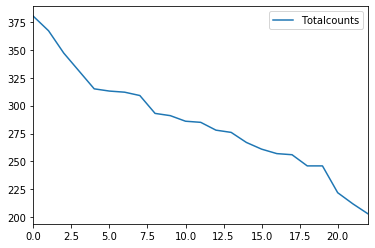

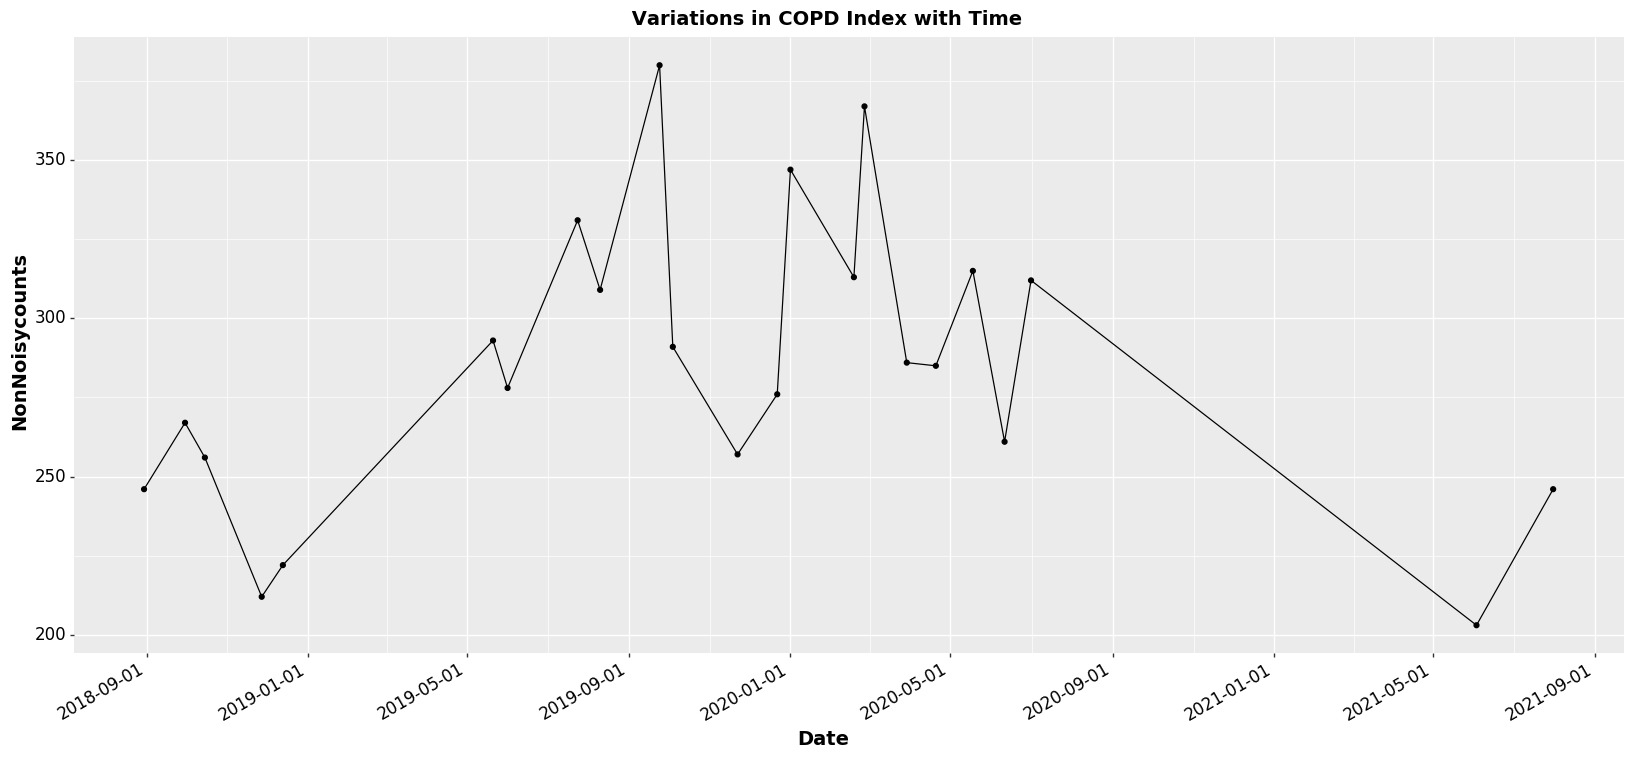

<ggplot: (8756068503616)>


In [16]:

totalTimeInBeD.plot()
Non_NoisyTimeInBed['Date'] = pd.to_datetime(Non_NoisyTimeInBed['Date'])

g = ggplot(Non_NoisyTimeInBed, aes(x='Date', y='NonNoisycounts'))+\
            geom_point()+geom_line() +  ggtitle(" Variations in COPD Index with Time")+\
            theme(plot_title = element_text(size = 14, face = "bold"),\
                    axis_text_x  = element_text(angle = 30, hjust = 1,size = 12,colour = 'black'),\
                  axis_text_y  = element_text( hjust = 1,size = 12,colour = 'black'),\
                  axis_title_x = element_text(size = 14,face = "bold", colour = 'black',angle = 0),\
                  axis_title_y = element_text(size = 14,face = "bold", colour = 'black', angle = 90),\
                  figure_size=(20, 8))
                    #+scale_y_continuous(limits=(60, 100))
            
            #scale_color_manual(values=[color])
#ggsave(plot = g, filename = "COPD_Index", path = path)    
#p.save(filename=path+'fig3.png', height=10, width=12, units = 'cm', dpi=300)
print(g)

In [17]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot
def Affinity_Propagation(X):
    # affinity propagation clustering
    # define the model
    model = AffinityPropagation(damping=0.9)
    # fit the model
    model.fit(X)
    # assign a cluster to each example
    yhat = model.predict(X)
    # retrieve unique clusters
    clusters = unique(yhat)
    # create scatter plot for samples from each cluster
    #for cluster in clusters:
    #    # get row indexes for samples with this cluster
    #    row_ix = where(yhat == cluster)
    #    # create scatter of these samples
    #    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    # show the plot
    #pyplot.show()
    return(yhat)

In [18]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
def Spectral_Clsut(X,num):
    # define dataset
    #X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
    # define the model
    model = SpectralClustering(n_clusters=num)
    # fit model and predict clusters
    yhat = model.fit_predict(X)
    # retrieve unique clusters
    clusters = unique(yhat)
    # create scatter plot for samples from each cluster
    #for cluster in clusters:
        # get row indexes for samples with this cluster
    #    row_ix = where(yhat == cluster)
        # create scatter of these samples
    #    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    # show the plot
    #pyplot.show()
    return(yhat)

In [19]:
import shutil
def CopyingFilesInToBigFolder(Indexes,ImagesPath,labels,Bigpath):
    #GET UNIQUE LABELS
    Unique_labels=np.unique(labels)
    
    #fOR EACH LABEL
    for i in range(len(labels)):
        #Getting the index Start_End for each datapoint
        getName=[ele for ele in ImagesPath if ele.endswith(Indexes[i]+".png")]
        #print(i,"> ",len(getName),getName)
        
        dirName=os.path.dirname(getName[0])
        fileName=os.path.basename(getName[0])
        #print(">>>",dirName,"####",fileName,">>>") 
        #DELETING FILES IN THE PATH OF LABEL
        if((i==0) & (os.path.isdir(Bigpath))):
            for labelNum in Unique_labels:
                #deletePath=dirName+"/"+str(labelNum)+"/" #This is in each imageclustering directory of each date.
                #print("DELETE   :", deletePath)
                #RemoveAllFilesInADirectory(deletePath)
                
                deletePath2=Bigpath+"/"+str(labelNum)+"/" #This is in the main directory(3054).
                #print("DELETE2   :", deletePath2)
                RemoveAllFilesInADirectory(deletePath2)
        
        #Copying Files for each cluster
        COPYPATH=Bigpath #dirName
        if os.path.isdir(COPYPATH+"/"+str(labels[i])): 
            shutil.copy2(getName[0],COPYPATH+"/"+str(labels[i])+"/"+fileName)
        else:
            os.mkdir(COPYPATH+"/"+str(labels[i]))
            #print(COPYPATH+"/"+str(labels[i]))
            shutil.copy2(getName[0],COPYPATH+"/"+str(labels[i])+"/"+fileName)
        
        #print(getName[0],">>>",fileName,">>>",labels[i])
        #if i==10:
        #    break
        
    cwd = os.getcwd()
    head, tail = os.path.split(COPYPATH)
    os.chdir(head)#dirName)
    if os.path.exists(tail+'.zip'):
        os.remove(tail+'.zip')
    '''
    os.chdir(COPYPATH)
    for lab in Unique_labels:
        #cmd1='cd dirName'
        cmd3='zip -r '+str(lab)+'.zip '+str(lab)
        os.system(cmd3)
    os.chdir(head)
    '''
    
    cmd2='zip -r '+tail+'.zip '+tail
    print("HELLO", cmd2)
    os.system(cmd2)
    os.chdir(cwd)   
#head, tail = os.path.split(MainPath+str(i_dates)+"/Birth")
#print(head)
#print(tail)        

In [20]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
from matplotlib import pyplot
from sklearn.datasets.samples_generator import make_blobs
# define dataset

def BirchClustering(X,n):
    # birch clustering

    
    model = Birch(threshold=0.01, n_clusters=n)
    #model = Birch(n_clusters=n,threshold=0.005,branching_factor=20)
    #model = Birch(n_clusters=n,threshold=1.5,branching_factor=20)
    # fit the model
    model.fit(X)
    # assign a cluster to each example
    yhat = model.predict(X)
    # retrieve unique clusters
    clusters = unique(yhat)
    # create scatter plot for samples from each cluster
    X, clusters = make_blobs(n_samples=X.shape[0], centers=len(clusters), cluster_std=0.70, random_state=0)
    plt.scatter(X[:,0], X[:,1], alpha=0.7, edgecolors='b')
    plt.scatter(X[:,0], X[:,1], c=clusters, cmap='rainbow', alpha=0.7)#, edgecolors='b')
    return(yhat)

In [21]:
df_Comb.dtypes

Ru_mDI              float64
Ru_RespRate           int64
Ru_RMSSD            float64
Ru_MADI             float64
Ru_RMI              float64
Ru_RMDA_RMS         float64
Restlessness3Sec    float64
NAsign               object
A_Mean_i            float64
A_Mean_e            float64
ht_Mean_av          float64
ht_Mean_max         float64
ht_RMS_av           float64
ht_RMS_max          float64
Ru_A_RMSi           float64
Ru_A_RMSe           float64
Index                object
ID                   object
Date                 object
dtype: object

## Calculations related to noise windows

In [22]:
df_Comb.head()
#i_dates='3121'#'6219',#'6115'#'3083'
#df_Comb=df_Comb[df_Comb['ID']==i_dates]
NA=pd.DataFrame()
NA=df_Comb[df_Comb['NAsign']=='yes']
NotNA=df_Comb.shape[0]-NA.shape[0]
print("NA: ",NA.shape[0],"\n","NotNA",NotNA,"\n","Total",df_Comb.shape[0])

NA['ID']=NA['ID'].astype(str)

print(NA.dtypes)
for listIDs in Ids:
    if NA['ID'].str.contains(listIDs).any():
        NA_count=pd.DataFrame()
        All_count=pd.DataFrame()
        NA_count=NA[NA['ID']==listIDs]
        All_count=df_Comb[df_Comb['ID']==listIDs]
        print(listIDs," => Number of windows with noise:",NA_count.shape[0],NA_count.shape[0],\
              (NA_count.shape[0]/All_count.shape[0])*100)
        

NA:  985 
 NotNA 5568 
 Total 6553
Ru_mDI              float64
Ru_RespRate           int64
Ru_RMSSD            float64
Ru_MADI             float64
Ru_RMI              float64
Ru_RMDA_RMS         float64
Restlessness3Sec    float64
NAsign               object
A_Mean_i            float64
A_Mean_e            float64
ht_Mean_av          float64
ht_Mean_max         float64
ht_RMS_av           float64
ht_RMS_max          float64
Ru_A_RMSi           float64
Ru_A_RMSe           float64
Index                object
ID                   object
Date                 object
dtype: object
3054  => Number of windows with noise: 985 985 15.031283381657257


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


## Dropping and FILTER NOISE WINDOW BEGINS

In [23]:
df_Comb.head()
#i_dates='3121'#'6219',#'6115'#'3083'
#df_Comb=df_Comb[df_Comb['ID']==i_dates]
NA=pd.DataFrame()
NA=df_Comb[df_Comb['NAsign']=='yes']
NotNA=df_Comb.shape[0]-NA.shape[0]
print("NA: ",NA.shape[0],"\n","NotNA",NotNA,"\n","Total",df_Comb.shape[0])

NA['ID']=NA['ID'].astype(str)

print(NA.dtypes)
for listIDs in Ids:
    if NA['ID'].str.contains(listIDs).any():
        NA_count=pd.DataFrame()
        NA_count=NA[NA['ID']==listIDs]
        print(listIDs," => Number of windows with noise:",NA_count.shape[0])

        
#FILTER NOISE WINDOW BEGINS
if Noise=="Drop":
    df_Comb=df_Comb[df_Comb['NAsign']=='no'] 
df_Comb=df_Comb.drop(columns=['NAsign'])#,'Restlessness3Sec'])
#FILTER NOISE WINDOW ENDS

#df_Comb=df_Comb.drop(columns=['NAsign'])

df_Comb.head()
print(df_Comb.shape[0])
NA['Restlessness3Sec']=NA['Restlessness3Sec']/60
print(NA['Restlessness3Sec'].mean())

NA:  985 
 NotNA 5568 
 Total 6553
Ru_mDI              float64
Ru_RespRate           int64
Ru_RMSSD            float64
Ru_MADI             float64
Ru_RMI              float64
Ru_RMDA_RMS         float64
Restlessness3Sec    float64
NAsign               object
A_Mean_i            float64
A_Mean_e            float64
ht_Mean_av          float64
ht_Mean_max         float64
ht_RMS_av           float64
ht_RMS_max          float64
Ru_A_RMSi           float64
Ru_A_RMSe           float64
Index                object
ID                   object
Date                 object
dtype: object
3054  => Number of windows with noise: 985
5568
0.08121565143824029


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [24]:
NA['Restlessness3Sec']=NA['Restlessness3Sec'].round()

from plotnine import *
%matplotlib inline
p = ggplot(aes(x='Restlessness3Sec'), data=NA)
p + geom_histogram(binwidth=1) #binwidth=1
display(NA.head())
ggplot(NA, aes(x='Restlessness3Sec')) + geom_histogram(color="black", fill="white")+\
scale_x_continuous(breaks =[1,2,4,6,8, 10,15,20, 30, 40,50,60])

NA.groupby('Restlessness3Sec')['Restlessness3Sec'].count()


Ru_mDI  Ru_RespRate  Ru_RMSSD  Ru_MADI    Ru_RMI  Ru_RMDA_RMS  \
15  0.240000           15  0.313225    0.580  0.423090     1.036792   
29  0.722000           15  0.764814    0.930  0.398263     0.853503   
30  0.652857           17  0.995066    1.990  0.429554     1.267145   
34  0.972857           18  1.228140    2.220  0.514333     1.245784   
35  0.382000           15  0.431161    0.605  0.444485     0.993766   

    Restlessness3Sec NAsign    A_Mean_i    A_Mean_e  ht_Mean_av  ht_Mean_max  \
15               0.0    yes   72.028292   69.514894   70.771593    66.242862   
29               0.0    yes   85.952332   97.620372   91.786352    82.117759   
30               0.0    yes  144.460190  146.793211  145.626701   102.869429   
34               0.0    yes  100.946654  101.574780  101.260717    76.479644   
35               0.0    yes   76.380547   77.031190   76.705868    74.233308   

     ht_RMS_av  ht_RMS_max   Ru_A_RMSi   Ru_A_RMSe  \
15   72.083461   67.592794   73.608485   70.996379   
29   93.771020   83.805749   87.814372  102.886953   
30  210.681500  134.050130  260.120398  205.280677   
34  132.488047   93.259562  158.455660  127.193481   
35   76.965693   74.542967   76.788028   77.269719   

                                                Index    ID        Date  
15  2018-08-30 00:27:05.645000_2018-08-30 00:28:05...  3054  2018-08-30  
29  2018-08-30 00:49:05.645000_2018-08-30 00:50:05...  3054  2018-08-30  
30  2018-08-30 00:51:05.645000_2018-08-30 00:52:05...  3054  2018-08-30  
34  2018-08-30 00:56:05.645000_2018-08-30 00:57:05...  3054  2018-08-30  
35  2018-08-30 00:57:05.645000_2018-08-30 00:58:05...  3054  2018-08-30

Restlessness3Sec
0.0    983
1.0      2
Name: Restlessness3Sec, dtype: int64

## Calculating features BPI and restlessness normalization and drop irrelevant columns

In [25]:
#df_Comb['Restlessness3Sec']=df_Comb['Restlessness3Sec']/60
df_Comb['Restlessness3Sec']=df_Comb['Restlessness3Sec']/60
df_Comb.head()

#df_Comb['BPI_I']=df_Comb['Ru_RespRate']/df_Comb['Ru_A_RMSi']
#df_Comb['BPI_E']=df_Comb['Ru_RespRate']/df_Comb['Ru_A_RMSe']

#df_Comb['BPI_I2']=df_Comb['Ru_A_RMSi']/60
#df_Comb['BPI_E2']=df_Comb['Ru_A_RMSe']/60



df_Comb['BPI_ht_Mean_max']=df_Comb['Ru_RespRate']/df_Comb['ht_Mean_max']
                           

df_Comb=df_Comb.drop(columns=['A_Mean_i','A_Mean_e','ht_Mean_av','ht_Mean_max','ht_RMS_av',\
                              'ht_RMS_max','Ru_A_RMSi','Ru_A_RMSe','ht_Mean_max'])#,'A_inter_mean','A_inter_RMS'])#,\
    

In [26]:
EMBC_PAPER_PATH="/home/pg3fy/jupyter/IR/HealthFeaturePythonPackage/WorkingMultiCore/Test/"
print("Ids:",Ids)
df_Comb.to_csv(EMBC_PAPER_PATH+(Ids[0])+"Features.csv")

Ids: ['3054']


In [27]:
#if BPI_Call=='Drop':
#    df_Comb=df_Comb.drop(columns=['BPI_ht_Mean_max']) #Ru_RMDA_RMS
#df_Comb=df_Comb.drop(columns=['Ru_RMDA_RMS']) #Ru_RMDA_RMS
#Drop=""
dropnum=0
Drop=""
for i in df_Comb.columns:
    if i==Drop[dropnum]:
        df_Comb=df_Comb.drop(columns=[i])
        if dropnum==(len(Drop)-1):
            print(dropnum,(len(Drop)-1))
            break
        else:
            dropnum=dropnum+1
            
#df_Comb=df_Comb.drop(columns=['Ru_RMDA_RMS'])
#df_Comb.head()

IndexError: string index out of range

In [28]:
df_Comb.head()

Ru_mDI  Ru_RespRate  Ru_RMSSD  Ru_MADI    Ru_RMI  Ru_RMDA_RMS  \
0  0.638333           15  0.830276    1.775  0.421302     1.019169   
1  0.566000           13  0.635091    1.080  0.362715     0.994024   
2  0.470000           15  0.508852    0.705  0.395330     0.997147   
3  0.348333           15  0.481612    0.940  0.402845     0.983772   
4  0.461000           14  0.499795    0.735  0.384690     1.008863   

   Restlessness3Sec                                              Index    ID  \
0          0.016750  2018-08-30 00:09:05.645000_2018-08-30 00:10:05...  3054   
1          0.050500  2018-08-30 00:10:05.645000_2018-08-30 00:11:05...  3054   
2          0.000000  2018-08-30 00:13:05.645000_2018-08-30 00:14:05...  3054   
3          0.016667  2018-08-30 00:14:05.645000_2018-08-30 00:15:05...  3054   
4          0.016750  2018-08-30 00:15:05.645000_2018-08-30 00:16:05...  3054   

         Date  BPI_ht_Mean_max  
0  2018-08-30         0.255469  
1  2018-08-30         0.185353  
2  2018-08-30         0.232336  
3  2018-08-30         0.238651  
4  2018-08-30         0.224353

In [29]:
#IndexFilePath='/dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/\
#PlottingCombined/Predictions_WithoutNoise_WO_BPI/'
#CreateDirectory(IndexFilePath)
'''
for i_dates in Ids:
    #i_dates='3104'#'3083'#'6219',#'6115'#'3083'
    df_3054_1=pd.DataFrame()
    df_3054_1=df_Comb[df_Comb['ID']==i_dates]
    print(i_dates,df_3054_1.shape)
    IndexFileInputPath=IndexFilePath+i_dates+"/inputfiles/"
    CreateDirectory(IndexFilePath+i_dates+'/')
    CreateDirectory(IndexFileInputPath)
    if os.path.exists(IndexFileInputPath+i_dates+".csv"):
        os.remove(IndexFileInputPath+i_dates+".csv")

    #df_3054_1.to_csv(i_dates+".csv",index=False)
    df_3054_1.to_csv(IndexFileInputPath+i_dates+".csv",index=False)

'''

'\nfor i_dates in Ids:\n    #i_dates=\'3104\'#\'3083\'#\'6219\',#\'6115\'#\'3083\'\n    df_3054_1=pd.DataFrame()\n    df_3054_1=df_Comb[df_Comb[\'ID\']==i_dates]\n    print(i_dates,df_3054_1.shape)\n    IndexFileInputPath=IndexFilePath+i_dates+"/inputfiles/"\n    CreateDirectory(IndexFilePath+i_dates+\'/\')\n    CreateDirectory(IndexFileInputPath)\n    if os.path.exists(IndexFileInputPath+i_dates+".csv"):\n        os.remove(IndexFileInputPath+i_dates+".csv")\n\n    #df_3054_1.to_csv(i_dates+".csv",index=False)\n    df_3054_1.to_csv(IndexFileInputPath+i_dates+".csv",index=False)\n\n'

In [30]:
#BLOCK FOR COPYING IMAGES FOR CLUSTER BEGINS << DO NOT DELETE THIS >>

'''
Index=NA['Index'].to_list()
NA['label']=10
label=NA['label'].to_list()

path=MainPath+str(i_dates)+"/"
#print("<<PATH>>",path)
Images=Get_All_png_pathnames(path)
#print("<<Images>>",Images)
CopyingPath=path+"Birth"
if not os.path.exists(CopyingPath):
    os.mkdir(CopyingPath)
CopyingFilesInToBigFolder(Index,Images,label,CopyingPath)
'''

'\nIndex=NA[\'Index\'].to_list()\nNA[\'label\']=10\nlabel=NA[\'label\'].to_list()\n\npath=MainPath+str(i_dates)+"/"\n#print("<<PATH>>",path)\nImages=Get_All_png_pathnames(path)\n#print("<<Images>>",Images)\nCopyingPath=path+"Birth"\nif not os.path.exists(CopyingPath):\n    os.mkdir(CopyingPath)\nCopyingFilesInToBigFolder(Index,Images,label,CopyingPath)\n'

In [31]:
#df_Comb['diff']= df_Comb['Max_Prom']/df_Comb['Min_Prom']
#df_Comb=df_Comb.drop(columns=['Min_Prom','Max_Prom'])


In [32]:
# Dendogram for Heirarchical Clustering

'''
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

import time
#df_Comb=df_Comb.drop(columns=['Restlessness3Sec'])
i_dates='3054'#'3083'#

df_3054_1=df_Comb[df_Comb['ID']==i_dates]

IDdd=df_3054_1['ID'].to_list()
Index=df_3054_1['Index'].to_list()
dates=df_3054_1['Date'].to_list()
print(np.unique(dates))
df_3054_Clust=df_3054_1.drop(columns=['ID','Date','Index'])
df_3054_Clust.head()

import scipy.cluster.hierarchy as shc
import matplotlib
from matplotlib import pyplot

pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
matplotlib.rcParams.update({'font.size': 22})

dend = shc.dendrogram(shc.linkage(df_3054_Clust, method='ward'))
'''


'\nimport matplotlib.pyplot as plt\nplt.rcParams.update({\'font.size\': 22})\n\nimport time\n#df_Comb=df_Comb.drop(columns=[\'Restlessness3Sec\'])\ni_dates=\'3054\'#\'3083\'#\n\ndf_3054_1=df_Comb[df_Comb[\'ID\']==i_dates]\n\nIDdd=df_3054_1[\'ID\'].to_list()\nIndex=df_3054_1[\'Index\'].to_list()\ndates=df_3054_1[\'Date\'].to_list()\nprint(np.unique(dates))\ndf_3054_Clust=df_3054_1.drop(columns=[\'ID\',\'Date\',\'Index\'])\ndf_3054_Clust.head()\n\nimport scipy.cluster.hierarchy as shc\nimport matplotlib\nfrom matplotlib import pyplot\n\npyplot.figure(figsize=(10, 7))  \npyplot.title("Dendrograms")  \nmatplotlib.rcParams.update({\'font.size\': 22})\n\ndend = shc.dendrogram(shc.linkage(df_3054_Clust, method=\'ward\'))\n'

In [33]:
#### Dendrogram with A_inter_mean
![dendrograme2](Miscellaneous/dendrograme2.png)

/bin/sh: 1: Syntax error: word unexpected (expecting ")")


In [32]:
![Dendrogram](Miscellaneous/Dend.png)

/bin/sh: 1: Syntax error: word unexpected (expecting ")")


![Dendrogram](Miscellaneous/Dendrogram.png)

### Single individual Analysis begins here

In [34]:
#df_Comb.to_csv('test.csv',index=False)#head()
df_Comb.head()

Ru_mDI  Ru_RespRate  Ru_RMSSD  Ru_MADI    Ru_RMI  Ru_RMDA_RMS  \
0  0.638333           15  0.830276    1.775  0.421302     1.019169   
1  0.566000           13  0.635091    1.080  0.362715     0.994024   
2  0.470000           15  0.508852    0.705  0.395330     0.997147   
3  0.348333           15  0.481612    0.940  0.402845     0.983772   
4  0.461000           14  0.499795    0.735  0.384690     1.008863   

   Restlessness3Sec                                              Index    ID  \
0          0.016750  2018-08-30 00:09:05.645000_2018-08-30 00:10:05...  3054   
1          0.050500  2018-08-30 00:10:05.645000_2018-08-30 00:11:05...  3054   
2          0.000000  2018-08-30 00:13:05.645000_2018-08-30 00:14:05...  3054   
3          0.016667  2018-08-30 00:14:05.645000_2018-08-30 00:15:05...  3054   
4          0.016750  2018-08-30 00:15:05.645000_2018-08-30 00:16:05...  3054   

         Date  BPI_ht_Mean_max  
0  2018-08-30         0.255469  
1  2018-08-30         0.185353  
2  2018-08-30         0.232336  
3  2018-08-30         0.238651  
4  2018-08-30         0.224353

['2018-08-30' '2018-09-30' '2018-10-15' '2018-11-27' '2018-12-13'
 '2019-05-21' '2019-06-01' '2019-07-24' '2019-08-10' '2019-09-24'
 '2019-10-04' '2019-11-22' '2019-12-22' '2020-01-01' '2020-02-18'
 '2020-02-26' '2020-03-29' '2020-04-20' '2020-05-18' '2020-06-11'
 '2020-07-01' '2021-06-03' '2021-07-31']


Ru_mDI  Ru_RespRate  Ru_RMSSD  Ru_MADI    Ru_RMI  Ru_RMDA_RMS  \
0  0.638333           15  0.830276    1.775  0.421302     1.019169   
1  0.566000           13  0.635091    1.080  0.362715     0.994024   
2  0.470000           15  0.508852    0.705  0.395330     0.997147   
3  0.348333           15  0.481612    0.940  0.402845     0.983772   
4  0.461000           14  0.499795    0.735  0.384690     1.008863   

   Restlessness3Sec  BPI_ht_Mean_max  
0          0.016750         0.255469  
1          0.050500         0.185353  
2          0.000000         0.232336  
3          0.016667         0.238651  
4          0.016750         0.224353

TOTAL DATAPOINTS 5568


Ru_mDI  Ru_RespRate  Ru_RMSSD  Ru_MADI    Ru_RMI  Ru_RMDA_RMS  \
0  0.638333           15  0.830276    1.775  0.421302     1.019169   
1  0.566000           13  0.635091    1.080  0.362715     0.994024   
2  0.470000           15  0.508852    0.705  0.395330     0.997147   
3  0.348333           15  0.481612    0.940  0.402845     0.983772   
4  0.461000           14  0.499795    0.735  0.384690     1.008863   

   Restlessness3Sec  BPI_ht_Mean_max  
0          0.016750         0.255469  
1          0.050500         0.185353  
2          0.000000         0.232336  
3          0.016667         0.238651  
4          0.016750         0.224353

Counter({1: 1556, 0: 1260, 4: 1003, 5: 743, 3: 549, 2: 457})


Ru_mDI  Ru_RespRate  Ru_RMSSD  Ru_MADI    Ru_RMI  Ru_RMDA_RMS  \
0  0.638333           15  0.830276    1.775  0.421302     1.019169   
1  0.566000           13  0.635091    1.080  0.362715     0.994024   
2  0.470000           15  0.508852    0.705  0.395330     0.997147   
3  0.348333           15  0.481612    0.940  0.402845     0.983772   
4  0.461000           14  0.499795    0.735  0.384690     1.008863   

   Restlessness3Sec  BPI_ht_Mean_max  label  
0          0.016750         0.255469      5  
1          0.050500         0.185353      5  
2          0.000000         0.232336      5  
3          0.016667         0.238651      5  
4          0.016750         0.224353      5

[(0, 549), (1, 1260), (2, 1556), (3, 457), (4, 1003), (5, 743)]


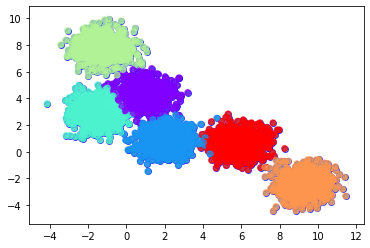

In [35]:
import time

i_dates='3054'#'3083'

df_3054_1=df_Comb[df_Comb['ID']==i_dates]

'''
ListOfIDs=['3054','6219']
#Filter the processed file for the IDs having COPD
boolean_series = df_Comb.ID.isin(ListOfIDs)
df_3054_1 = df_Comb[boolean_series]
'''

IDdd=df_3054_1['ID'].to_list()
Index=df_3054_1['Index'].to_list()
dates=df_3054_1['Date'].to_list()
print(np.unique(dates))
df_3054_Clust=df_3054_1.drop(columns=['ID','Date','Index'])
display(df_3054_Clust.head())

print("TOTAL DATAPOINTS",df_3054_Clust.shape[0])

number_Cluster=9

#TestKmeans(1,10,df_3054_Clust)
#kmComb=ApplyKmeans(df_3054_Clust,number_Cluster)

Resultpath="Result/"
LabelCount=Resultpath+'LabelCount.csv'
if os.path.exists(LabelCount):
    os.remove(LabelCount)
column_names=["0","1","2","3","4","date"]



#ApplyfuzzyCmeans
Label=[]
#Label=ApplyFuzzyCMenas(df_3054_Clust,number_Cluster)
eps=0.5
radius=50
#Label=ApplyDBSCAN(df_3054_Clust,eps,radius)
#Label=Affinity_Propagation(df_3054_Clust)
#Label=Spectral_Clsut(df_3054_Clust,9)
Label=BirchClustering(df_3054_Clust,6) #7 #With Noise(7), Without Noise(6)
display(df_3054_Clust.head())
#Counter
print(Counter(Label))

label=[]
#label=Label
label=shuffleLabelAsPerDescRespRate(df_3054_Clust,Label)
display(df_3054_Clust.head())

Unique_Labels=list((Counter(label)).keys())
print(sorted(Counter(label).items()))

label_df=pd.DataFrame()
label_df=pd.DataFrame.from_dict(Counter(label), orient='index').T
label_df['date']=i_dates

label_df.to_csv(LabelCount, mode='a', index=False, header=False)

#Birch 9: [(0, 499), (1, 952), (2, 1945), (3, 1012), (4, 910), (5, 439), (6, 373), (7, 156), (8, 21)]
#Birch 8: [(0, 499), (1, 1964), (2, 1945), (3, 910), (4, 439), (5, 373), (6, 156), (7, 21)]
#[(0, 548), (1, 212), (2, 574), (3, 578), (4, 112), (5, 730), (6, 708), (7, 801), (8, 491)]

In [36]:
'''
df_3054_Clust['label']=label
df_3054_Clust=df_3054_Clust[df_3054_Clust['label']!=7]
label=df_3054_Clust['label'].to_list()
df_3054_Clust=df_3054_Clust.drop(columns=['label'])
'''

"\ndf_3054_Clust['label']=label\ndf_3054_Clust=df_3054_Clust[df_3054_Clust['label']!=7]\nlabel=df_3054_Clust['label'].to_list()\ndf_3054_Clust=df_3054_Clust.drop(columns=['label'])\n"

In [37]:
df_export=pd.DataFrame()
df_export=df_3054_Clust.rename(columns={'Ru_mDI':'MDI', 'Ru_RMSSD':'RMSSD','Ru_MADI':'MADI', 'Ru_RMI':'RMI',\
                             'Ru_RMDA_RMS':'RMS_DA', 'Restlessness3Sec':'RF', 'BPI_ht_Mean_max':'BPI',\
                              'Ru_RespRate':'RespRate'})

df_export["Index"]=Index
ClusteredDataExportPathForJBI='/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/ClusteringResults/Clustered5568FeatureVectors.csv'
df_export.to_csv(ClusteredDataExportPathForJBI,index=False)

In [37]:
dfnew=pd.DataFrame()
dfnew=df_3054_Clust.copy()
dfnew.head()

Ru_mDI  Ru_RespRate  Ru_RMSSD  Ru_MADI    Ru_RMI  Ru_RMDA_RMS  \
0  0.638333           15  0.830276    1.775  0.421302     1.019169   
1  0.566000           13  0.635091    1.080  0.362715     0.994024   
2  0.470000           15  0.508852    0.705  0.395330     0.997147   
3  0.348333           15  0.481612    0.940  0.402845     0.983772   
4  0.461000           14  0.499795    0.735  0.384690     1.008863   

   Restlessness3Sec  BPI_ht_Mean_max  label  
0          0.016750         0.255469      5  
1          0.050500         0.185353      5  
2          0.000000         0.232336      5  
3          0.016667         0.238651      5  
4          0.016750         0.224353      5

In [39]:
df_3054_Clust.shape()

TypeError: 'tuple' object is not callable

In [38]:
#df_3054_Clust['label']=label
ClusterNumberToreplace=10
#label2 = [(5) if item == ClusterNumberToreplace else item for item in label]

In [59]:
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib

def CallTNSE2(data, Label,titleName,date,path,alpha):#,Res_ID):
    #Source: https://www.datatechnotes.com/2020/11/tsne-visualization-example-in-python.html
    #Source: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
    #STEP 1: TRANSFORM DATA
    data=data.drop(columns=['label'])
    display(data.head())
    tsne = TSNE(n_components=2, verbose=1, random_state=123,perplexity=120)#,early_exaggeration=40.0) #perplexity=50,
    z = tsne.fit_transform(data)
    
    #perplexity=100 this worked,#early_exaggeration=40.0
    display(z)
    #STEP 2: PROJECT MULTIDIMENSIONAL DATA IN 2D
    df = pd.DataFrame()
    df["y"] = Label
    #df["id"]=Res_ID
    df["comp-1"] = z[:,0]
    df["comp-2"] = z[:,1]
    
    matplotlib.rcParams.update({'font.size': 16})

    c=Counter(Label)
    num_clust=len(c.keys())
    #color_dict = dict({'COPD':'brown','Non-COPD':'green'})
    sns_plot = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                    palette=sns.color_palette("hls", num_clust),\
                    data=df,alpha=alpha)
    #palette=color_dict

    #ADD NUMBERS TO PLOT
    for label in df.y.unique():
    # randomly sample
        tmp = df.loc[df['y']==label].sample(1)
        #add label to some random points per group
        for _,row in tmp.iterrows():
            plt.annotate(label, (row['comp-1'], row['comp-2']), size=14, weight='bold', color='k')
     
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #sns_plot.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
    #sns.move_legend(sns_plot, "upper left", bbox_to_anchor=(1, 1))
    plt.savefig(path+"/"+date+"_"+titleName+".png") 
    return()

Ru_mDI  Ru_RespRate  Ru_RMSSD  Ru_MADI    Ru_RMI  Ru_RMDA_RMS  \
0  0.638333           15  0.830276    1.775  0.421302     1.019169   
1  0.566000           13  0.635091    1.080  0.362715     0.994024   
2  0.470000           15  0.508852    0.705  0.395330     0.997147   
3  0.348333           15  0.481612    0.940  0.402845     0.983772   
4  0.461000           14  0.499795    0.735  0.384690     1.008863   

   Restlessness3Sec  BPI_ht_Mean_max  
0          0.016750         0.255469  
1          0.050500         0.185353  
2          0.000000         0.232336  
3          0.016667         0.238651  
4          0.016750         0.224353

[t-SNE] Computing 361 nearest neighbors...
[t-SNE] Indexed 5568 samples in 0.004s...
[t-SNE] Computed neighbors for 5568 samples in 0.566s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5568
[t-SNE] Computed conditional probabilities for sample 2000 / 5568
[t-SNE] Computed conditional probabilities for sample 3000 / 5568
[t-SNE] Computed conditional probabilities for sample 4000 / 5568
[t-SNE] Computed conditional probabilities for sample 5000 / 5568
[t-SNE] Computed conditional probabilities for sample 5568 / 5568
[t-SNE] Mean sigma: 0.218196
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.439922
[t-SNE] KL divergence after 1000 iterations: 0.407652


array([[-21.905853  ,   3.892764  ],
       [-53.18874   ,  -1.040569  ],
       [-28.406603  ,  10.937009  ],
       ...,
       [ 15.677469  , -16.329494  ],
       [  2.5186377 ,  22.524357  ],
       [ -3.1979797 ,  -0.23615116]], dtype=float32)

()

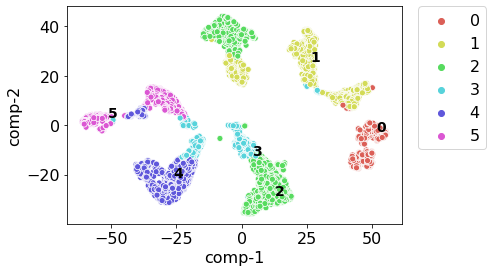

In [60]:
alpha=1
CallTNSE2(df_3054_Clust, label, "Clustered data",i_dates,Resultpath,alpha)


## 3-D TSNE projection
Source: https://plotly.com/python/t-sne-and-umap-projections/

In [57]:
from sklearn.manifold import TSNE
import plotly.express as px

#df = px.data.iris()

features = df_3054_Clust.drop(columns=['label'])

tsne = TSNE(n_components=3, random_state=0,verbose=1, perplexity=150,early_exaggeration=40.0)
projections = tsne.fit_transform(features, )

fig = px.scatter_3d(
    projections, x=1, y=0, z=2,
    color=df_3054_Clust.label.to_list(), labels={'color': 'label'}
)
fig.update_traces(marker_size=8)
fig.show()

[t-SNE] Computing 451 nearest neighbors...
[t-SNE] Indexed 5568 samples in 0.004s...
[t-SNE] Computed neighbors for 5568 samples in 0.664s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5568
[t-SNE] Computed conditional probabilities for sample 2000 / 5568
[t-SNE] Computed conditional probabilities for sample 3000 / 5568
[t-SNE] Computed conditional probabilities for sample 4000 / 5568
[t-SNE] Computed conditional probabilities for sample 5000 / 5568
[t-SNE] Computed conditional probabilities for sample 5568 / 5568
[t-SNE] Mean sigma: 0.243247
[t-SNE] KL divergence after 250 iterations with early exaggeration: 251.255798
[t-SNE] KL divergence after 1000 iterations: 0.272077


In [40]:
from sklearn.manifold import TSNE
import plotly.express as px

features = df_3054_Clust.drop(columns=['label'])

tsne = TSNE(n_components=2, random_state=0,verbose=1, perplexity=150)#,early_exaggeration=40.0)
projections = tsne.fit_transform(features, )

fig = px.scatter(
    projections, x=0, y=1,
    color=df_3054_Clust.label.to_list(), labels={'color': 'label'},
    opacity=0.7
)
fig.update_traces(marker_size=8)
fig.show()
#, z=2,

[t-SNE] Computing 451 nearest neighbors...
[t-SNE] Indexed 5568 samples in 0.004s...
[t-SNE] Computed neighbors for 5568 samples in 0.674s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5568
[t-SNE] Computed conditional probabilities for sample 2000 / 5568
[t-SNE] Computed conditional probabilities for sample 3000 / 5568
[t-SNE] Computed conditional probabilities for sample 4000 / 5568
[t-SNE] Computed conditional probabilities for sample 5000 / 5568
[t-SNE] Computed conditional probabilities for sample 5568 / 5568
[t-SNE] Mean sigma: 0.243247
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.188046
[t-SNE] KL divergence after 1000 iterations: 0.364376


NameError: name 'px' is not defined

In [50]:
from sklearn.manifold import TSNE
import plotly.express as px
color_discrete_map = {0: 'red', 1: 'blue',\
                      2: 'green',3:'brown',4:'yellow',5:'orange'}

fig = px.scatter(
    projections, x=0, y=1,
    color=df_3054_Clust.label.to_list(),
    opacity=0.8,color_discrete_map=color_discrete_map
)
fig.update_traces(marker_size=8)
#fig.update_layout(scattermode="group", scattergap=0.75)
fig.show()
#, z=2,
#, labels={'color': 'label'},

In [54]:
from sklearn.manifold import TSNE
import plotly.express as px

df_plotly=pd.DataFrame()
df_plotly=pd.DataFrame(projections,columns=['comp-1','comp-2'])
df_plotly['label']=df_3054_Clust.label.to_list()
                       


color_discrete_map = {0: 'red', 1: 'blue',\
                      2: 'green',3:'brown',4:'yellow',5:'orange'}

fig3 = px.scatter(
    df_plotly, 'comp-1','comp-2',
    color='label',
    opacity=0.8,color_discrete_map=color_discrete_map
)
fig3.update_traces(marker_size=8)
#fig.update_layout(scattermode="group", scattergap=0.75)
fig3.show()
#, z=2,
#, labels={'color': 'label'},

In [55]:
fig = px.scatter_3d(
    projections, x=1, y=0, z=2,
    color=df_3054_Clust.label.to_list(), labels={'color': 'label'}
)
fig.update_traces(marker_size=8)
fig.show()

In [53]:
display(features.head())
display(projections)

Ru_mDI  Ru_RespRate  Ru_RMSSD  Ru_MADI    Ru_RMI  Ru_RMDA_RMS  \
0  0.638333           15  0.830276    1.775  0.421302     1.019169   
1  0.566000           13  0.635091    1.080  0.362715     0.994024   
2  0.470000           15  0.508852    0.705  0.395330     0.997147   
3  0.348333           15  0.481612    0.940  0.402845     0.983772   
4  0.461000           14  0.499795    0.735  0.384690     1.008863   

   Restlessness3Sec  BPI_ht_Mean_max  
0          0.016750         0.255469  
1          0.050500         0.185353  
2          0.000000         0.232336  
3          0.016667         0.238651  
4          0.016750         0.224353

array([[  1.1520387 ,   1.5043877 ,  -9.400469  ],
       [  5.4215164 , -10.228126  , -11.7683935 ],
       [ 11.572179  ,   4.918685  , -12.538395  ],
       ...,
       [-10.0850315 ,  -5.3230624 ,  14.943589  ],
       [ -9.829906  , -11.593872  ,  -0.34213826],
       [  2.8469675 ,  -1.2182349 ,  -3.6726005 ]], dtype=float32)

## UMAP

In [69]:
#!pip uninstall umap --yes
!pip install umap-learn

  Using cached https://files.pythonhosted.org/packages/26/a7/9da7d5b23fc98ab3d424ac2c65613d63c1f401efb84ad50f2fa27b2caab4/importlib_metadata-6.0.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/14/27/1468111538f33bd9fb13c0b2c1534c7a487cec8fadf14e318d73be18e4e1/llvmlite-0.39.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/31/25/5abcd82372d3d4a3932e1fa8c3dbf9efac10cc7c0d16e78467460571b404/typing_extensions-4.5.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5b/fa/c9e82bbe1af6266adf08afb563905eb87cab83fde00a0a08963510621047/zipp-3.15.0-py3-none-any.whl
  ERROR: Command errored out with exit status 1:
   command: /opt/conda/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-hsfzum9t/llvmlite/setup.py'"'"'; __file__='"'"'/tmp/pip-install-hsfzum9t/llvmlite/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(co

In [71]:
import umap
import plotly.express as px

#df = px.data.iris()

features = df_3054_Clust.drop(columns=['label'])

umap_2d = umap.UMAP(n_components=2, init='random', random_state=0)
umap_3d = umap.UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df_3054_Clust.label, labels={'color': 'label'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df_3054_Clust.label.to_list(), labels={'color': 'label'}
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()

AttributeError: module 'umap' has no attribute 'UMAP'

In [31]:

#BLOCK FOR COPYING IMAGES FOR CLUSTER BEGINS << DO NOT DELETE THIS >>
'''
path=MainPath+str(i_dates)+"/"
#print("<<PATH>>",path)
Images=Get_All_png_pathnames(path)
#print("<<Images>>",Images)
CopyingPath=path+"Birth"
if not os.path.exists(CopyingPath):
    os.mkdir(CopyingPath)
CopyingFilesInToBigFolder(Index,Images,label,CopyingPath)

#BLOCK FOR COPYING IMAGES FOR CLUSTER ENDS << DO NOT DELETE THIS >>

#Perform TNSE on Combined Clustering results
#time.sleep(3)
#alpha=0.3
#CallTNSE(df_3054_Clust, dates,"UnClustered data",i_dates,Resultpath,alpha) #"UnClustered data" is the plot titleName
'''

'\npath=MainPath+str(i_dates)+"/"\n#print("<<PATH>>",path)\nImages=Get_All_png_pathnames(path)\n#print("<<Images>>",Images)\nCopyingPath=path+"Birth"\nif not os.path.exists(CopyingPath):\n    os.mkdir(CopyingPath)\nCopyingFilesInToBigFolder(Index,Images,label,CopyingPath)\n\n#BLOCK FOR COPYING IMAGES FOR CLUSTER ENDS << DO NOT DELETE THIS >>\n\n#Perform TNSE on Combined Clustering results\n#time.sleep(3)\n#alpha=0.3\n#CallTNSE(df_3054_Clust, dates,"UnClustered data",i_dates,Resultpath,alpha) #"UnClustered data" is the plot titleName\n'

In [ ]:
print(i_dates)

## Filename For Overlapping Plots begins

In [56]:
IndexFilePath='/dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/PredictionsPub/'
Index_File=IndexFilePath+'Indexes3.csv'#WithRestlessness' Output For Notebook 

CreateDirectory(IndexFilePath+i_dates+'/OutResults/')
PlotOutPath=IndexFilePath+i_dates+'/OutResults/'

#Index_File=PlotOutPath+i_dates+'_Indexes.csv'

if os.path.exists(Index_File):
    os.remove(Index_File)

    

print(np.unique(label))
print(i_dates)
print(Index_File)


/dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/PredictionsPub/3054/OutResults/ folder already exists.
[0 1 2 3 4 5]
3054
/dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/PredictionsPub/Indexes3.csv


In [57]:
print(df_3054_1.shape,len(label))

(5568, 12) 5568


In [58]:
###### WRITING FILE FOR Filename For Overlapping Plots BEGINS ######

#df_3054_1['label']=label
df_3054_1=df_3054_1[df_3054_1['label']!=ClusterNumberToreplace]
display(df_3054_1.head())
df_3054_1.to_csv(Index_File)

#df_3054_1.to_csv(Index_File) #df_3054_1.to_csv(IndexFilePath+i_dates+'/OutResults/'+i_dates+'_Indexes.csv')
df_Testing=df_3054_1[['Ru_RespRate','label']]
df_3054_1=df_3054_1.drop(columns=['label'],index=False)
###### WRITING FILE FOR Filename For Overlapping Plots ENDS ######
#https://europa.dsa.missouri.edu/user/pg3fy/notebooks/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/PlottingCombined.ipynb

Ru_mDI  Ru_RespRate  Ru_RMSSD  Ru_MADI    Ru_RMI  Ru_RMDA_RMS  \
0  0.638333           15  0.830276    1.775  0.421302     1.019169   
1  0.566000           13  0.635091    1.080  0.362715     0.994024   
2  0.470000           15  0.508852    0.705  0.395330     0.997147   
3  0.348333           15  0.481612    0.940  0.402845     0.983772   
4  0.461000           14  0.499795    0.735  0.384690     1.008863   

   Restlessness3Sec                                              Index    ID  \
0          0.016750  2018-08-30 00:09:05.645000_2018-08-30 00:10:05...  3054   
1          0.050500  2018-08-30 00:10:05.645000_2018-08-30 00:11:05...  3054   
2          0.000000  2018-08-30 00:13:05.645000_2018-08-30 00:14:05...  3054   
3          0.016667  2018-08-30 00:14:05.645000_2018-08-30 00:15:05...  3054   
4          0.016750  2018-08-30 00:15:05.645000_2018-08-30 00:16:05...  3054   

   Date  BPI_ht_Mean_max  label  
0  3054         0.255469      5  
1  3054         0.185353      5  
2  3054         0.232336      5  
3  3054         0.238651      5  
4  3054         0.224353      5

created folder :  /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/PredictionsPub/3054/OutResults/Stats/
created folder :  /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/PredictionsPub/3054/OutResults/Progression/
>>>>>>>>>>>>>>> /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/PredictionsPub/3054/OutResults/Stats/


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/PredictionsPub/3054/OutResults/Stats/3054_WithRespRate
  warn('Filename: {}'.format(filename), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/PredictionsPub/3054/OutResults/Stats/3054_WithRespRate1
  warn('Filename: {}'.format(filename), PlotnineWarning)


>>>>>>>>>>>>>>> /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/PredictionsPub/3054/OutResults/Stats/


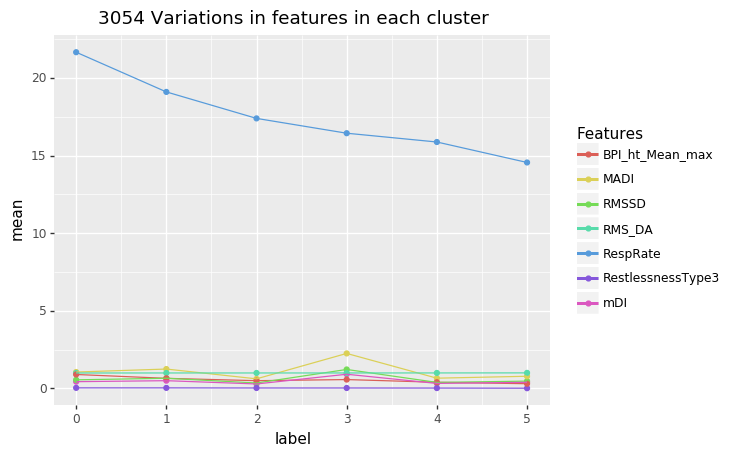

<ggplot: (8743449977001)>


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/PredictionsPub/3054/OutResults/Stats/3054_WithoutRespRate
  warn('Filename: {}'.format(filename), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/PredictionsPub/3054/OutResults/Stats/3054_WithRespRate2
  warn('Filename: {}'.format(filename), PlotnineWarning)


>>>>>>>>>>>>>>> /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/PredictionsPub/3054/OutResults/Stats/


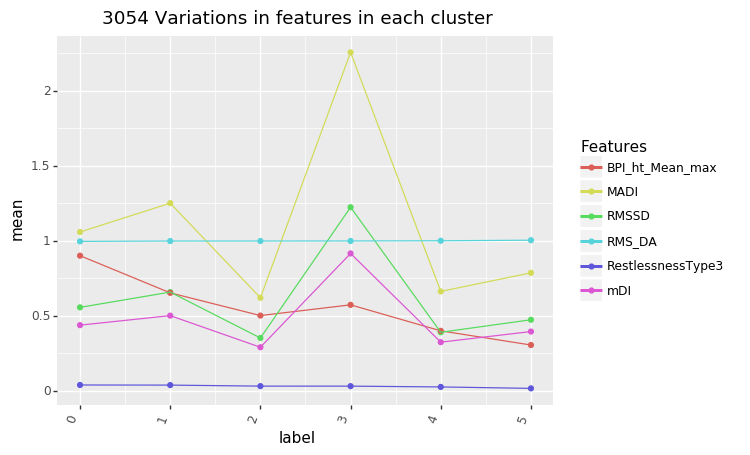

<ggplot: (-9223363293447371590)>


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/PredictionsPub/3054/OutResults/Stats/3054_WithRespRate3
  warn('Filename: {}'.format(filename), PlotnineWarning)


>>>>>>>>>>>>>>> /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/PredictionsPub/3054/OutResults/Stats/


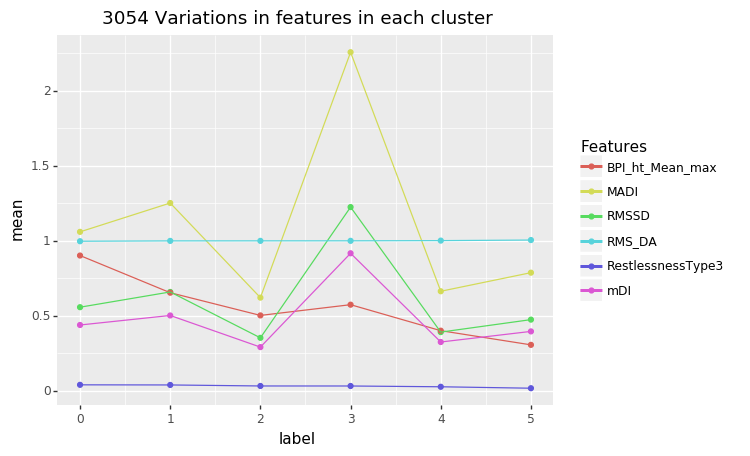

<ggplot: (8743551880568)>


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/PredictionsPub/3054/OutResults/Stats/3054_WithoutRespRate4
  warn('Filename: {}'.format(filename), PlotnineWarning)


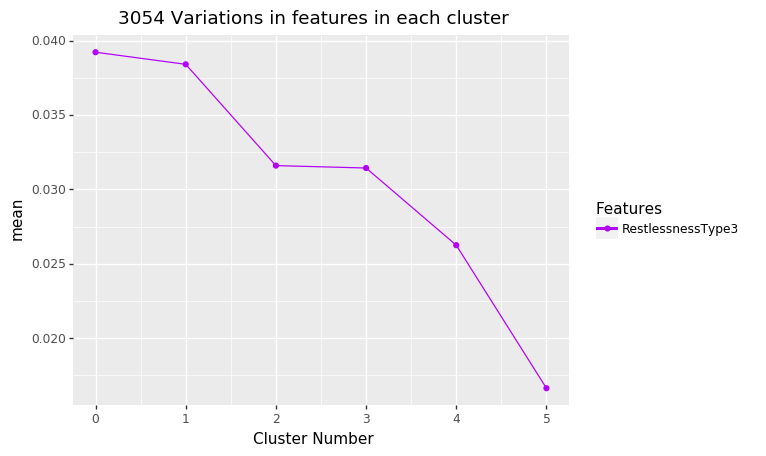

<ggplot: (8743406796566)>
>>>>>>>>>>>>>>> /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/PredictionsPub/3054/OutResults/Stats/


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/PredictionsPub/3054/OutResults/Stats/3054_WithoutRespRate5
  warn('Filename: {}'.format(filename), PlotnineWarning)


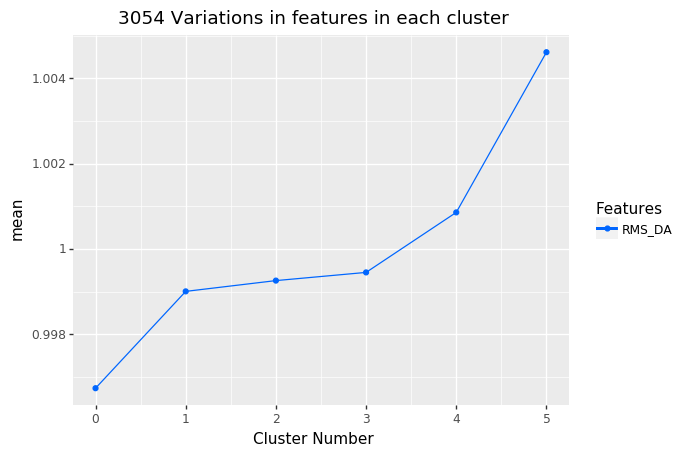

<ggplot: (8743406684936)>
>>>>>>>>>>>>>>> /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/PredictionsPub/3054/OutResults/Stats/


KeyError: "['level_1'] not found in axis"

In [59]:
import sys
sys.path.append('PlottingCombined/')
from CreateStatsAndProgressionPlots import GenerateStatsAndProgressionPlot

GenerateStatsAndProgressionPlot(i_dates,PlotOutPath,Index_File,PlotOutPath)



In [41]:

df_Testing.head()
x=df_Testing.groupby(['label','Ru_RespRate'])['Ru_RespRate'].count()
n=pd.DataFrame(x)
n=n.rename(columns={'Ru_RespRate':'RespRateCount'})
n=n.reset_index(drop=False)
display(n.head())
n.to_csv('ProminenceTestRestless.csv',index=False)

label  Ru_RespRate  RespRateCount
0      0           20              6
1      0           21            292
2      0           22            165
3      0           23             64
4      0           24             17

## Call for Making Predictions begins


In [36]:
#IndexFilePath='/dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/\
#PlottingCombined/Predictions/'
Index_File=IndexFilePath+'Indexes.csv' # Old
Index_File=PlotOutPath+i_dates+'_Indexes.csv' #New

print(Index_File)

/dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/3054/OutResults/3054_Indexes.csv


#### Training Model

In [37]:
import sys
sys.path.append('PlottingCombined/')
from TrainRandomForestModel import TrainModel
from HouseKeepingFunctions import CheckFileExistence,CreateDirectory
from sklearn.externals import joblib


T_Model=TrainModel(Index_File)#=IndexFilePath+i_dates+'/OutResults/'+i_dates+'_Indexes.csv')


/dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/3054/OutResults/3054_Indexes.csv
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   18.4s
[Parallel(n_jobs=4)]: Done 350 out of 350 | elapsed:   47.3s finished


Training Score:  0.9876828329484219
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Statistics for testing the model with test data
Testing Score:  0.9838420107719928
Confusion Matrix:===>  
 [[160   2   0   0   0   0]
 [  0 369   5   1   0   0]
 [  0   3 461   5   0   0]
 [  0   0   3 137   0   0]
 [  0   0   0   3 287   1]
 [  0   0   0   4   0 230]] 

Classification Report:===>  
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       162
           1       0.99      0.98      0.99       375
           2       0.98      0.98      0.98       469
           3       0.

In [38]:
from sklearn.externals import joblib
joblib.dump(T_Model, IndexFilePath+i_dates+'/OutResults/'+i_dates+'Birch.pkl')


['/dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/3054/OutResults/3054Birch.pkl']

In [1]:
from sklearn.externals import joblib
IndexFilePath='/dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/\
PlottingCombined/Predictions_WithoutNoise_WithBPI/'
#IndexFileModelPath='/dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/3054/OutResults/'
i_dates='3054'

loaded_model = joblib.load(IndexFilePath+i_dates+'/OutResults/'+i_dates+'Birch.pkl')
#loaded_model = joblib.load(IndexFileModelPath+'Birch.pkl')

#### Making Predictions with other individuals
Scrap notebook: https://europa.dsa.missouri.edu/user/pg3fy/notebooks/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/PredictionModel.ipynb

In [2]:
#Print the samples
import sys
sys.path.append('PlottingCombined/')
from TrainRandomForestModel import MakePredictions

#Id_list=['6219','6115','3121','3083','3127','3121','3104','3083'] #
Id_list=['6219','6115','3121','3127','3104', '3126', '3083','3111']


Id_list=['3054']

Id_list=['6509','6514','3135','6507','6515']#'6501']#
#Id_list=['6515']

MakePredictions(Id_list,loaded_model,IndexFilePath)

Empty DataFrame
Columns: [Ru_mDI, Ru_RespRate, Ru_RMSSD, Ru_MADI, Ru_RMI, Restlessness3Sec, Ru_RMDA_RMS, BPI_ht_Mean_max]
Index: []
Counts NAN in the entire dataframe  0
Predicted Items in 6509 : [(0, 37), (1, 136), (2, 125), (3, 535), (4, 394), (5, 341)]
label  Ru_RespRate
0      19               1
       20               4
       21              14
       22               6
       23               6
       24               2
       25               2
       26               1
       27               1
1      17               2
       18              49
       19              58
       20              27
2      17              92
       18              33
3      5                1
       6                2
       7                1
       8                1
       9                3
       10               3
       11               2
       12               8
       13              18
       14              58
       15             121
       16             173
       17             1

Date  label  counts
0   2018-07-27      0      35
1   2018-07-27      1     177
2   2018-08-17      0      84
3   2018-08-17      1     201
4   2018-09-24      0      42
5   2018-09-24      1     131
6   2018-10-05      0      56
7   2018-10-05      1     178
8   2018-11-23      0      38
9   2018-11-23      1     206
10  2018-12-16      0      12
11  2018-12-16      1      70
12  2019-01-04      0      13
13  2019-01-04      1     209
14  2019-02-09      0      18
15  2019-02-09      1      98

Date  level_1  counts
0  2018-07-27        0   16.51
1  2018-08-17        2   29.47
2  2018-09-24        4   24.28
3  2018-10-05        6   23.93
4  2018-11-23        8   15.57
5  2018-12-16       10   14.63
6  2019-01-04       12    5.86
7  2019-02-09       14   15.52

/opt/conda/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:83: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
  "group aesthetic?", PlotnineWarning)


<Figure size 640x480 with 1 Axes>

/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6509/OutResults/COPD_INdex_Progression
  warn('Filename: {}'.format(filename), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:83: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
  "group aesthetic?", PlotnineWarning)


<ggplot: (-9223363256535196458)>
         Date  COPD_Index
0  2018-07-27       16.51
1  2018-08-17       29.47
2  2018-09-24       24.28
3  2018-10-05       23.93
4  2018-11-23       15.57
/dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6509/OutResults/Stats/ folder already exists.
/dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6509/OutResults/Progression/ folder already exists.
>>>>>>>>>>>>>>> /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6509/OutResults/Stats/


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6509/OutResults/Stats/6509_WithRespRate
  warn('Filename: {}'.format(filename), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6509/OutResults/Stats/6509_WithRespRate1
  warn('Filename: {}'.format(filenam

>>>>>>>>>>>>>>> /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6509/OutResults/Stats/


<Figure size 640x480 with 1 Axes>

<ggplot: (-9223363256535168659)>


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6509/OutResults/Stats/6509_WithoutRespRate
  warn('Filename: {}'.format(filename), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6509/OutResults/Stats/6509_WithRespRate2
  warn('Filename: {}'.format(file

>>>>>>>>>>>>>>> /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6509/OutResults/Stats/


<Figure size 640x480 with 1 Axes>

<ggplot: (-9223363256535168659)>


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6509/OutResults/Stats/6509_WithRespRate3
  warn('Filename: {}'.format(filename), PlotnineWarning)


>>>>>>>>>>>>>>> /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6509/OutResults/Stats/


<Figure size 640x480 with 1 Axes>

<ggplot: (-9223363256554013864)>


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6509/OutResults/Stats/6509_WithoutRespRate4
  warn('Filename: {}'.format(filename), PlotnineWarning)


<Figure size 640x480 with 1 Axes>

<ggplot: (8780300437610)>
>>>>>>>>>>>>>>> /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6509/OutResults/Stats/


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6509/OutResults/Stats/6509_WithoutRespRate5
  warn('Filename: {}'.format(filename), PlotnineWarning)


<Figure size 640x480 with 1 Axes>

<ggplot: (-9223363256554473398)>
>>>>>>>>>>>>>>> /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6509/OutResults/Stats/


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 16 x 8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6509/OutResults/Progression/6509_Progression
  warn('Filename: {}'.format(filename), PlotnineWarning)


<Figure size 1600x800 with 8 Axes>

<ggplot: (-9223363256554307412)>
Empty DataFrame
Columns: [Ru_mDI, Ru_RespRate, Ru_RMSSD, Ru_MADI, Ru_RMI, Restlessness3Sec, Ru_RMDA_RMS, BPI_ht_Mean_max]
Index: []
Counts NAN in the entire dataframe  0
Predicted Items in 6514 : [(0, 1442), (1, 122), (2, 20), (3, 232), (4, 2), (5, 3)]
label  Ru_RespRate
0      18               2
       19               2
       20               8
       21             157
       22             289
       23             333
       24             289
       25             182
       26              95
       27              48
       28              16
       29              18
       30               3
1      18               8
       19              36
       20              78
2      17               6
       18              14
3      5                6
       6                4
       7               12
       8               12
       9               11
       10              11
       11              10
       12               8
       13          

Date  label  counts
0   2019-07-26      0     100
1   2019-07-26      1      38
2   2019-08-19      0     207
3   2019-08-19      1      17
4   2019-09-29      0     166
5   2019-09-29      1      24
6   2019-10-20      0     129
7   2019-10-20      1       2
8   2019-11-08      0      99
9   2019-11-08      1      14
10  2019-12-21      0     265
11  2019-12-21      1      18
12  2020-01-23      0      69
13  2020-01-23      1      67
14  2020-02-01      0      89
15  2020-03-16      0      54
16  2020-03-16      1      22
17  2020-04-11      0     191
18  2020-04-11      1      12
19  2020-05-22      0     215

Date  level_1  counts
0   2019-07-26        0   72.46
1   2019-08-19        2   92.41
2   2019-09-29        4   87.37
3   2019-10-20        6   98.47
4   2019-11-08        8   87.61
5   2019-12-21       10   93.64
6   2020-01-23       12   50.74
7   2020-02-01       14  100.00
8   2020-03-16       15   71.05
9   2020-04-11       17   94.09
10  2020-05-22       19   90.34

/opt/conda/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:83: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
  "group aesthetic?", PlotnineWarning)


<Figure size 640x480 with 1 Axes>

/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6514/OutResults/COPD_INdex_Progression
  warn('Filename: {}'.format(filename), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:83: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
  "group aesthetic?", PlotnineWarning)


<ggplot: (-9223363256554101774)>
         Date  COPD_Index
0  2019-07-26       72.46
1  2019-08-19       92.41
2  2019-09-29       87.37
3  2019-10-20       98.47
4  2019-11-08       87.61
/dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6514/OutResults/Stats/ folder already exists.
/dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6514/OutResults/Progression/ folder already exists.
>>>>>>>>>>>>>>> /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6514/OutResults/Stats/


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6514/OutResults/Stats/6514_WithRespRate
  warn('Filename: {}'.format(filename), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6514/OutResults/Stats/6514_WithRespRate1
  warn('Filename: {}'.format(filenam

>>>>>>>>>>>>>>> /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6514/OutResults/Stats/


<Figure size 640x480 with 1 Axes>

<ggplot: (-9223363256535967849)>


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6514/OutResults/Stats/6514_WithoutRespRate
  warn('Filename: {}'.format(filename), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6514/OutResults/Stats/6514_WithRespRate2
  warn('Filename: {}'.format(file

>>>>>>>>>>>>>>> /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6514/OutResults/Stats/


<Figure size 640x480 with 1 Axes>

<ggplot: (8780318807991)>


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6514/OutResults/Stats/6514_WithRespRate3
  warn('Filename: {}'.format(filename), PlotnineWarning)


>>>>>>>>>>>>>>> /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6514/OutResults/Stats/


<Figure size 640x480 with 1 Axes>

<ggplot: (8780300931897)>


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6514/OutResults/Stats/6514_WithoutRespRate4
  warn('Filename: {}'.format(filename), PlotnineWarning)


<Figure size 640x480 with 1 Axes>

<ggplot: (-9223363256554388820)>
>>>>>>>>>>>>>>> /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6514/OutResults/Stats/


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6514/OutResults/Stats/6514_WithoutRespRate5
  warn('Filename: {}'.format(filename), PlotnineWarning)


<Figure size 640x480 with 1 Axes>

<ggplot: (8780300524955)>
>>>>>>>>>>>>>>> /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6514/OutResults/Stats/


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 16 x 8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6514/OutResults/Progression/6514_Progression
  warn('Filename: {}'.format(filename), PlotnineWarning)


<Figure size 1600x800 with 11 Axes>

<ggplot: (8780300046919)>
Empty DataFrame
Columns: [Ru_mDI, Ru_RespRate, Ru_RMSSD, Ru_MADI, Ru_RMI, Restlessness3Sec, Ru_RMDA_RMS, BPI_ht_Mean_max]
Index: []
Counts NAN in the entire dataframe  0
Predicted Items in 3135 : [(0, 1), (1, 8), (2, 14), (3, 200), (4, 12), (5, 55)]
label  Ru_RespRate
0      21              1
1      18              3
       19              4
       20              1
2      17              4
       18             10
3      5               1
       6               4
       7               4
       8               5
       9               8
       10              8
       11             17
       12             15
       13             28
       14             37
       15             37
       16             19
       17             11
       18              4
       19              2
4      13              1
       14              4
       15              1
       16              6
5      10              3
       12              3
       13             15
     

Date  label  counts
0   2019-12-29      0       4
1   2019-12-29      1      40
2   2020-01-23      1      18
3   2020-02-01      1      58
4   2020-03-16      0       1
5   2020-03-16      1      24
6   2020-04-16      0       2
7   2020-04-16      1      57
8   2020-05-01      1      31
9   2020-06-15      0       1
10  2020-06-15      1      33
11  2020-07-03      0      15
12  2020-07-03      1       6

Date  level_1  counts
0   2019-12-29        0    9.09
1   2020-01-23  level_1    1.00
2   2020-01-23   counts    0.00
3   2020-02-01  level_1    1.00
4   2020-02-01   counts    0.00
5   2020-03-16        4    4.00
6   2020-04-16        6    3.39
7   2020-05-01  level_1    1.00
8   2020-05-01   counts    0.00
9   2020-06-15        9    2.94
10  2020-07-03       11   71.43

<Figure size 640x480 with 1 Axes>

<ggplot: (-9223363256398972591)>


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/3135/OutResults/COPD_INdex_Progression
  warn('Filename: {}'.format(filename), PlotnineWarning)


         Date  COPD_Index
0  2019-12-29        9.09
1  2020-01-23        1.00
2  2020-01-23        0.00
3  2020-02-01        1.00
4  2020-02-01        0.00
/dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/3135/OutResults/Stats/ folder already exists.
/dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/3135/OutResults/Progression/ folder already exists.
>>>>>>>>>>>>>>> /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/3135/OutResults/Stats/


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/3135/OutResults/Stats/3135_WithRespRate
  warn('Filename: {}'.format(filename), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/3135/OutResults/Stats/3135_WithRespRate1
  warn('Filename: {}'.format(filenam

>>>>>>>>>>>>>>> /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/3135/OutResults/Stats/


<Figure size 640x480 with 1 Axes>

<ggplot: (-9223363256554229283)>


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/3135/OutResults/Stats/3135_WithoutRespRate
  warn('Filename: {}'.format(filename), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/3135/OutResults/Stats/3135_WithRespRate2
  warn('Filename: {}'.format(file

>>>>>>>>>>>>>>> /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/3135/OutResults/Stats/


<Figure size 640x480 with 1 Axes>

<ggplot: (8780300490237)>


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/3135/OutResults/Stats/3135_WithRespRate3
  warn('Filename: {}'.format(filename), PlotnineWarning)


>>>>>>>>>>>>>>> /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/3135/OutResults/Stats/


<Figure size 640x480 with 1 Axes>

<ggplot: (8780300934348)>


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/3135/OutResults/Stats/3135_WithoutRespRate4
  warn('Filename: {}'.format(filename), PlotnineWarning)


<Figure size 640x480 with 1 Axes>

<ggplot: (8780300920980)>
>>>>>>>>>>>>>>> /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/3135/OutResults/Stats/


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/3135/OutResults/Stats/3135_WithoutRespRate5
  warn('Filename: {}'.format(filename), PlotnineWarning)


<Figure size 640x480 with 1 Axes>

<ggplot: (8780300288411)>
>>>>>>>>>>>>>>> /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/3135/OutResults/Stats/


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 16 x 8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/3135/OutResults/Progression/3135_Progression
  warn('Filename: {}'.format(filename), PlotnineWarning)


<Figure size 1600x800 with 8 Axes>

<ggplot: (-9223363256554868848)>
Empty DataFrame
Columns: [Ru_mDI, Ru_RespRate, Ru_RMSSD, Ru_MADI, Ru_RMI, Restlessness3Sec, Ru_RMDA_RMS, BPI_ht_Mean_max]
Index: []
Counts NAN in the entire dataframe  0
Predicted Items in 6507 : [(1, 2), (2, 3), (3, 102), (4, 6), (5, 25)]
label  Ru_RespRate
1      18              1
       19              1
2      17              3
3      5               2
       6               4
       7               8
       8               6
       9               6
       10             10
       11             11
       12             11
       13             20
       14             11
       15              8
       16              5
4      16              6
5      5               2
       6               3
       7               1
       8               1
       9               1
       10              3
       11              1
       12              2
       13              3
       14              3
       15              5
Name: Ru_RespRate, dtype: int64
/

Date  label  counts
0  2018-07-19      1       3
1  2018-08-05      1       8
2  2018-09-03      1      22
3  2018-10-22      0       1
4  2018-10-22      1      34
5  2018-11-14      1       4
6  2019-01-25      0       3
7  2019-01-25      1      25
8  2019-02-17      0       1
9  2019-02-17      1      37

Date  level_1  counts
0   2018-07-19  level_1    1.00
1   2018-07-19   counts    0.00
2   2018-08-05  level_1    1.00
3   2018-08-05   counts    0.00
4   2018-09-03  level_1    1.00
5   2018-09-03   counts    0.00
6   2018-10-22        3    2.86
7   2018-11-14  level_1    1.00
8   2018-11-14   counts    0.00
9   2019-01-25        6   10.71
10  2019-02-17        8    2.63

<Figure size 640x480 with 1 Axes>

<ggplot: (-9223363256554101781)>


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6507/OutResults/COPD_INdex_Progression
  warn('Filename: {}'.format(filename), PlotnineWarning)


         Date  COPD_Index
0  2018-07-19         1.0
1  2018-07-19         0.0
2  2018-08-05         1.0
3  2018-08-05         0.0
4  2018-09-03         1.0
/dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6507/OutResults/Stats/ folder already exists.
/dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6507/OutResults/Progression/ folder already exists.
>>>>>>>>>>>>>>> /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6507/OutResults/Stats/


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6507/OutResults/Stats/6507_WithRespRate
  warn('Filename: {}'.format(filename), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6507/OutResults/Stats/6507_WithRespRate1
  warn('Filename: {}'.format(filenam

>>>>>>>>>>>>>>> /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6507/OutResults/Stats/


<Figure size 640x480 with 1 Axes>

<ggplot: (-9223363256554033646)>


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6507/OutResults/Stats/6507_WithoutRespRate
  warn('Filename: {}'.format(filename), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6507/OutResults/Stats/6507_WithRespRate2
  warn('Filename: {}'.format(file

>>>>>>>>>>>>>>> /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6507/OutResults/Stats/


<Figure size 640x480 with 1 Axes>

<ggplot: (8780300021270)>


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6507/OutResults/Stats/6507_WithRespRate3
  warn('Filename: {}'.format(filename), PlotnineWarning)


>>>>>>>>>>>>>>> /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6507/OutResults/Stats/


<Figure size 640x480 with 1 Axes>

<ggplot: (-9223363256554344518)>


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6507/OutResults/Stats/6507_WithoutRespRate4
  warn('Filename: {}'.format(filename), PlotnineWarning)


<Figure size 640x480 with 1 Axes>

<ggplot: (-9223363256554315029)>
>>>>>>>>>>>>>>> /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6507/OutResults/Stats/


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6507/OutResults/Stats/6507_WithoutRespRate5
  warn('Filename: {}'.format(filename), PlotnineWarning)


<Figure size 640x480 with 1 Axes>

<ggplot: (-9223363256554418344)>
>>>>>>>>>>>>>>> /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6507/OutResults/Stats/


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 16 x 8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6507/OutResults/Progression/6507_Progression
  warn('Filename: {}'.format(filename), PlotnineWarning)


<Figure size 1600x800 with 7 Axes>

<ggplot: (-9223363256554662782)>
Empty DataFrame
Columns: [Ru_mDI, Ru_RespRate, Ru_RMSSD, Ru_MADI, Ru_RMI, Restlessness3Sec, Ru_RMDA_RMS, BPI_ht_Mean_max]
Index: []
Counts NAN in the entire dataframe  0
Predicted Items in 6515 : [(3, 1073), (5, 44)]
label  Ru_RespRate
3      5               24
       6               52
       7               94
       8              132
       9              166
       10             187
       11             165
       12             103
       13              76
       14              35
       15              23
       16              13
       17               2
       18               1
5      5                2
       6               10
       7               12
       8                6
       9                5
       10               3
       11               3
       12               2
       13               1
Name: Ru_RespRate, dtype: int64
/dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeak

Date  label  counts
0   2019-07-31      1      45
1   2019-08-23      1      51
2   2019-08-25      1      90
3   2019-09-02      1     131
4   2019-10-21      1      54
5   2019-11-15      1      49
6   2019-12-19      1     153
7   2020-01-13      1      48
8   2020-02-03      1     172
9   2020-03-17      1     120
10  2020-04-25      1      58
11  2020-05-19      1     143
12  2020-06-21      1       3

counts        Date  level_1  counts
0       2019-07-31      1.0     0.0
1       2019-08-23      1.0     0.0
2       2019-08-25      1.0     0.0
3       2019-09-02      1.0     0.0
4       2019-10-21      1.0     0.0
5       2019-11-15      1.0     0.0
6       2019-12-19      1.0     0.0
7       2020-01-13      1.0     0.0
8       2020-02-03      1.0     0.0
9       2020-03-17      1.0     0.0
10      2020-04-25      1.0     0.0
11      2020-05-19      1.0     0.0
12      2020-06-21      1.0     0.0

/opt/conda/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:83: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
  "group aesthetic?", PlotnineWarning)


<Figure size 640x480 with 1 Axes>

/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6515/OutResults/COPD_INdex_Progression
  warn('Filename: {}'.format(filename), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:83: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
  "group aesthetic?", PlotnineWarning)


<ggplot: (-9223363256535746935)>
counts        Date  COPD_Index
0       2019-07-31         0.0
1       2019-08-23         0.0
2       2019-08-25         0.0
3       2019-09-02         0.0
4       2019-10-21         0.0
/dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6515/OutResults/Stats/ folder already exists.
/dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6515/OutResults/Progression/ folder already exists.
>>>>>>>>>>>>>>> /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6515/OutResults/Stats/


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6515/OutResults/Stats/6515_WithRespRate
  warn('Filename: {}'.format(filename), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6515/OutResults/Stats/6515_WithRespRate1
  warn('Filename: {}'.format(filenam

>>>>>>>>>>>>>>> /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6515/OutResults/Stats/


<Figure size 640x480 with 1 Axes>

<ggplot: (-9223363256554227256)>


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6515/OutResults/Stats/6515_WithoutRespRate
  warn('Filename: {}'.format(filename), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6515/OutResults/Stats/6515_WithRespRate2
  warn('Filename: {}'.format(file

>>>>>>>>>>>>>>> /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6515/OutResults/Stats/


<Figure size 640x480 with 1 Axes>

<ggplot: (8780318980742)>


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6515/OutResults/Stats/6515_WithRespRate3
  warn('Filename: {}'.format(filename), PlotnineWarning)


>>>>>>>>>>>>>>> /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6515/OutResults/Stats/


<Figure size 640x480 with 1 Axes>

<ggplot: (-9223363256535842507)>


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6515/OutResults/Stats/6515_WithoutRespRate4
  warn('Filename: {}'.format(filename), PlotnineWarning)


<Figure size 640x480 with 1 Axes>

<ggplot: (-9223363256554438789)>
>>>>>>>>>>>>>>> /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6515/OutResults/Stats/


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6515/OutResults/Stats/6515_WithoutRespRate5
  warn('Filename: {}'.format(filename), PlotnineWarning)


<Figure size 640x480 with 1 Axes>

<ggplot: (8780300417123)>
>>>>>>>>>>>>>>> /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6515/OutResults/Stats/


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 16 x 8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/6515/OutResults/Progression/6515_Progression
  warn('Filename: {}'.format(filename), PlotnineWarning)


<Figure size 1600x800 with 13 Axes>

<ggplot: (8780300909814)>


Serial        Date  COPD_Index
0        0  2019-07-31         0.0
1        1  2019-08-23         0.0
2        2  2019-08-25         0.0
3        3  2019-09-02         0.0
4        4  2019-10-21         0.0
5        5  2019-11-15         0.0
6        6  2019-12-19         0.0
7        7  2020-01-13         0.0
8        8  2020-02-03         0.0
9        9  2020-03-17         0.0
10      10  2020-04-25         0.0
11      11  2020-05-19         0.0
12      12  2020-06-21         0.0

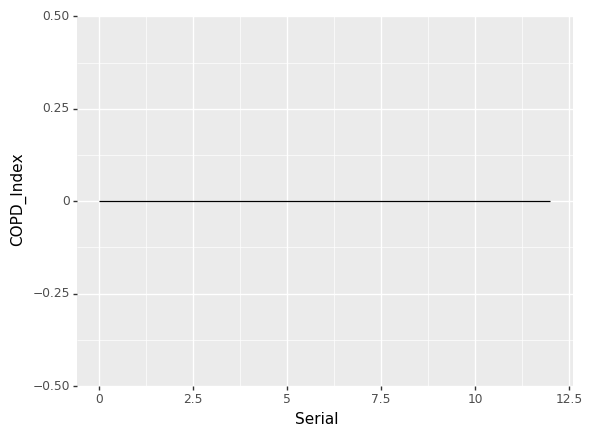

<ggplot: (-9223363256519848483)>


''

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from plotnine import *

cp_ind=pd.read_csv("COPD_Index.csv",index_col=False)
cp_ind=cp_ind.rename(columns={'Unnamed: 0':'Serial'})
display(cp_ind.head(100))

g2=ggplot(cp_ind, aes(x="Serial", y="COPD_Index"))+ geom_line()  # Geometric o
print(g2)
#    ggsave(plot = g2, filename = "COPD_INdex_Progression", path = ppath)
''''''

#### Plotting  by Date and other Plots
Scrap notebook: https://europa.dsa.missouri.edu/user/pg3fy/notebooks/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/PlottingCombined.ipynb

In [6]:
#IndexFilePath='/dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise/'
OutPlotsPath=IndexFilePath+'Plots'
CreateDirectory(OutPlotsPath)

Id_list=['3054','6219','6115','3121','3127','3104', '3126', '3083','3111']
Id_list=['6509','6514','6515','3135','6501','6507']
for i in Id_list:
    
    command='cp '+IndexFilePath+i+'/OutResults/Progression/'+i+'_Progression.png '+OutPlotsPath
    
    os.system(command)
#chd='cd '+IndexFilePath
#command_zip="zip -r "+OutPlotsPath+".zip "+OutPlotsPath
#print(command_zip)
#os.system(command_zip)

import shutil
shutil.make_archive(OutPlotsPath, 'zip', OutPlotsPath)

/dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/Plots folder already exists.


'/dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/Plots.zip'

## Call for Making Predictions ends

## Filename For Overlapping Plots ends

In [27]:
#Without I:E 
#Counter({6: 723, 5: 688, 7: 657, 8: 493, 3: 432, 9: 257, 4: 237, 2: 227, 1: 166, 0: 85})

#wITHOUT RMSSD, madi (WITH AND WITHOUT rmsd NO EFFECT)
#Counter({6: 727, 4: 690, 7: 675, 8: 471, 3: 435, 9: 259, 2: 248, 1: 196, 5: 159, 0: 105})

#wITHOUT madi
#Counter({6: 718, 4: 687, 7: 668, 8: 459, 3: 433, 9: 252, 2: 242, 5: 222, 1: 187, 0: 97})

#Everything in
#Counter({6: 693, 4: 670, 7: 627, 5: 438, 8: 433, 3: 420, 9: 246, 2: 206, 1: 151, 0: 81})

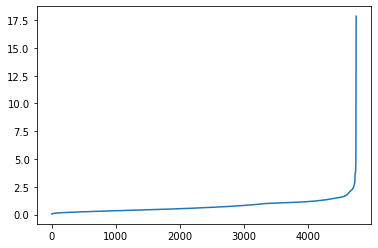

In [49]:
#Paper:https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf
#Source:https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd

#df_3054_Clust=df_3054_Clust.drop(columns=['label'])

from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
def estimate_eps(dataset):
    neighbors = NearestNeighbors(n_neighbors=5)
    neighbors_fit = neighbors.fit(dataset)
    distances, indices = neighbors_fit.kneighbors(dataset)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)
    
estimate_eps(df_3054_Clust)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4754 samples in 0.002s...
[t-SNE] Computed neighbors for 4754 samples in 0.135s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4754
[t-SNE] Computed conditional probabilities for sample 2000 / 4754
[t-SNE] Computed conditional probabilities for sample 3000 / 4754
[t-SNE] Computed conditional probabilities for sample 4000 / 4754
[t-SNE] Computed conditional probabilities for sample 4754 / 4754
[t-SNE] Mean sigma: 0.976080
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.668137
[t-SNE] KL divergence after 1000 iterations: 0.828102


()

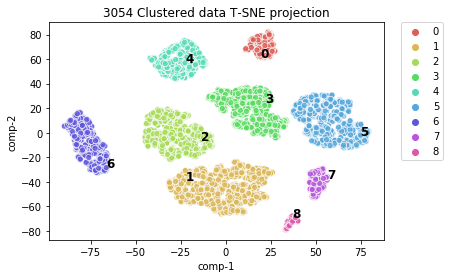

In [50]:
#TSNE PLOTS
alpha=0.8
CallTNSE(df_3054_Clust, label, "Clustered data",i_dates,Resultpath,alpha)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6307 samples in 0.004s...
[t-SNE] Computed neighbors for 6307 samples in 0.149s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6307
[t-SNE] Computed conditional probabilities for sample 2000 / 6307
[t-SNE] Computed conditional probabilities for sample 3000 / 6307
[t-SNE] Computed conditional probabilities for sample 4000 / 6307
[t-SNE] Computed conditional probabilities for sample 5000 / 6307
[t-SNE] Computed conditional probabilities for sample 6000 / 6307
[t-SNE] Computed conditional probabilities for sample 6307 / 6307
[t-SNE] Mean sigma: 0.665504
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.166962
[t-SNE] KL divergence after 1000 iterations: 0.665812


()

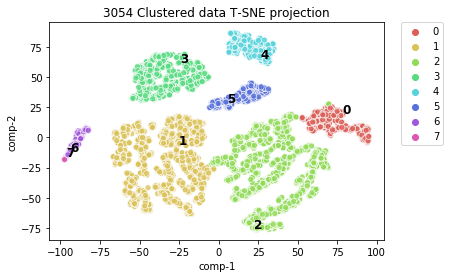

In [36]:
#TSNE PLOTS
alpha=0.8
CallTNSE(df_3054_Clust, label, "Clustered data",i_dates,Resultpath,alpha)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3428 samples in 0.002s...
[t-SNE] Computed neighbors for 3428 samples in 0.100s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3428
[t-SNE] Computed conditional probabilities for sample 2000 / 3428
[t-SNE] Computed conditional probabilities for sample 3000 / 3428
[t-SNE] Computed conditional probabilities for sample 3428 / 3428
[t-SNE] Mean sigma: 0.101210
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.906940
[t-SNE] KL divergence after 1000 iterations: 0.425609


()

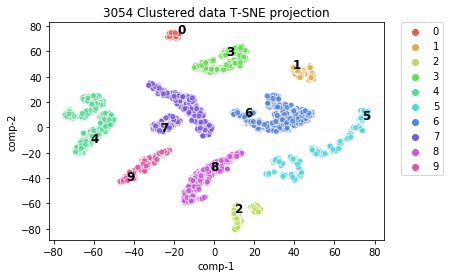

In [17]:
#TSNE PLOTS
alpha=0.8
CallTNSE(df_3054_Clust, label, "Clustered data",i_dates,Resultpath,alpha)


In [30]:
import collections
from plotnine.data import mpg
import math

#from plotnine import ggplot, aes, labs, geom_point, geom_line, geom_bar, facet_grid, facet_wrap, theme
from plotnine import *

#                            df_3054_1,label,'label','mean','Features',"WithRespRate",Resultpath,i_dates
def PlotStatsForLabelClusters2(data,Label,x,yStat,colorFeature,RespRateInclude,path,dating):
    BigfStats=pd.DataFrame()
    data['label']=Label
    for num_lab in Counter(Label).keys():
        label1=pd.DataFrame()
        label1=data[data['label']==num_lab]
        label1=label1.drop(columns=['label'])
        fStats=pd.DataFrame()
        fStats=getDataFeaturesStatistics(label1,"No")
        fStats['Cluster Number']=num_lab
        BigfStats=BigfStats.append(fStats)
    display(BigfStats.tail())
    if(RespRateInclude=="WithoutRespRate"):
        BigfStats=BigfStats[(BigfStats['Features']!='RespRate') & (BigfStats['Features']!='RMS_DA') & (BigfStats['Features']!='RestlessnessType3')]
        g = ggplot(BigfStats, aes(x='Cluster Number', y=yStat, color=colorFeature,group=colorFeature))+\
            geom_point()+geom_line() +  ggtitle("Mean of features in each cluster("+dating+")")+\
        scale_color_manual(values=["#0000FF", "#f71e8b", "#B22222", "#009E73"])#, "#f74a0a","#b202f7"])
         #theme(axis_text_x  = element_text(angle = 70, hjust = 1)) #+
        ggsave(plot = g, filename = dating+"_WithoutRespRate", path = path)
    elif(RespRateInclude=="WithRespRate"):
        BigfStats=BigfStats[(BigfStats['Features']!='Mean_Prom')]
        g = ggplot(BigfStats, aes(x='Cluster Number', y=yStat, color=colorFeature,group=colorFeature))+\
            geom_point()+geom_line() + ggtitle("Mean of features in each cluster("+dating+")")+\
        scale_color_manual(values=["#0000FF", "#f71e8b", "#B22222", "#009E73", "#f74a0a","#b202f7","#FF3300"])
        ggsave(plot = g, filename = dating+"_WithRespRate", path = path)
    elif(RespRateInclude=="Mean_Prom"):
        BigfStats=BigfStats[(BigfStats['Features']!='RespRate') & (BigfStats['Features']!='Mean_Prom') & (BigfStats['Features']!='RMI')]
        g = ggplot(BigfStats, aes(x='Cluster Number', y=yStat, color=colorFeature,group=colorFeature))+\
            geom_point()+geom_line() + ggtitle("Mean of features in each cluster("+dating+")")
        ggsave(plot = g, filename = dating+"_WithRespRate", path = path)
        
    #g = ggplot(BigfStats, aes(x=x, y=yStat, color=colorFeature,group=colorFeature))+scale_y_continuous(trans='log10')+\
    #        geom_point()+geom_line()  scale_y_continuous(trans='log10')+  
    print(g)

In [31]:
df_3054_Clust.head()
df_3054_Clust.rename(columns = {'Ru_RMSSD':'RMSSD', 'Ru_mDI':'mDI',\
                                'Ru_MADI':'MADI','Ru_RMI':'RMI','Ru_RespRate':'RespRate'\
                                ,'Ru_RMDA_RMS':'RMS_DA','Restlessness3Sec':'RestlessnessType3'}, inplace = True)
df_3054_Clust.head()

mDI  RespRate     RMSSD   MADI       RMI    RMS_DA  RestlessnessType3  \
0  0.638333        15  0.830276  1.775  0.421302  1.019169           0.016750   
1  0.566000        13  0.635091  1.080  0.362715  0.994024           0.050500   
2  0.470000        15  0.508852  0.705  0.395330  0.997147           0.000000   
3  0.348333        15  0.481612  0.940  0.402845  0.983772           0.016667   
4  0.461000        14  0.499795  0.735  0.384690  1.008863           0.016750   

   BPI_ht_Mean_max  label  
0         0.255469      5  
1         0.185353      5  
2         0.232336      5  
3         0.238651      5  
4         0.224353      5

In [52]:

#df_3054_Clust=df_3054_1
df_3054_1['Date']=i_dates
df_3054_1['label']=label

label=df_3054_1['label'].to_list()
display(df_3054_1.head())
PlotStatsForLabelClusters2(df_3054_1,df_3054_1['label'].to_list(),'label','mean','Features',"WithRespRate",Resultpath,i_dates)
#PlotStatsForLabelClusters2(df_3054_1,label,'label','mean','Features',"WithoutRespRate",Resultpath,i_dates)
#PlotStatsForLabelClusters2(df_3054_1,label,'label','mean','Features',"Mean_Prom",Resultpath,i_dates)


Ru_mDI  Ru_RespRate  Ru_RMSSD  Ru_MADI    Ru_RMI  Ru_RMDA_RMS  \
0  0.638333           15  0.830276    1.775  0.421302     1.019169   
1  0.566000           13  0.635091    1.080  0.362715     0.994024   
2  0.470000           15  0.508852    0.705  0.395330     0.997147   
3  0.348333           15  0.481612    0.940  0.402845     0.983772   
4  0.461000           14  0.499795    0.735  0.384690     1.008863   

   Restlessness3Sec                                              Index    ID  \
0          0.016750  2018-08-30 00:09:05.645000_2018-08-30 00:10:05...  3054   
1          0.050500  2018-08-30 00:10:05.645000_2018-08-30 00:11:05...  3054   
2          0.000000  2018-08-30 00:13:05.645000_2018-08-30 00:14:05...  3054   
3          0.016667  2018-08-30 00:14:05.645000_2018-08-30 00:15:05...  3054   
4          0.016750  2018-08-30 00:15:05.645000_2018-08-30 00:16:05...  3054   

   Date  BPI_ht_Mean_max  label  
0  3054         0.255469      5  
1  3054         0.185353      5  
2  3054         0.232336      5  
3  3054         0.238651      5  
4  3054         0.224353      5

25%       50%       75%  Date          Features count freq       max  \
0  0.989728  0.997311  1.004364  3054       Ru_RMDA_RMS   549  NaN  1.198635   
0  0.016667  0.033333  0.050500  3054  Restlessness3Sec   549  NaN  0.251000   
0       NaN       NaN       NaN  3054             Index   549    1       NaN   
0       NaN       NaN       NaN  3054                ID   549  549       NaN   
0  0.504730  0.711082  1.091566  3054   BPI_ht_Mean_max   549  NaN  3.442490   

       mean       min       std  \
0  0.996733  0.830254  0.027032   
0  0.039213  0.000000  0.035894   
0       NaN       NaN       NaN   
0       NaN       NaN       NaN   
0  0.901355  0.265845  0.580552   

                                                 top unique  Cluster Number  
0                                                NaN    NaN               0  
0                                                NaN    NaN               0  
0  2019-08-10 21:34:59.080000_2019-08-10 21:35:59...    549               0  
0                                               3054      1               0  
0                                                NaN    NaN               0

/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: Result/3054_WithRespRate
  warn('Filename: {}'.format(filename), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/scales/scale_manual.py:27: PlotnineWarning: Palette can return a maximum of 7 values. 10 were requested from it.
  warn(msg.format(max_n, n), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/scales/scale_manual.py:27: PlotnineWarning: Palette can return a maximum of 7 values. 10 were requested from it.
  warn(msg.format(max_n, n), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 30 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/opt/conda/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:75: P

ValueError: Invalid RGBA argument: nan

In [53]:
df_3054_Clust=df_3054_1.copy()
df_3054_Clust['Date']=i_dates
df_3054_Clust['label']=label

label=df_3054_Clust['label'].to_list()
display(df_3054_Clust.head())
PlotStatsForLabelClusters2(df_3054_Clust,label,'label','mean','Features',"WithRespRate",Resultpath,i_dates)
PlotStatsForLabelClusters2(df_3054_Clust,label,'label','mean','Features',"WithoutRespRate",Resultpath,i_dates)
PlotStatsForLabelClusters2(df_3054_Clust,label,'label','mean','Features',"Mean_Prom",Resultpath,i_dates)



Ru_mDI  Ru_RespRate  Ru_RMSSD  Ru_MADI    Ru_RMI  Ru_RMDA_RMS  \
0  0.638333           15  0.830276    1.775  0.421302     1.019169   
1  0.566000           13  0.635091    1.080  0.362715     0.994024   
2  0.470000           15  0.508852    0.705  0.395330     0.997147   
3  0.348333           15  0.481612    0.940  0.402845     0.983772   
4  0.461000           14  0.499795    0.735  0.384690     1.008863   

   Restlessness3Sec                                              Index    ID  \
0          0.016750  2018-08-30 00:09:05.645000_2018-08-30 00:10:05...  3054   
1          0.050500  2018-08-30 00:10:05.645000_2018-08-30 00:11:05...  3054   
2          0.000000  2018-08-30 00:13:05.645000_2018-08-30 00:14:05...  3054   
3          0.016667  2018-08-30 00:14:05.645000_2018-08-30 00:15:05...  3054   
4          0.016750  2018-08-30 00:15:05.645000_2018-08-30 00:16:05...  3054   

   Date  BPI_ht_Mean_max  label  
0  3054         0.255469      5  
1  3054         0.185353      5  
2  3054         0.232336      5  
3  3054         0.238651      5  
4  3054         0.224353      5

25%       50%       75%  Date          Features count freq       max  \
0  0.989728  0.997311  1.004364  3054       Ru_RMDA_RMS   549  NaN  1.198635   
0  0.016667  0.033333  0.050500  3054  Restlessness3Sec   549  NaN  0.251000   
0       NaN       NaN       NaN  3054             Index   549    1       NaN   
0       NaN       NaN       NaN  3054                ID   549  549       NaN   
0  0.504730  0.711082  1.091566  3054   BPI_ht_Mean_max   549  NaN  3.442490   

       mean       min       std  \
0  0.996733  0.830254  0.027032   
0  0.039213  0.000000  0.035894   
0       NaN       NaN       NaN   
0       NaN       NaN       NaN   
0  0.901355  0.265845  0.580552   

                                                 top unique  Cluster Number  
0                                                NaN    NaN               0  
0                                                NaN    NaN               0  
0  2019-08-10 21:34:59.080000_2019-08-10 21:35:59...    549               0  
0                                               3054      1               0  
0                                                NaN    NaN               0

/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: Result/3054_WithRespRate
  warn('Filename: {}'.format(filename), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/scales/scale_manual.py:27: PlotnineWarning: Palette can return a maximum of 7 values. 10 were requested from it.
  warn(msg.format(max_n, n), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/scales/scale_manual.py:27: PlotnineWarning: Palette can return a maximum of 7 values. 10 were requested from it.
  warn(msg.format(max_n, n), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 30 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/opt/conda/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:75: P

ValueError: Invalid RGBA argument: nan

In [55]:
#df_3054_Clust.isna()
df_3054_Clust[df_3054_Clust.isna().any(axis=1)]

Empty DataFrame
Columns: [Ru_mDI, Ru_RespRate, Ru_RMSSD, Ru_MADI, Ru_RMI, Ru_RMDA_RMS, Restlessness3Sec, Index, ID, Date, BPI_ht_Mean_max, label]
Index: []

In [34]:
df_3054_Clust['Date']=i_dates
df_3054_Clust['label']=label

df_3054_Clust=df_3054_Clust[df_3054_Clust['label']!=6]
#label=df_3054_Clust['label'].

label=df_3054_Clust['label'].to_list()
display(df_3054_Clust.head())
PlotStatsForLabelClusters2(df_3054_Clust,label,'label','mean','Features',"WithRespRate",Resultpath,i_dates)
PlotStatsForLabelClusters2(df_3054_Clust,label,'label','mean','Features',"WithoutRespRate",Resultpath,i_dates)
PlotStatsForLabelClusters2(df_3054_Clust,label,'label','mean','Features',"Mean_Prom",Resultpath,i_dates)



Ru_mDI  Ru_RespRate  Ru_RMSSD  Ru_MADI    Ru_RMI  Ru_RMDA_RMS  \
0  0.638333           15  0.830276    1.775  0.421302     1.019169   
1  0.566000           13  0.635091    1.080  0.362715     0.994024   
2  0.470000           15  0.508852    0.705  0.395330     0.997147   
3  0.348333           15  0.481612    0.940  0.402845     0.983772   
4  0.461000           14  0.499795    0.735  0.384690     1.008863   

   Restlessness3Sec                                              Index    ID  \
0          0.016750  2018-08-30 00:09:05.645000_2018-08-30 00:10:05...  3054   
1          0.050500  2018-08-30 00:10:05.645000_2018-08-30 00:11:05...  3054   
2          0.000000  2018-08-30 00:13:05.645000_2018-08-30 00:14:05...  3054   
3          0.016667  2018-08-30 00:14:05.645000_2018-08-30 00:15:05...  3054   
4          0.016750  2018-08-30 00:15:05.645000_2018-08-30 00:16:05...  3054   

   Date  BPI_ht_Mean_max  label  
0  3054         0.255469      5  
1  3054         0.185353      5  
2  3054         0.232336      5  
3  3054         0.238651      5  
4  3054         0.224353      5

25%       50%       75%  Date          Features count freq       max  \
0  0.989728  0.997311  1.004364  3054       Ru_RMDA_RMS   549  NaN  1.198635   
0  0.016667  0.033333  0.050500  3054  Restlessness3Sec   549  NaN  0.251000   
0       NaN       NaN       NaN  3054             Index   549    1       NaN   
0       NaN       NaN       NaN  3054                ID   549  549       NaN   
0  0.504730  0.711082  1.091566  3054   BPI_ht_Mean_max   549  NaN  3.442490   

       mean       min       std  \
0  0.996733  0.830254  0.027032   
0  0.039213  0.000000  0.035894   
0       NaN       NaN       NaN   
0       NaN       NaN       NaN   
0  0.901355  0.265845  0.580552   

                                                 top unique  Cluster Number  
0                                                NaN    NaN               0  
0                                                NaN    NaN               0  
0  2019-08-10 21:34:59.080000_2019-08-10 21:35:59...    549               0  
0                                               3054      1               0  
0                                                NaN    NaN               0

/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: Result/3054_WithRespRate
  warn('Filename: {}'.format(filename), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/scales/scale_manual.py:27: PlotnineWarning: Palette can return a maximum of 7 values. 10 were requested from it.
  warn(msg.format(max_n, n), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/scales/scale_manual.py:27: PlotnineWarning: Palette can return a maximum of 7 values. 10 were requested from it.
  warn(msg.format(max_n, n), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 30 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/opt/conda/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:75: P

ValueError: Invalid RGBA argument: nan

In [41]:
df_3054_Clust['Date']=i_dates
df_3054_Clust['label']=label

PlotStatsForLabelClusters2(df_3054_Clust,label,'label','mean','Features',"WithRespRate",Resultpath,i_dates)
PlotStatsForLabelClusters2(df_3054_Clust,label,'label','mean','Features',"WithoutRespRate",Resultpath,i_dates)
PlotStatsForLabelClusters2(df_3054_Clust,label,'label','mean','Features',"Mean_Prom",Resultpath,i_dates)



/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: Result/3054_WithRespRate
  warn('Filename: {}'.format(filename), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/scales/scale_manual.py:27: PlotnineWarning: Palette can return a maximum of 7 values. 8 were requested from it.
  warn(msg.format(max_n, n), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/scales/scale_manual.py:27: PlotnineWarning: Palette can return a maximum of 7 values. 8 were requested from it.
  warn(msg.format(max_n, n), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 6 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/opt/conda/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:75: Plot

ValueError: Invalid RGBA argument: nan

In [35]:
df_3054_Clust['Date']=i_dates
df_3054_Clust['label']=label

PlotStatsForLabelClusters2(df_3054_Clust,label,'label','mean','Features',"WithRespRate",Resultpath,i_dates)
PlotStatsForLabelClusters2(df_3054_Clust,label,'label','mean','Features',"WithoutRespRate",Resultpath,i_dates)
PlotStatsForLabelClusters2(df_3054_Clust,label,'label','mean','Features',"Mean_Prom",Resultpath,i_dates)



25%       50%       75%  Date          Features count freq       max  \
0  0.989728  0.997311  1.004364  3054       Ru_RMDA_RMS   549  NaN  1.198635   
0  0.016667  0.033333  0.050500  3054  Restlessness3Sec   549  NaN  0.251000   
0       NaN       NaN       NaN  3054             Index   549    1       NaN   
0       NaN       NaN       NaN  3054                ID   549  549       NaN   
0  0.504730  0.711082  1.091566  3054   BPI_ht_Mean_max   549  NaN  3.442490   

       mean       min       std  \
0  0.996733  0.830254  0.027032   
0  0.039213  0.000000  0.035894   
0       NaN       NaN       NaN   
0       NaN       NaN       NaN   
0  0.901355  0.265845  0.580552   

                                                 top unique  Cluster Number  
0                                                NaN    NaN               0  
0                                                NaN    NaN               0  
0  2019-08-10 21:34:59.080000_2019-08-10 21:35:59...    549               0  
0                                               3054      1               0  
0                                                NaN    NaN               0

/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: Result/3054_WithRespRate
  warn('Filename: {}'.format(filename), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/scales/scale_manual.py:27: PlotnineWarning: Palette can return a maximum of 7 values. 10 were requested from it.
  warn(msg.format(max_n, n), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/scales/scale_manual.py:27: PlotnineWarning: Palette can return a maximum of 7 values. 10 were requested from it.
  warn(msg.format(max_n, n), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 30 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/opt/conda/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:75: P

ValueError: Invalid RGBA argument: nan

In [36]:
df_3054_Clust['Date']=i_dates
df_3054_Clust['label']=label

PlotStatsForLabelClusters(df_3054_Clust,label,'label','mean','Features',"WithRespRate",Resultpath,i_dates)
PlotStatsForLabelClusters(df_3054_Clust,label,'label','mean','Features',"WithoutRespRate",Resultpath,i_dates)



/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: Result/3054_WithRespRate
  warn('Filename: {}'.format(filename), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/scales/scale_manual.py:27: PlotnineWarning: Palette can return a maximum of 6 values. 10 were requested from it.
  warn(msg.format(max_n, n), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/scales/scale_manual.py:27: PlotnineWarning: Palette can return a maximum of 6 values. 10 were requested from it.
  warn(msg.format(max_n, n), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 36 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/opt/conda/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:75: P

ValueError: Invalid RGBA argument: nan

In [21]:
#df_3054_Clust['Ru_RMDA_RMS'].plot()

In [29]:
import collections
from plotnine.data import mpg
import math

#from plotnine import ggplot, aes, labs, geom_point, geom_line, geom_bar, facet_grid, facet_wrap, theme
from plotnine import *
def PlotStatsForLabelClusters_RuRMSSD(data,llabel,x,yStat,colorFeature,RespRateInclude,path,dating,selectedfeature1,color):
    BigfStats=pd.DataFrame()
    data['label']=llabel
    #BigfStats=BigfStats.rename(columns={'label':'Cluster Number'})
    for num_lab in Counter(Label).keys():
        label1=pd.DataFrame()
        label1=data[data['label']==num_lab]
        label1=label1.drop(columns=['label'])
        fStats=pd.DataFrame()
        fStats=getDataFeaturesStatistics(label1,"No")
        fStats['Cluster Number']=num_lab
        BigfStats=BigfStats.append(fStats)
        #display(BigfStats.tail())
        #BigfStats=BigfStats.rename(columns={'label':'Cluster Number'})
    #display(BigfStats.head())
    
    BigfStats=BigfStats[(BigfStats['Features']==selectedfeature1)]# | (BigfStats['Features']==selectedfeature2)] #Ru_RMDA_RMS
    g = ggplot(BigfStats, aes(x='Cluster Number', y=yStat, color=colorFeature,group=colorFeature))+\
            geom_point()+geom_line() +  ggtitle(dating+" Variations in features in each cluster")+\
            scale_color_manual(values=[color])#,"#b202f7","#FF3300"])#, "#f71e8b", "#B22222", "#009E73", "#f74a0a","#b202f7","#FF3300"])
    ggsave(plot = g, filename = dating+"_WithoutRespRate", path = path)
    #        geom_point()+geom_line()    
    print(g)
    
    #\#+ facet_wrap('Date')# + theme(axis_text_x  = element_text(angle = 70, hjust = 1)) #+

In [30]:
df_3054_Clust.head()

Ru_mDI  Ru_RespRate  Ru_RMSSD  Ru_MADI    Ru_RMI  Ru_RMDA_RMS  \
0  0.638333           15  0.830276    1.775  0.421302     1.019169   
1  0.566000           13  0.635091    1.080  0.362715     0.994024   
2  0.470000           15  0.508852    0.705  0.395330     0.997147   
3  0.348333           15  0.481612    0.940  0.402845     0.983772   
4  0.461000           14  0.499795    0.735  0.384690     1.008863   

   Restlessness3Sec    BPI_I2    BPI_E2  
0          0.016750  1.170796  1.148775  
1          0.050500  1.245709  1.253198  
2          0.000000  1.131882  1.135121  
3          0.016667  1.112008  1.130351  
4          0.016750  1.120059  1.110219

In [37]:
PlotStatsForLabelClusters_RuRMSSD(df_3054_Clust,label,'label','mean','Features',"WithoutRespRate",Resultpath,i_dates,'RestlessnessType3',"#b202f7")

PlotStatsForLabelClusters_RuRMSSD(df_3054_Clust,label,'label','mean','Features',"WithoutRespRate",Resultpath,i_dates,'RMS_DA',"#0066FF")



NameError: name 'PlotStatsForLabelClusters_RuRMSSD' is not defined

In [38]:

PlotStatsForLabelClusters_RuRMSSD(df_3054_Clust,label,'label','mean','Features',"WithoutRespRate",Resultpath,i_dates,'RespRate',"#0000FF")


NameError: name 'PlotStatsForLabelClusters_RuRMSSD' is not defined

In [39]:
PlotStatsForLabelClusters_RuRMSSD(df_3054_Clust,label,'label','mean','Features',"WithoutRespRate",Resultpath,i_dates,'RMS_DA',)


NameError: name 'PlotStatsForLabelClusters_RuRMSSD' is not defined

In [40]:
PlotStatsForLabelClusters_RuRMSSD(df_3054_Clust,label,'label','mean','Features',"WithoutRespRate",Resultpath,i_dates,'RestlessnessType3')


NameError: name 'PlotStatsForLabelClusters_RuRMSSD' is not defined

In [41]:
PlotStatsForLabelClusters_RuRMSSD(df_3054_Clust,label,'label','mean','Features',"WithoutRespRate",Resultpath,i_dates,'Restlessness3Sec')


NameError: name 'PlotStatsForLabelClusters_RuRMSSD' is not defined

In [42]:
#i_dates='3054'
#PlotStatsForLabelClusters_RuRMSSD(df_3054_Clust,label,'label','50%','Features',"WithoutRespRate",Resultpath,i_dates)

In [43]:
#df_3054_Clust=df_3054_Clust.drop(columns=['Date','label'])

Cal=pd.DataFrame()
Cal=df_3054_Clust
Cal['date']=dates
Cal['label']=label

NewCal=pd.DataFrame()
NewCal=pd.DataFrame(Cal.groupby(['date','label'])['label'].count())
NewCal=NewCal.rename(columns={'label':'count'}).reset_index()
display(NewCal.head())

TotalCount=pd.DataFrame()
TotalCount=NewCal.groupby(['date'])['count'].agg(sum).reset_index().rename(columns={'count':'Totalcount'})

NewCal=NewCal.merge(TotalCount, how='inner', on='date')

NewCal['percent']=(NewCal['count']/NewCal['Totalcount'])*100

#NewCal=NewCal[NewCal['percent']>=1.0]

date  label  count
0  2018-08-30      1      8
1  2018-08-30      2      6
2  2018-08-30      3     36
3  2018-08-30      4     24
4  2018-08-30      5    147

In [44]:
NewCal=NewCal[NewCal['percent']>=1.0]
NewCal['Combined']=NewCal['date']+str(NewCal['label'])

display(NewCal.head(20))

date  label  count  Totalcount    percent  \
0   2018-08-30      1      8         221   3.619910   
1   2018-08-30      2      6         221   2.714932   
2   2018-08-30      3     36         221  16.289593   
3   2018-08-30      4     24         221  10.859729   
4   2018-08-30      5    147         221  66.515837   
5   2018-09-30      0     25         232  10.775862   
6   2018-09-30      1     40         232  17.241379   
7   2018-09-30      2     36         232  15.517241   
8   2018-09-30      3     25         232  10.775862   
9   2018-09-30      4     61         232  26.293103   
10  2018-09-30      5     45         232  19.396552   
12  2018-10-15      1      9         235   3.829787   
13  2018-10-15      2     32         235  13.617021   
14  2018-10-15      3     13         235   5.531915   
15  2018-10-15      4     24         235  10.212766   
16  2018-10-15      5    155         235  65.957447   
17  2018-11-27      1     12         199   6.030151   
18  2018-11-27      2     24         199  12.060302   
19  2018-11-27      3     29         199  14.572864   
20  2018-11-27      4     26         199  13.065327   

                                             Combined  
0   2018-08-300      1\n1      2\n2      3\n3     ...  
1   2018-08-300      1\n1      2\n2      3\n3     ...  
2   2018-08-300      1\n1      2\n2      3\n3     ...  
3   2018-08-300      1\n1      2\n2      3\n3     ...  
4   2018-08-300      1\n1      2\n2      3\n3     ...  
5   2018-09-300      1\n1      2\n2      3\n3     ...  
6   2018-09-300      1\n1      2\n2      3\n3     ...  
7   2018-09-300      1\n1      2\n2      3\n3     ...  
8   2018-09-300      1\n1      2\n2      3\n3     ...  
9   2018-09-300      1\n1      2\n2      3\n3     ...  
10  2018-09-300      1\n1      2\n2      3\n3     ...  
12  2018-10-150      1\n1      2\n2      3\n3     ...  
13  2018-10-150      1\n1      2\n2      3\n3     ...  
14  2018-10-150      1\n1      2\n2      3\n3     ...  
15  2018-10-150      1\n1      2\n2      3\n3     ...  
16  2018-10-150      1\n1      2\n2      3\n3     ...  
17  2018-11-270      1\n1      2\n2      3\n3     ...  
18  2018-11-270      1\n1      2\n2      3\n3     ...  
19  2018-11-270      1\n1      2\n2      3\n3     ...  
20  2018-11-270      1\n1      2\n2      3\n3     ...

In [45]:
Combined=[]
for each_date in NewCal['date'].sort_values().unique():
    for LAB in range(10):
        found = NewCal.loc[NewCal['Combined'].str.contains(each_date+"_"+str(LAB),case=False)]
        #print(LAB,"\n",found.empty)
        if found.empty==True:
            #print(each_date+"_"+str(LAB))
            df2 = pd.DataFrame([[each_date,LAB,0,0,0,each_date+"_"+str(LAB)]], columns=['date','label','count','Totalcount','percent','Combined'])
            NewCal=pd.concat([df2,NewCal])
            


In [46]:
for each_date in NewCal['date'].sort_values().unique():
    for LAB in range(10):
        found = NewCal.loc[NewCal['Combined'].str.contains(each_date+"_"+str(LAB),case=False)]
        #print(LAB,"\n",found.empty)
        if found.empty==True:
            print(each_date+"_"+str(LAB))

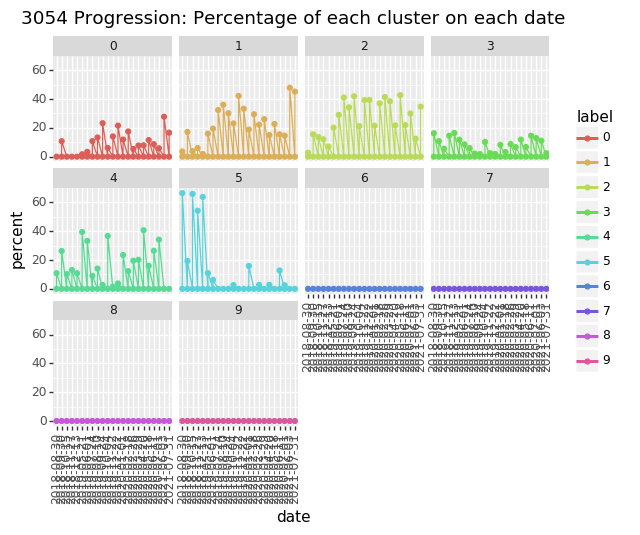

<ggplot: (-9223363293447371772)>

In [47]:
#NewCal=NewCal[NewCal['label']!='4'] #4
#NewCal=NewCal[NewCal['label']!='6']
NewCal['label']= NewCal['label'].astype(str)
ggplot(NewCal, aes(x='date', y='percent', color='label',group='label'))+\
            geom_point()+geom_line() + theme(axis_text_x=element_text(angle=90, vjust=1))+\
ggtitle("3054 Progression: Percentage of each cluster on each date")+facet_wrap(['label'])#+\
#scale_color_brewer(palette=1,type='qual')

#coord_flip()+

In [48]:

g = ggplot(NewCal, aes(x='date', y='count', color='label',group='label'))+\
            geom_point()+geom_line() + ggtitle("3054 Progression: Variations in counts of each cluster with time")
ggsave(plot = g, filename = "ClusterCountsin3054.png", path = path)

/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/Features_MACResults_TestingPeakDetect_WithoutImages_AmplitudeTest_ProminenceTest_WithHeight/3054/ClusterCountsin3054.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


In [49]:
from collections import Counter
#print((UniqueOfLabel(label)).items)
c=Counter(label)

label_df=pd.DataFrame()
label_df=pd.DataFrame.from_dict(c, orient='index').T
#label_df['date']='2019-01-01'
Unique_Labels=list(c.keys())
print(Counter(label))
#print(IDdd)
#print(label)
label_df.head()

Counter({2: 1556, 1: 1260, 4: 1003, 5: 743, 0: 549, 3: 457})


5    3     4     2     1    0
0  743  457  1003  1556  1260  549

## Perform TNSE on Combined Clustering results

In [50]:
'''
df_Orig=df_Comb1
df_Comb1['label']=label
df_Comb1['IDD']=IDdd
df_Comb1=df_Comb1[df_Comb1['label']!=2]
print(df_Comb1.shape)
IDdd=df_Comb1['IDD'].to_list()
label=df_Comb1['label'].to_list()
len(label)
'''

"\ndf_Orig=df_Comb1\ndf_Comb1['label']=label\ndf_Comb1['IDD']=IDdd\ndf_Comb1=df_Comb1[df_Comb1['label']!=2]\nprint(df_Comb1.shape)\nIDdd=df_Comb1['IDD'].to_list()\nlabel=df_Comb1['label'].to_list()\nlen(label)\n"

In [51]:
'''
#FOR DATE: '2019-10-02'
mapping = {
# old: new
  0:4,  
}
label = [mapping.get(number, number) for number in label]


mapping = {
# old: new
    3:0,  
    4:2
}
label = [mapping.get(number, number) for number in label]


'''

"\n#FOR DATE: '2019-10-02'\nmapping = {\n# old: new\n  0:4,  \n}\nlabel = [mapping.get(number, number) for number in label]\n\n\nmapping = {\n# old: new\n    3:0,  \n    4:2\n}\nlabel = [mapping.get(number, number) for number in label]\n\n\n"

In [ ]:
from collections import Counter
#print((UniqueOfLabel(label)).items)
c=Counter(label)

label_df=pd.DataFrame()
label_df=pd.DataFrame.from_dict(c, orient='index').T
label_df['date']='2019-01-01'
Unique_Labels=list(c.keys())
print(Counter(label))
#print(IDdd)
#print(label)
label_df.head()

In [ ]:
print(np.unique(label))

In [ ]:
#!pip install numpy --upgrade
#import numpy

In [ ]:
CallTNSE(df_Comb1, label, "Clustered data") #"Clustered data" is the plot titleName

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 570 samples in 0.000s...
[t-SNE] Computed neighbors for 570 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 570 / 570
[t-SNE] Mean sigma: 0.124045
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.575737
[t-SNE] KL divergence after 1000 iterations: 0.175674


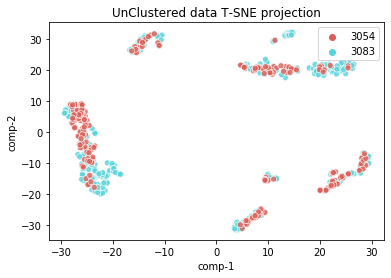

In [30]:
'''
mapping = {
# old: new
  "3083":1,
"3127":0
}
IDdd = [mapping.get(number, number) for number in IDdd]
'''


CallTNSE(df_Comb1, IDdd, "UnClustered data") #"UnClustered data" is the plot titleName



In [50]:
Cal=pd.DataFrame()
Cal=df_Comb1
Cal['ID']=IDdd
Cal['label']=label

NewCal=pd.DataFrame()
NewCal=pd.DataFrame(Cal.groupby(['ID','label'])['label'].count())
NewCal


label
ID   label       
3054 0         10
     1         47
     2        114
     3         25
     4         50
3083 0         12
     1         38
     2        137
     3         31
     4        106

In [23]:
import collections
from plotnine.data import mpg
from plotnine import ggplot, aes, labs, geom_point, geom_line, geom_bar, facet_grid, facet_wrap, theme
def PlotStatsForLabelClusters(data,Label,x,yStat,colorFeature):
    BigfStats=pd.DataFrame()
    data['label']=Label
    for num_lab in Counter(Label).keys():
        label1=pd.DataFrame()
        label1=data[data['label']==num_lab]
        label1=label1.drop(columns=['label'])
        fStats=pd.DataFrame()
        fStats=getDataFeaturesStatistics(label1,"No")
        fStats['label']=num_lab
        BigfStats=BigfStats.append(fStats)
        #display(BigfStats.tail())

    #BigfStats=BigfStats[(BigfStats['Features']!='Ru_RespRate') & (BigfStats['Features']!='Ru_SD_RR')]
    g = ggplot(BigfStats, aes(x=x, y=yStat, color=colorFeature,group=colorFeature)) +\
            geom_point()+geom_line()#+ facet_wrap('Date')# + theme(axis_text_x  = element_text(angle = 70, hjust = 1)) #+
    print(g)

In [24]:
df_Comb1['Date']='2020-01-05'
df_Comb1['label']=label

PlotStatsForLabelClusters(df_Comb1,label,'label','mean','Features')


NameError: name 'df_Comb1' is not defined

In [25]:
df_Comb1['Date']='2020-01-05'
df_Comb1['label']=label

PlotStatsForLabelClusters(df_Comb1,label,'label','mean','Features')


NameError: name 'df_Comb1' is not defined

In [213]:
IDs=['3054']#,'3083']
df_Comb1=df_3054
df_Comb1['IDs']=IDdd
df_Comb1['label']=label
df_Comb1['Index']=Index
Uniq_Labels=np.unique(label)

for ids in IDs:
    res=pd.DataFrame()
    res=df_Comb1[df_Comb1['IDs']==ids]
    id_label=res['label'].to_list()
    index=res['Index'].to_list()
    #print(len(index))
    path=MainPath+str(ids)+"/"
    
    Images=Get_All_png_pathnames(path)
    CopyFiles(index,Images,id_label)
    #break
    

NameError: name 'df_Comb1' is not defined

In [70]:
import shutil
def CopyFiles(Indexes,ImagesPath,labels):
    #GET UNIQUE LABELS
    Unique_labels=np.unique(labels)
    
    #fOR EACH LABEL
    for i in range(len(labels)):
        getName=[ele for ele in ImagesPath if ele.endswith(Indexes[i]+".png")]
    
        dirName=os.path.dirname(getName[0])
        fileName=os.path.basename(getName[0])
        print(">>>",dirName,"####",fileName,">>>") 
        #DELETING FILES IN THE PATH OF LABEL
        if(i==0):
            for labelNum in Unique_labels:
                deletePath=dirName+"/"+str(labelNum)+"/"
                print("DELETE   :", deletePath)
                RemoveAllFilesInADirectory(deletePath)
        
        #Copying Files for each cluster
        #if os.path.isdir(dirName+"/"+str(labels[i])): 
        if os.path.exists(dirName+"/"+str(labels[i])+"/"):
            shutil.copy2(getName[0],dirName+"/"+str(labels[i])+"/"+fileName)
        else:
            os.mkdir(dirName+"/"+str(label[i]))
            if os.path.exists((getName[0],dirName+"/"+str(labels[i])+"/"+fileName) == False):
                shutil.copy2(getName[0],dirName+"/"+str(labels[i])+"/"+fileName)



In [25]:
#16.5,14,18,22.5
#df_Comb1.head()

Ru_RMSSD    Ru_mDI  Ru_MADI   Ru_RMDA    Ru_RMI  Ru_RespRate        Date  \
0  1.698644  1.461429    3.040  1.035002  0.957950           19  2020-01-05   
1  0.637286  0.573333    1.020  0.985076  0.630797           16  2020-01-05   
2  0.637746  0.540000    1.090  1.009548  0.616427           15  2020-01-05   
3  1.927414  1.445000    3.700  0.988169  0.949713           16  2020-01-05   
4  0.306009  0.245000    0.515  0.969202  0.577845           16  2020-01-05   

   label  
0      2  
1      0  
2      0  
3      3  
4      0

In [39]:
import shutil
def CopyFiles(Indexes,ImagesPath,labels):
    #GET UNIQUE LABELS
    Unique_labels=np.unique(labels)
    print(len(labels))
    print(len(Indexes))
    #fOR EACH LABEL
    for i in range(len(labels)):
        print(len(Indexes[i]))
        getName=[ele for ele in ImagesPath if ele.endswith(Indexes[i]+".png")]
        #print(">>",getName)
        #if not getName:
        #    continue
        dirName=os.path.dirname(getName[0])
        fileName=os.path.basename(getName[0])
    
    
        
        #DELETING FILES IN THE PATH OF LABEL
        if(i==1):
            for labelNum in Unique_labels:
                deletePath=dirName+"/"+str(labelNum)+"/"
                print("DELETE   :", deletePath)
                RemoveAllFilesInADirectory(deletePath)
        
        #Copying Files for each cluster
        if os.path.isdir(dirName+"/"+str(label[i])): 
            shutil.copy2(getName[0],dirName+"/"+str(label[i])+"/"+fileName)
        else:
            os.mkdir(dirName+"/"+str(label[i]))
            shutil.copy2(getName[0],dirName+"/"+str(label[i])+"/"+fileName)
    
    cwd = os.getcwd()
    os.chdir(dirName)       
    for lab in Unique_labels:
        #cmd1='cd dirName'
        cmd2='zip -r '+str(lab)+'.zip '+str(lab)
        os.system(cmd2)
    os.chdir(cwd)   

In [74]:
IDs=['3054']#,'3083']
dateSel='2019-08-10' 

IDs=['3083']
dateSel='2019-05-08'
df_3054_1=df_Comb[df_Comb['Date']==3054]
df_Comb1=df_3054_1[df_3054_1['Date']==dateSel]
df_Comb1['IDs']=IDdd
df_Comb1['label']=label
df_Comb1['Index']=Index
Uniq_Labels=np.unique(label)

for ids in IDs:
    res=pd.DataFrame()
    res=df_Comb1[df_Comb1['IDs']==ids]
    id_label=res['label'].to_list()
    index=res['Index'].to_list()
    #print(len(index))
    path=MainPath+str(ids)+"/"
    
    Images=Get_All_png_pathnames(path)
    CopyFiles(index,Images,id_label)
    #break
    
    

763
763
53
53
DELETE   : /home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/Features_MACResults_TestingPeakDetect2/3083/2019-05-08 00:00:00_2019-05-09 00:00:00/imagesBeforeClustering/0/
delete:::::::::: /home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/Features_MACResults_TestingPeakDetect2/3083/2019-05-08 00:00:00_2019-05-09 00:00:00/imagesBeforeClustering/0/2019-05-08 00:19:58.685000_2019-05-08 00:20:58.685000.png
DELETE   : /home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/Features_MACResults_TestingPeakDetect2/3083/2019-05-08 00:00:00_2019-05-09 00:00:00/imagesBeforeClustering/1/
DELETE   : /home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/Features_MACResults_TestingPeakDetect2/3083/2019-05-08 00:00:00_2019-05-09 00:00:00/imagesBeforeClustering/2/
DELETE   : 

In [28]:
CallTNSE(df_Comb1, label)

ValueError: could not convert string to float: '2020-01-05'

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 308 samples in 0.000s...
[t-SNE] Computed neighbors for 308 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 308 / 308
[t-SNE] Mean sigma: 0.391324
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.977482
[t-SNE] KL divergence after 1000 iterations: 0.088827


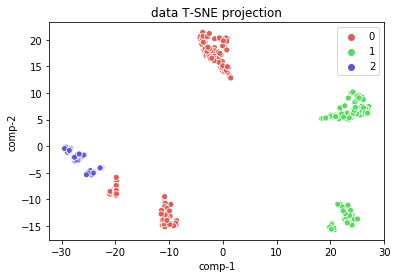

In [67]:
CallTNSE(df_Comb1, label)

In [32]:
import seaborn as sns
from sklearn.manifold import TSNE
#Source: https://www.datatechnotes.com/2020/11/tsne-visualization-example-in-python.html

#df_Comb1
#label=df_test['Normal'].to_list()
#df_test=df_test.drop(columns=['Normal'])
X=df_Comb1
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(X) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 553 samples in 0.001s...
[t-SNE] Computed neighbors for 553 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 553 / 553
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 41.842888
[t-SNE] KL divergence after 1000 iterations: 0.148774


[Text(0.5, 1.0, 'data T-SNE projection')]

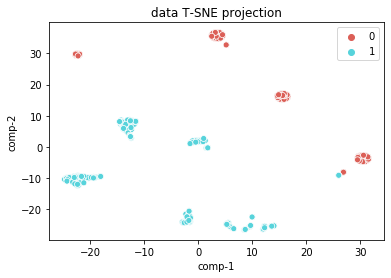

In [33]:
df = pd.DataFrame()
df["y"] = label
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="data T-SNE projection")

In [36]:
import seaborn as sns
from sklearn.manifold import TSNE

def CallTNSE(data, Label):
    #Source: https://www.datatechnotes.com/2020/11/tsne-visualization-example-in-python.html
    #STEP 1: TRANSFORM DATA
    tsne = TSNE(n_components=2, verbose=1, random_state=123)
    z = tsne.fit_transform(data) 
    
    #STEP 2: PROJECT MULTIDIMENSIONAL DATA IN 2D
    df = pd.DataFrame()
    df["y"] = Label
    df["comp-1"] = z[:,0]
    df["comp-2"] = z[:,1]
    
    c=Counter(Label)
    num_clust=len(c.keys())
    sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                    palette=sns.color_palette("hls", num_clust),
                    data=df).set(title="data T-SNE projection")

In [37]:
#df_Comb1['label']=label
#test=df_Comb1.groupby('label').describe().unstack(1)
#test.head(50)


#[count, mean, std, min, max, 25%,50%,75%]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 553 samples in 0.001s...
[t-SNE] Computed neighbors for 553 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 553 / 553
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 41.842888
[t-SNE] KL divergence after 1000 iterations: 0.148774


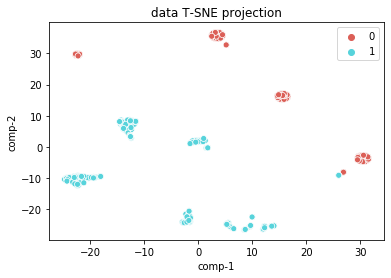

In [38]:
CallTNSE(df_Comb1, label)

## Let's Perform Clustering on 3054 only with new features

In [110]:
#3054 dates ['2019-08-21', '2019-10-02', '2020-01-15' ,'2020-03-05', '2020-04-24'']
#['2019-08-21', '2019-10-02', '2020-01-15', '2020-03-05', '2020-04-24']
#df_3054=pd.DataFrame()
#3127:
dateSel='2019-10-02'#'2019-08-21' #'2020-01-15' #
df_3054_1=pd.DataFrame()
df_3054=pd.DataFrame()
df_3054_1=df_Comb[df_Comb['ID']=='3054']
df_3054=df_3054_1[df_3054_1['Date']==dateSel]

print(np.unique(df_Comb['ID']))
print(np.unique(df_3054_1['ID']))
print(np.unique(df_3054['ID']))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 632 samples in 0.001s...
[t-SNE] Computed neighbors for 632 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 632 / 632
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 40.452297
[t-SNE] KL divergence after 1000 iterations: 0.181453


[Text(0.5, 1.0, 'data T-SNE projection')]

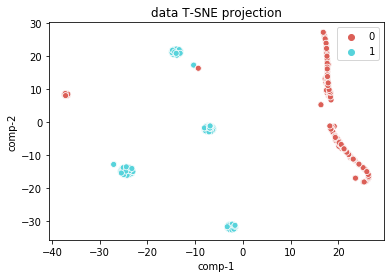

In [46]:
UniqueOfLabel(label)
UniqueOfLabel(IDdd)

dict_items([(1, 593), (2, 74), (0, 56)])
dict_items([('3083', 324), ('3054', 399)])


In [ ]:
def GetStatsOfFeatures(data):
    for each in data.columns:
        

In [47]:
# for each in df_Comb1.columns:
df_Comb1['label']=label        
df_Comb1.groupby("label").mean() #describe()

RMSSD_B2B   mDi_B2B  RMSSD_B2B_diffInAmplitudes  \
label                                                    
0       3.879126  3.868614                    3.255045   
1       3.419083  3.400289                    8.317620   
2       3.484104  3.443080                   11.876753   

       mDi_B2B_diffInAmplitudes  Max_B2B_diffInAmplitudes  \
label                                                       
0                      0.131249                  4.857069   
1                     -2.031113                  8.240308   
2                      2.654589                 25.252874   

       Min_B2B_diffInAmplitudes  RMSSD_B2B_diffInHeights  \
label                                                      
0                     -4.313345                 3.262161   
1                    -16.639823                 8.641801   
2                    -10.624299                12.400784   

       mDi_B2B_diffInHeights  Max_B2B_diffInHeights  Min_B2B_diffInHeights  
label                                                                       
0                   0.105349               4.799277              -4.402554  
1                  -2.486496               7.942135             -17.388090  
2                   2.547540              25.898750             -12.142656

In [47]:
"""
df_test=df_3083

df_test=df_test.drop(columns=['ID','Date'])
df_test = df_test.dropna(axis='columns')

pred=kmComb.predict(df_test)
UniqueOfLabel(pred)
#dict_items([(0, 126), (1, 48), (2, 70)]) 3054 copddate
#dict_items([(0, 189), (2, 80), (1, 39)])
#dict_items([(0, 281), (1, 49), (2, 69)])

#dict_items([(0, 369), (1, 25), (2, 45)]) 3083 2019-05-08
#dict_items([(0, 295), (1, 17), (2, 12)])- 2019-06-08
"""

"\ndf_test=df_3083\n\ndf_test=df_test.drop(columns=['ID','Date'])\ndf_test = df_test.dropna(axis='columns')\n\npred=kmComb.predict(df_test)\nUniqueOfLabel(pred)\n#dict_items([(0, 126), (1, 48), (2, 70)]) 3054 copddate\n#dict_items([(0, 189), (2, 80), (1, 39)])\n#dict_items([(0, 281), (1, 49), (2, 69)])\n\n#dict_items([(0, 369), (1, 25), (2, 45)]) 3083 2019-05-08\n#dict_items([(0, 295), (1, 17), (2, 12)])- 2019-06-08\n"

In [48]:
"""
df_Comb1['label']=label
#new_tar, label
f, ax = plt.subplots(1, 1, figsize = (15, 10))
#calmap.yearplot(events, year=2015, ax=ax)
boxplot = df_Comb1.boxplot(by='label',ax=ax)
f.savefig("BoxPlotsCombined/rel_Combined_"+dateSel+".png", format="png")
"""

'\ndf_Comb1[\'label\']=label\n#new_tar, label\nf, ax = plt.subplots(1, 1, figsize = (15, 10))\n#calmap.yearplot(events, year=2015, ax=ax)\nboxplot = df_Comb1.boxplot(by=\'label\',ax=ax)\nf.savefig("BoxPlotsCombined/rel_Combined_"+dateSel+".png", format="png")\n'

In [49]:
#printConfusionMatrixAndReport(new_tar, label)
#from sklearn.metrics import accuracy_score
#accuracy_score(target, label)

Copying the files works with dirname[0] when not using combined combined data

In [50]:
#CopyFiles(Index,Images,label)


In [51]:
#dirname='/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering/Features_MACResults_TestingMAC/'
#os.system('pwd')
#os.system("cd dirname")
#os.system('pwd')

In [52]:
df_test=df_3054
df_test=df_test.drop(columns=['ID','Date','Index'])
df_test = df_test.dropna(axis='columns')
TestKmeans(1,8,df_test)

ValueError: could not convert string to float: 'Yes'

In [53]:

kmComb=ApplyKmeans(df_test,3)
label=kmComb.labels_

ValueError: could not convert string to float: 'Yes'

### Combined Analysis Ends here

## TNSE Begins here

In [26]:
!pip install -U statsmodels
#!pip install seaborn

     |████████████████████████████████| 17.9MB 617kB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 40kB 15.8MB/s eta 0:00:01
     |████████████████████████████████| 235kB 15.4MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/58/4f/11f34cfc57ead25752a7992b069c36f5d18421958ebd6466ecd849aeaf86/scipy-1.7.3-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl
anceled


In [27]:
!pip install seaborn

In [54]:
#'2019-08-21', '2019-10-02', '2020-01-15' ,'2020-03-05', '2020-04-24''
#df_3054=pd.DataFrame()
#3127:'2019-12-05'
dateSel='2019-08-21'
df_3054_1=pd.DataFrame()
df_3054=pd.DataFrame()
df_3054_1=df_Comb[df_Comb['ID']=='3054']
df_3054=df_3054_1[df_3054_1['Date']==dateSel]

print(np.unique(df_Comb['ID']))
print(np.unique(df_3054_1['ID']))
print(np.unique(df_3054['ID']))

['3054' '3083' '3127' '6514']
['3054']
['3054']


In [58]:
df_test=df_3054
Index=df_test['Index'].to_list()
df_test=df_test.drop(columns=['ID','Date','Index','Normal'])
df_test = df_test.dropna(axis='columns')


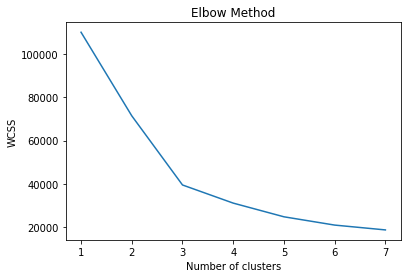

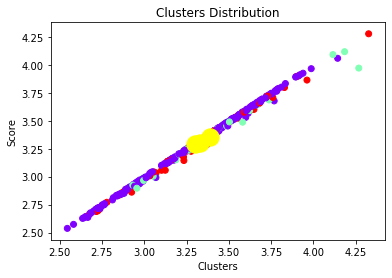

In [59]:
TestKmeans(1,8,df_test)
kmComb=ApplyKmeans(df_test,3)
label=kmComb.labels_

In [60]:
label

array([0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 2, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 2,
       0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 2, 1, 0, 0,

In [61]:
CopyFiles(Index,Images,label)

NameError: name 'label' is not defined

In [19]:
import seaborn as sns
from sklearn.manifold import TSNE
#Source: https://www.datatechnotes.com/2020/11/tsne-visualization-example-in-python.html

#df_Comb1
label=df_test['Normal'].to_list()
df_test=df_test.drop(columns=['Normal'])
X=df_test
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(X) 

NameError: name 'df_test' is not defined

In [63]:
df = pd.DataFrame()
df["y"] = label
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="data T-SNE projection")

NameError: name 'z' is not defined

In [64]:
df_test['label']=label
df_test.head()

RMSSD_B2B   mDi_B2B  RMSSD_B2B_diffInAmplitudes  mDi_B2B_diffInAmplitudes  \
0   3.563781  3.556667                    5.085632                  4.395376   
1   3.248970  3.227143                    2.401133                 -0.320083   
2   3.282331  3.272222                    3.062417                 -1.615690   
3   3.366227  3.353750                    2.019172                  0.163748   
4   3.552939  3.523333                   13.643374                 -0.842540   

   Max_B2B_diffInAmplitudes  Min_B2B_diffInAmplitudes  \
0                  8.905626                  0.890851   
1                  3.102577                 -4.182266   
2                  1.995912                 -4.799458   
3                  3.333223                 -2.604816   
4                 26.103888                -19.358448   

   RMSSD_B2B_diffInHeights  mDi_B2B_diffInHeights  Max_B2B_diffInHeights  \
0                 5.408658               4.468333                   9.94   
1                 2.048574               0.237143                   3.96   
2                 2.907255              -1.724444                   2.19   
3                 1.926016              -0.211250                   3.85   
4                15.323798              -2.111667                  27.29   

   Min_B2B_diffInHeights  label  
0                  -0.04      0  
1                  -3.06      0  
2                  -5.19      0  
3                  -2.36      0  
4                 -23.32      2

In [65]:

df_test.groupby('label')['Resp_Rate_per_minute'].plot(subplots=True)

KeyError: 'Column not found: Resp_Rate_per_minute'

KeyError: 'label'

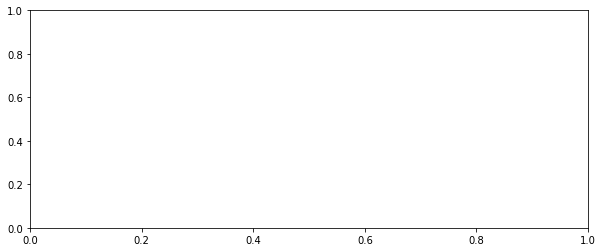

In [66]:
fig, ax = plt.subplots(figsize=(10,4))
for key, grp in df_3054.groupby(['label']):
    ax.plot(grp['Date'], grp['adj_close'], label=key)

ax.legend()
plt.show()

## TNSE Ends here

In [22]:
#df_test=df_3083
df_test=df_3054

df_test=df_test.drop(columns=['ID','Date'])
df_test = df_test.dropna(axis='columns')
TestKmeans(1,8,df_test)
kmComb=ApplyKmeans(df_test,3)
label=kmComb.labels_
UniqueOfLabel(label)

ValueError: could not convert string to float: '2020-01-16 00:08:03.465000_2020-01-16 00:09:03.465000'

In [23]:
#3083
Index=df_data['Start_End'].to_list()
df_var=getVariantFeatures(df_data)

Max_B2B_diffInAmplitudes   31.705237877844215
Min_B2B_diffInAmplitudes   21.74046736536722
Max_B2B_diffInHeights   25.53506995375148
Min_B2B_diffInHeights   21.72332283281734
percentageIE   749.4482087222412
Diff_Max_Min_I   216.19158922976922
Diff_Max_Min_E   216.19158922976922
Normal   0.15900317241906506
7
['Max_B2B_diffInAmplitudes', 'Min_B2B_diffInAmplitudes', 'Max_B2B_diffInHeights', 'Min_B2B_diffInHeights', 'percentageIE', 'Diff_Max_Min_I', 'Diff_Max_Min_E']
(324, 7)


Max_B2B_diffInAmplitudes  Min_B2B_diffInAmplitudes  Max_B2B_diffInHeights  \
0                  3.666266                 -6.785258                   2.54   
1                 11.933497                 -6.349095                  10.49   
2                 15.512638                 -4.274201                  13.81   
3                  5.471752                 -1.626204                   4.90   
0                  5.312775                 -1.260006                   4.73   

   Min_B2B_diffInHeights  percentageIE  Diff_Max_Min_I  Diff_Max_Min_E  
0                  -8.10        100.00       14.830925       14.830925  
1                  -4.93         50.00       20.193425       20.193425  
2                  -4.26         75.00       44.021702       44.021702  
3                  -1.30        100.00        6.924138        6.924138  
0                  -1.08         71.43       15.080838       15.080838

In [53]:
#3054
Index=df_data['Start_End'].to_list()
df_var=getVariantFeatures(df_data)

RMSSD_B2B   0.10913541512825042
mDi_B2B   0.10917082200966481
RMSSD_B2B_diffInAmplitudes   15.63037289000689
mDi_B2B_diffInAmplitudes   7.4929053419051055
Max_B2B_diffInAmplitudes   82.17704047323585
Min_B2B_diffInAmplitudes   56.85371221889658
RMSSD_B2B_diffInHeights   17.88896756079835
mDi_B2B_diffInHeights   9.680234363447772
Max_B2B_diffInHeights   92.67851026614046
Min_B2B_diffInHeights   64.2744366524995
8
['RMSSD_B2B_diffInAmplitudes', 'mDi_B2B_diffInAmplitudes', 'Max_B2B_diffInAmplitudes', 'Min_B2B_diffInAmplitudes', 'RMSSD_B2B_diffInHeights', 'mDi_B2B_diffInHeights', 'Max_B2B_diffInHeights', 'Min_B2B_diffInHeights']
(244, 8)


RMSSD_B2B_diffInAmplitudes  mDi_B2B_diffInAmplitudes  \
0                    3.138236                  1.622301   
1                    2.668548                  1.737390   
2                   19.558846                 -2.565822   
3                   11.629978                 -1.557569   
4                   13.680899                 -1.412623   

   Max_B2B_diffInAmplitudes  Min_B2B_diffInAmplitudes  \
0                  7.223315                 -1.039678   
1                  5.473785                 -0.389231   
2                 38.829689                -34.184995   
3                 12.488191                -25.235444   
4                 18.877142                -25.234340   

   RMSSD_B2B_diffInHeights  mDi_B2B_diffInHeights  Max_B2B_diffInHeights  \
0                 3.311203                1.70875                   8.00   
1                 2.995803                2.01875                   6.30   
2                21.174003               -4.20375                  38.82   
3                13.903326               -0.19625                  19.04   
4                13.682133               -2.04875                  17.00   

   Min_B2B_diffInHeights  
0                  -1.31  
1                  -1.45  
2                 -41.48  
3                 -28.91  
4                 -26.04

In [77]:
#ID=3054
ID=3083
#ID=3127
path="/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering/"
#GeneratePlotsForFeatures(df_var,path,"3083fEATURES___2.pdf")
GeneratePlotsIntoApdfForFeatures(df_var,path+str(ID)+"fEATURES___2.pdf")

0 RMSSD_B2B_diffInAmplitudes
1 mDi_B2B_diffInAmplitudes
2 Max_B2B_diffInAmplitudes
3 Min_B2B_diffInAmplitudes
4 RMSSD_B2B_diffInHeights
5 mDi_B2B_diffInHeights
6 Max_B2B_diffInHeights
7 Min_B2B_diffInHeights


#### Apply K means

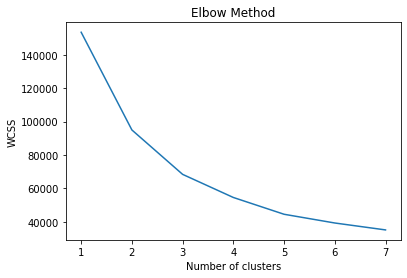

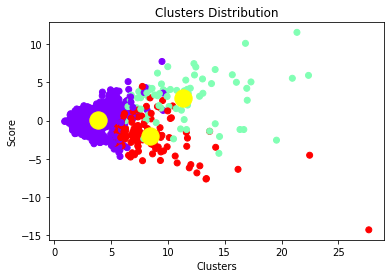

NameError: name 'pickle' is not defined

In [102]:
TestKmeans(1,8,df_var)
km3083=ApplyKmeans(df_var,3)
label=km3083.labels_
pickle.dump(km3083, open("km_with3_combined.pkl", "wb"))

In [100]:
from collections import Counter
c = Counter(label)
print( c.items() )
print(*label)#,len(label),len(target))

dict_items([(0, 495), (1, 73), (2, 115)])
0 1 0 0 0 0 2 1 0 0 0 2 0 2 1 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 2 0 0 0 1 0 2 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 0 1 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 2 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 2 0 0 0 0 0 0 2 2 2 0 2 0 1 0 0 0 0 0 0 0 2 0 1 0 0 1 0 2 0 2 0 0 0 2 0 0 0 0 0 1 0 0 0 1 0 0 0 0 2 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 0 2 1 2 0 2 2 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 0 1 2 2 1 1 2 0 0 1 2 2 0 0 2 0 0 1 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 1 2 0 1 2 2 

In [101]:
from collections import Counter
c = Counter(target)
print( c.items() )
print(target)
from sklearn.metrics import accuracy_score
accuracy_score(target, label)

dict_items([(1, 439), (0, 244)])
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

0.22108345534407028

In [94]:
from collections import Counter
new_tar=[]
for i in target:
    if i==0:
        new_tar.append(1)
    elif i==1:
        new_tar.append(0)
    else:
        new_tar.append(2)
        

c = Counter(new_tar)
print( c.items() )
print(accuracy_score(new_tar, label))
print(new_tar)
from sklearn.metrics import accuracy_score


dict_items([(0, 439), (1, 244)])
0.6105417276720352
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

[[394  45]
 [162  82]]
              precision    recall  f1-score   support

           0       0.71      0.90      0.79       439
           1       0.65      0.34      0.44       244

   micro avg       0.70      0.70      0.70       683
   macro avg       0.68      0.62      0.62       683
weighted avg       0.69      0.70      0.67       683



In [ ]:
dirname='/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering/Features_MACResults_TestingMAC/'
os.system('pwd')
os.system("cd dirname")
os.system('pwd')

In [ ]:
!zip -r 0 

['RMSSD_B2B_diffInAmplitudes', 'mDi_B2B_diffInAmplitudes', 'Max_B2B_diffInAmplitudes', 'Min_B2B_diffInAmplitudes', 'RMSSD_B2B_diffInHeights', 'mDi_B2B_diffInHeights', 'Max_B2B_diffInHeights', 'Min_B2B_diffInHeights', 'percentageIE', 'Resp_Rate_per_minute', 'Diff_Max_Min_I', 'Diff_Max_Min_E']

# 3083 Ends Here

## 3054 BEgins here

In [133]:
#3054
Index=df_data['Start_End'].to_list()
df_3054=getVariantFeatures(df_data)

RMSSD_B2B   0.10913541512825042
mDi_B2B   0.10917082200966481
Max_B2B   0.20088525391283815
Min_B2B   0.23223955803481075
RMSSD_B2B_diffInAmplitudes   15.63037289000689
mDi_B2B_diffInAmplitudes   7.4929053419051055
Max_B2B_diffInAmplitudes   82.17704047323585
Min_B2B_diffInAmplitudes   56.85371221889658
RMSSD_B2B_diffInHeights   17.88896756079835
mDi_B2B_diffInHeights   9.680234363447772
Max_B2B_diffInHeights   92.67851026614046
Min_B2B_diffInHeights   64.2744366524995
8
['RMSSD_B2B_diffInAmplitudes', 'mDi_B2B_diffInAmplitudes', 'Max_B2B_diffInAmplitudes', 'Min_B2B_diffInAmplitudes', 'RMSSD_B2B_diffInHeights', 'mDi_B2B_diffInHeights', 'Max_B2B_diffInHeights', 'Min_B2B_diffInHeights']
(244, 8)


RMSSD_B2B_diffInAmplitudes  mDi_B2B_diffInAmplitudes  \
0                    3.138236                  1.622301   
1                    2.668548                  1.737390   
2                   19.558846                 -2.565822   
3                   11.629978                 -1.557569   
4                   13.680899                 -1.412623   

   Max_B2B_diffInAmplitudes  Min_B2B_diffInAmplitudes  \
0                  7.223315                 -1.039678   
1                  5.473785                 -0.389231   
2                 38.829689                -34.184995   
3                 12.488191                -25.235444   
4                 18.877142                -25.234340   

   RMSSD_B2B_diffInHeights  mDi_B2B_diffInHeights  Max_B2B_diffInHeights  \
0                 3.311203                1.70875                   8.00   
1                 2.995803                2.01875                   6.30   
2                21.174003               -4.20375                  38.82   
3                13.903326               -0.19625                  19.04   
4                13.682133               -2.04875                  17.00   

   Min_B2B_diffInHeights  
0                  -1.31  
1                  -1.45  
2                 -41.48  
3                 -28.91  
4                 -26.04

In [134]:
path="/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering/"
#GeneratePlotsForFeatures(df_var,path,"3054fEATURES___2.pdf")
GeneratePlotsIntoApdfForFeatures(df_3054,path+str(ID)+"fEATURES___2.pdf")

0 RMSSD_B2B_diffInAmplitudes
1 mDi_B2B_diffInAmplitudes
2 Max_B2B_diffInAmplitudes
3 Min_B2B_diffInAmplitudes
4 RMSSD_B2B_diffInHeights
5 mDi_B2B_diffInHeights
6 Max_B2B_diffInHeights
7 Min_B2B_diffInHeights


In [135]:
clusters_pred = km3083.predict(df_3054)
print(df_3054.shape[0],len(clusters_pred))
print(clusters_pred)

ValueError: Incorrect number of features. Got 8 features, expected 9

In [100]:
CopyFiles(Index,Images,clusters_pred)

DELETE   : /home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering/Features_MACResults_TestingMAC/3054/2020-01-15 00:00:00_2020-01-16 00:00:00/imagesBeforeClustering/0/
DELETE   : /home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering/Features_MACResults_TestingMAC/3054/2020-01-15 00:00:00_2020-01-16 00:00:00/imagesBeforeClustering/1/
delete:::::::::: /home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering/Features_MACResults_TestingMAC/3054/2020-01-15 00:00:00_2020-01-16 00:00:00/imagesBeforeClustering/1/2020-01-15 00:03:36.940000_2020-01-15 00:04:36.940000.png


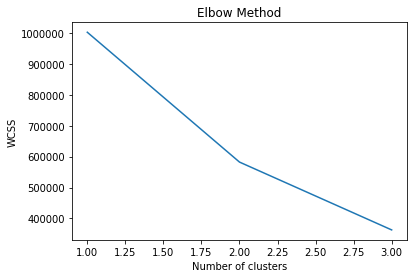

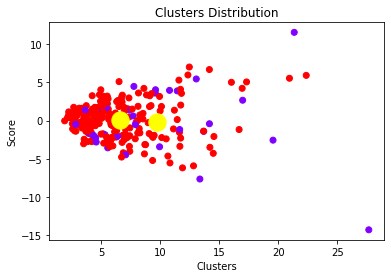

[1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0]


In [95]:
df_var=df_3054
TestKmeans(1,4,df_var)
km=ApplyKmeans(df_var,2)
label=km.labels_
print(label)

In [53]:
from collections import Counter
c = Counter(label)
print( c.items() )

dict_items([(1, 214), (0, 30)])


In [ ]:
CopyFiles(Index,Images,label)

In [30]:
df_var["label"]=label
#First
First=df_var[df_var['label']==0]
print(np.unique(First['label']))
#Second
Second=df_var[df_var['label']==1]

[0]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
path="/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering/"
GeneratePlotsIntoApdfForFeatures(Second,path+"3054fEATURES___0.pdf")


0 RMSSD_B2B_diffInAmplitudes
1 mDi_B2B_diffInAmplitudes
2 Max_B2B_diffInAmplitudes
3 Min_B2B_diffInAmplitudes
4 RMSSD_B2B_diffInHeights
5 mDi_B2B_diffInHeights
6 Max_B2B_diffInHeights
7 Min_B2B_diffInHeights
8 percentageIE
9 Resp_Rate_per_minute
10 Diff_Max_Min_I
11 Diff_Max_Min_E
12 label


In [32]:
path="/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering/"
GeneratePlotsIntoApdfForFeatures(First,path+"3054fEATURES___1.pdf")


0 RMSSD_B2B_diffInAmplitudes
1 mDi_B2B_diffInAmplitudes
2 Max_B2B_diffInAmplitudes
3 Min_B2B_diffInAmplitudes
4 RMSSD_B2B_diffInHeights
5 mDi_B2B_diffInHeights
6 Max_B2B_diffInHeights
7 Min_B2B_diffInHeights
8 percentageIE
9 Resp_Rate_per_minute
10 Diff_Max_Min_I
11 Diff_Max_Min_E
12 label


### KMEANS Over here ###########

## Analyze clusters begin here

#### First, Perform PCA on clusters

In [22]:

from sklearn.decomposition import PCA

# Create a PCA model to reduce our data to 2 dimensions for visualisation
pca = PCA(n_components=2)
pca.fit(X)

# Transfor the scaled data to the new PCA space
X_reduced = pca.transform(X)


In [26]:
# Convert to a data frame
X_reduceddf = pd.DataFrame(X_reduced, index=X.index, columns=['PC1','PC2'])
X_reduceddf['cluster'] = kmeans.labels_
X_reduceddf.head()

PC1        PC2  cluster
0  627.812989 -53.982689        1
1  341.176829  12.800276        1
0   12.148720  12.729078        0
1  -10.326024  17.735741        0
2   19.800064   6.155037        2

In [ ]:
# Generate a correlation circle
pcs = pca.components_ 
display_circles(pcs, num_components, pca, [(0,1)], labels = np.array(X.columns),)

In [27]:
centres_reduced = pca.transform(kmeans.cluster_centers_)

In [28]:
display_factorial_planes(X_reduced, 2, pca, [(0,1)], illustrative_var = clusters, alpha = 0.8)
plt.scatter(centres_reduced[:, 0], centres_reduced[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)

NameError: name 'display_factorial_planes' is not defined

## Analyze clusters Ends here

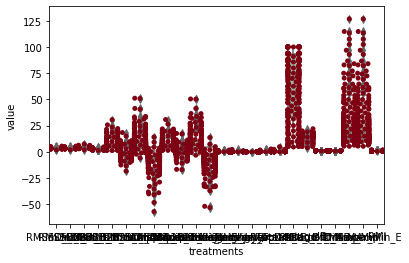

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [33]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
#fvalue, pvalue = stats.f_oneway(df_data['A'], df['B'], df['C'], df['D'])

fvalue, pvalue = stats.f_oneway(df_data['RMSSD_B2B'],df_data['mDi_B2B'],df_data['Max_B2B'],df_data['Min_B2B'],\
                df_data['RMSSD_B2B_diffInAmplitudes'],df_data['mDi_B2B_diffInAmplitudes'],\
                df_data['Max_B2B_diffInAmplitudes'], df_data['Min_B2B_diffInAmplitudes'], \
                df_data['RMSSD_B2B_diffInHeights'], df_data['mDi_B2B_diffInHeights'],\
                df_data['Max_B2B_diffInHeights'], df_data['Min_B2B_diffInHeights'],\
                df_data['Var_I_only'], \
                df_data['Var_E_only'], df_data['Var_I_by_Total'],\
                df_data['Var_Total_IE'], \
                df_data['Var_Diff_IE'], df_data['percentageIE'], 
                df_data['Resp_Rate_per_minute'], \
                               df_data['Ratio_MD_Amp'], df_data['Ratio_RMSD_Amp'], \
                                         df_data['Diff_Max_Min_I'], \
                               df_data['Diff_Max_Min_E'], df_data['RMI'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
# output (ANOVA F and p value)
#                sum_sq    df         F    PR(>F)
#C(treatments)  3010.95   3.0  17.49281  0.000026
#Residual        918.00  16.0       NaN       NaN



650.4380107848201 0.0


/opt/conda/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


sum_sq      df           F  PR(>F)
C(treatments)  1.389263e+06    23.0  650.438011     0.0
Residual       6.485671e+05  6984.0         NaN     NaN

In [36]:
!pip install bioinfokit

     |████████████████████████████████| 92kB 3.8MB/s eta 0:00:011
  Created wheel for bioinfokit: filename=bioinfokit-2.0.8-cp37-none-any.whl size=56749 sha256=608ba0ee5d2fbf48348975760fc7a7635bb4afb656f5ec1f137f341c800ab283
  Stored in directory: /home/pg3fy/.cache/pip/wheels/8c/c0/32/c24c0aa22451965350d909cd5f84700a0f6c62b387ade9ec5c
  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.7-cp37-none-any.whl size=32152 sha256=11861ad2d4a657bef6498c0c28e40e459e75a3dc74c346c8bad97d2fdfd4173e
  Stored in directory: /home/pg3fy/.cache/pip/wheels/05/cb/36/dc8a4eb22f63d864d982a95c721e7c2a2946e1f6246ea3748e
  Created wheel for adjustText: filename=adjustText-0.7.3-cp37-none-any.whl size=7098 sha256=8c37253becd66c2d9ba932cb8e6d7bdcede168ca6fb150f4dee57c072d4ac11a
  Stored in directory: /home/pg3fy/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built bioinfokit matplotlib-venn adjustText


In [37]:
# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary
# output (ANOVA F and p value)
#                 df   sum_sq   mean_sq         F    PR(>F)
#C(treatments)   3.0  3010.95  1003.650  17.49281  0.000026
#Residual       16.0   918.00    57.375       NaN       NaN

# note: if the data is balanced (equal sample size for each group), Type 1, 2, and 3 sums of squares
# (typ parameter) will produce similar results.

df        sum_sq       mean_sq           F  PR(>F)
C(treatments)    23.0  1.389263e+06  60402.730216  650.438011     0.0
Residual       6984.0  6.485671e+05     92.864699         NaN     NaN

In [ ]:
#_Features



from collections import defaultdict
#SummedData = defaultdict(dict)
SummedData=[]

ShannonStats=[]

pdf = PdfPages(PlotFilePath)
for IDs in Date_dict.keys():
    print("id",IDs)
    for eachDate in list(Date_dict[IDs]):
        print(eachDate)
        
        path=MainPath+IDs+"/"
        All_Files=Get_All_csv_pathnames(path)
        #print(i,All_Files)
        print("****************ID ",IDs,eachDate," begins here*****************")
        df_data=pd.DataFrame()
        df_filtered=pd.DataFrame()
        
        for eachfile in All_Files:
            #print(i,eachfile)
            #ProcessResultFilesForPyramids(eachfile,i)
            print(eachfile)
            if ((eachDate in eachfile) and (str(IDs) in eachfile) and (eachfile.endswith(FilenameEnding))):
                print(">>###########",eachDate,IDs,"\n",FilenameEnding,eachfile)
                GetData=ProcessResultFilesForPyramids(eachfile,IDs)
                #print(">>>>>>>>>>>",GetData.empty())
                if(len(GetData)>0):
                    #display(GetData.head())
                    df_data=df_data.append(ProcessResultFilesForPyramids(eachfile,IDs))
                    #display((ProcessResultFilesForPyramids(eachfile,IDs)).head())
                    #display(df_data.tail())
            else:
                print("helloooo","\n",IDs,eachDate,"\n",eachfile,"\n")
        
        
        df_filtered=SubsetDataShannon(df_data)
        
        
        print("hi>>>>>>>>>>>>>>")
        display(df_data.head())
        print("hi>>>>>>>>>>>>>>")
        pShannon=Get_Single_Way_Counted_with_CutOff(df_filtered,"p_Shannon",0.6,"LessThan")
        
        #######################################################
        #Get_Both_Way_Counted_with_CutOff(df,F1,F2,THRESHOLD,Apply)
        #'LessThan', 'Equal', 'F1LessThan', 'F2LessThan', 'F1LessThanAndOtherGT','F2LessThanAndOtherGT'
        Threshold=0.5
        LessThan=Get_Both_Way_Counted_with_CutOff(df_filtered,"p_Shannon","v_Shannon",Threshold,"LessThan")
        Equal=Get_Both_Way_Counted_with_CutOff(df_filtered,"p_Shannon","v_Shannon",0.0,"Equal")
        p_LessThan=Get_Both_Way_Counted_with_CutOff(df_filtered,"p_Shannon","v_Shannon",Threshold,"F1LessThan")
        v_LessThan=Get_Both_Way_Counted_with_CutOff(df_filtered,"p_Shannon","v_Shannon",Threshold,"F2LessThan")
        p_LessThanAnd_v_GT=Get_Both_Way_Counted_with_CutOff(df_filtered,"p_Shannon","v_Shannon",Threshold,"F1LessThanAndOtherGT")
        v_LessThanAnd_p_GT=Get_Both_Way_Counted_with_CutOff(df_filtered,"p_Shannon","v_Shannon",Threshold,"F2LessThanAndOtherGT")
        
        ShannonStats.append([LessThan,Equal,p_LessThan,v_LessThan,p_LessThanAnd_v_GT,v_LessThanAnd_p_GT,eachDate,IDs])
        ##########################################################
        print(pShannon)
        Values=list((GiveFeaturesToBeCountedAndCutOff(df_filtered,FeatureCutOffDict)).values())
        
        Tes=[]
        Tes=[eachDate,IDs]
        Tes.extend(Values)
        print(Tes)
        
        SummedData.append(Tes)
        
        np.sqrt(np.mean(y**2))
        
        test=df_filtered['p_Shannon'].to_list()
        man=(len(list(pos for pos in test if pos>=0.0))/df_filtered.shape[0])*100
        print("Hello",man)
        break
        
        """
        Below_03=(len(list(neg for neg in test if neg<0.3))/df_filtered.shape[0])*100
        Greater_06=(len(list(neg for neg in test if neg>0.6))/df_filtered.shape[0])*100
        SummedData.append([eachDate,IDs,Bet_03_06])
        
        #print("Bet_03_06",Bet_03_06, eachDate)
        #print("Not_Bet_03_06",df_data.shape[0]-Bet_03_06)
        #print("All ",Bet_03_06+Below_03+Greater_06)
        """
        #print("****************ID ",IDs,eachDate," Ends here*****************")
    break
    
    #break
#df_data.head(20)
#display(df_pyr.head())
SummedData

pdf.close()
           

In [32]:
ShannonStatsColumns=["LessThan","Equal","p_LessThan","v_LessThan","p_LessThanAnd_v_GT","v_LessThanAnd_p_GT","eachDate","IDs"]
data=pd.DataFrame(ShannonStats,columns=ShannonStatsColumns)
data.head(20)

LessThan      Equal  p_LessThan  v_LessThan  p_LessThanAnd_v_GT  \
0   67.039106  42.737430   50.000000   50.837989            8.379888   
1   54.819277  34.538153   40.361446   41.365462            7.429719   
2   52.112676  36.971831   40.140845   42.957746            5.985915   
3   72.455090  48.702595   53.892216   60.279441            9.580838   
4   74.485597  53.086420   58.847737   63.786008            6.995885   
5   35.845588  20.404412   23.897059   26.286765            7.536765   
6   35.845588  20.404412   23.897059   26.286765            7.536765   
7   70.664506  41.815235   48.136143   56.564019           11.993517   
8   82.890365  51.827243   59.966777   64.950166            6.810631   
9   81.837161  53.653445   62.212944   65.970772            6.680585   
10  76.288660  47.680412   54.123711   61.340206           10.051546   
11  51.282051  40.080972   41.970310   45.209177            4.183536   
12  69.800570  47.150997   53.561254   56.552707            8.974359   
13  63.257066  29.744280   35.666218   47.510094           16.419919   
14  71.257485  43.512974   47.904192   62.275449            9.580838   
15  80.423280  53.968254   61.375661   64.021164            2.380952   
16  74.146982  49.868766   56.299213   58.792651            3.018373   
17  67.968750  45.833333   51.302083   53.645833            3.645833   
18  60.277778  38.888889   46.388889   45.277778            4.444444   
19  64.814815  56.296296   58.148148   59.259259            3.333333   

    v_LessThanAnd_p_GT    eachDate   IDs  
0             8.100559  2019-07-30  6514  
1             7.429719  2019-07-31  6514  
2             6.690141  2019-08-01  6514  
3             9.181637  2019-08-02  6514  
4             4.115226  2019-08-08  6514  
5             4.227941  2019-08-22  3127  
6             4.227941  2019-08-23  3127  
7             4.862237  2020-04-18  3127  
8             4.651163  2020-04-14  3127  
9             5.219207  2020-04-12  3127  
10            4.639175  2020-04-20  3127  
11            2.834008  2020-01-05  3127  
12            5.982906  2019-03-18  3083  
13            5.114401  2019-05-08  3083  
14            1.397206  2019-06-08  3083  
15            8.994709  2019-08-21  3054  
16            8.530184  2019-08-22  3054  
17            8.072917  2019-08-23  3054  
18           10.555556  2019-10-02  3054  
19            7.407407  2020-01-15  3054

In [25]:
FeaturesOfInterest=list(FeatureCutOffDict.keys())
ColDateID=['Date','IDs']
ColDateID.extend(FeaturesOfInterest)
print(ColDateID)
data=pd.DataFrame(SummedData,columns=ColDateID)
print(FeatureCutOffDict)
data.head(20)


['Date', 'IDs', 'p_Shannon', 'v_Shannon', 'Normal_IE_Ratio_PerMin']
{'p_Shannon': [0.0, 'Equal'], 'v_Shannon': [0.0, 'Equal'], 'Normal_IE_Ratio_PerMin': [0.6, 'GreaterThan']}


Date   IDs  p_Shannon  v_Shannon  Normal_IE_Ratio_PerMin
0   2019-07-30  6514  53.910615  53.631285                0.837989
1   2019-07-31  6514  44.377510  43.775100               13.453815
2   2019-08-01  6514  46.478873  42.605634               22.887324
3   2019-08-02  6514  65.269461  57.884232                9.780439
4   2019-08-08  6514  68.312757  60.082305                1.234568
5   2019-08-22  3127  29.227941  25.367647                5.698529
6   2019-08-23  3127  29.227941  25.367647                5.698529
7   2020-04-18  3127  63.047002  51.377634               19.611021
8   2020-04-14  3127  68.770764  62.126246               22.425249
9   2020-04-12  3127  70.981211  65.762004               31.315240
10  2020-04-20  3127  68.556701  56.958763               44.587629
11  2020-01-05  3127  46.963563  42.780027                3.103914
12  2019-03-18  3083  61.680912  57.407407               72.792023
13  2019-05-08  3083  56.527591  38.358008               84.253028
14  2019-06-08  3083  67.265469  48.902196               64.670659
15  2019-08-21  3054  65.079365  64.814815               44.708995
16  2019-08-22  3054  59.580052  59.448819               37.926509
17  2019-08-23  3054  54.166667  54.166667               31.250000
18  2019-10-02  3054  46.388889  50.000000               35.555556
19  2020-01-15  3054  61.481481  60.370370               22.962963

In [34]:
#data2= pd.DataFrame.from_dict(SummedData)
data3 = pd.DataFrame(SummedData, columns=['Date','IDs','%Normal_Resp_Minute_Windows'])
#data2=data2[["Date"]].astype(str) 
data3.head(20)
#data2=data2[data2['Date']!='2019-10-04'] # Low 3054 vs 3083
#data2=data2[data2['Date']!='2020-03-05'] #High 3054 vs 3083 

data3=data3.sort_values(["IDs", "Date"], ascending = (True, True))
data1=data2
display(data2.head())
display(data1.head())

data2 = pd.DataFrame()
data2 = pd.concat([data1,data3])


ValueError: 3 columns passed, passed data had 5 columns

In [46]:
print(data2['Date'].unique())
print(data3['Date'].unique())

['2019-12-05' '2020-04-04' '2020-04-06' '2020-04-10' '2020-01-05'
 '2020-04-12' '2020-04-14' '2020-04-18']
['2020-01-05' '2020-04-12' '2020-04-14' '2020-04-18']


In [10]:
#data2= pd.DataFrame.from_dict(SummedData)
data2 = pd.DataFrame(SummedData, columns=['Date','IDs','%Normal_Resp_Minute_Windows'])
#data2=data2[["Date"]].astype(str) 
data2.head(20)
#data2=data2[data2['Date']!='2019-10-04'] # Low 3054 vs 3083
#data2=data2[data2['Date']!='2020-03-05'] #High 3054 vs 3083 

data2=data2.sort_values(["IDs", "Date"], ascending = (True, True))
data2.head()

Date   IDs  %Normal_Resp_Minute_Windows
1  2019-12-05  3127                    28.469774
2  2020-04-04  3127                    44.188630
3  2020-04-06  3127                    16.575320
0  2020-04-10  3127                    30.032326

In [15]:
#!pip install ggplot
#!pip install tslib
Dates=['2019-12-05', '2020-04-06','2020-04-10' '2020-04-10', '2020-01-05', '2020-04-14']

boolean_series = data2.Date.isin(Dates)
data2 = data2[boolean_series]

#data2=data2[(data2['Date']=='2020-01-05') or (data2['Date']=='2020-04-14')]# || data2['Date']=='2020-04-10']
#data2=data2[(data2['Date']=='2020-01-05') or (data2['Date']=='2020-04-14')]
data2.head()

Date   IDs  %Normal_Resp_Minute_Windows
1  2019-12-05  3127                    28.469774
3  2020-04-06  3127                    16.575320
0  2020-04-10  3127                    30.032326
0  2020-01-05  3127                    23.265077
2  2020-04-14  3127                    34.928144

In [19]:
data2=data2[(data2['Date']!='2020-04-10')]

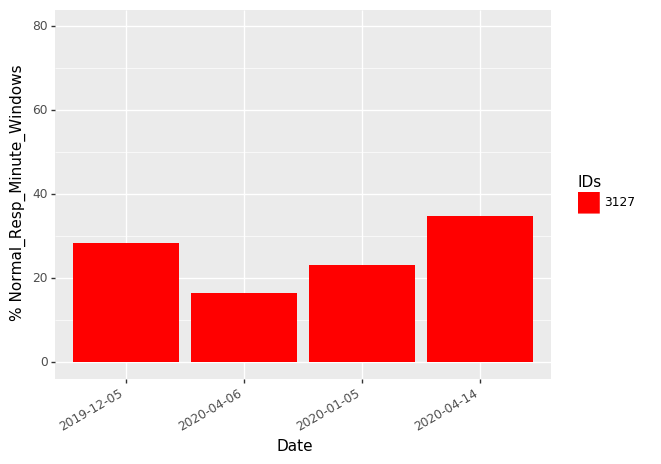

<ggplot: (8768013033585)>

In [20]:
#from ggplot import *
#import pandas as pd

from plotnine import *
from plotnine.data import diamonds
#from plotnine import *
#from plotnine.data import diamonds
#df = pd.DataFrame({"x":[1,2,3,4], "y":[1,3,4,2]})

fill_clrs={'3127':'red'}#{
#fill_clrs = {'3054': 'red','3083': 'blue'}
x=data2['Date'].to_list()
ggplot(data2, aes(x="Date", y="%Normal_Resp_Minute_Windows",fill='IDs')) +\
geom_bar(stat="identity") + theme(axis_text_x  = element_text(angle = 30, hjust = 1))+\
scale_fill_manual(fill_clrs)+\
scale_x_discrete(limits=x)+\
ylim(0, 80)+\
xlab("Date") + ylab("% Normal_Resp_Minute_Windows")#+\
#facet_wrap( "IDs" )

#scale_fill_brewer() +\



In [ ]:
2019-12-05 (17 bpm), 2020-04-06 (16 bpm), 2020-04-10 (16 bpm), 2020-01-05(20 bpm), 2020-04-14 (22 bpm)

2020-04-10,16
2019-12-05,17
2020-04-04,16
2020-04-06,16
2019-11-05,16
2020-04-21,15

2019-06-10,20
2020-04-20,20

2020-04-12,38
2020-01-05,20
2020-04-14,22
2020-04-18,20

 
2020-01-05(20 bpm), ,  2020-04-18(20 bpm)




AttributeError: 'Rectangle' object has no property 'c'

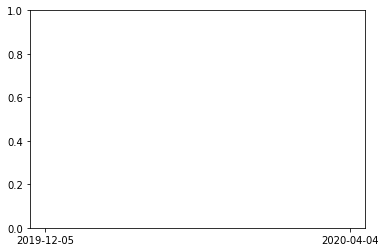

In [18]:
fig, ax = plt.subplots()

colors = {'3054':'red', '3083':'blue'}


ax.bar(data2['Date'], data2['%Normal_Resp_Minute_Windows'], c=data2['IDs'].map(colors))

plt.show()

In [ ]:
        df_filtered=SubsetData(df_data)
        df_filtered=df_filtered[df_filtered['I_E']<5]
        df_filtered2=df_filtered.groupby(['I_E'])['I_E'].count().reset_index(name='count')
        #print(df_filtered2)
        df_filtered2=df_filtered2[df_filtered2['I_E']<5]
        fig = plt.figure(figsize=(12,4))
        SummedData
        plt.subplot(1, 2, 1)
        x=df_filtered2['I_E'].to_list()
        plt.bar(df_filtered2['I_E'].to_list(),df_filtered2['count'].to_list(),width = 0.1,edgecolor='black')
        plt.xticks(np.arange(min(x), max(x)+1, 0.4))
        plt.title("I:E Ratio plot for "+str(IDs)+" "+" "+eachDate)
        plt.xlabel('I:E Ratio')
        plt.ylabel('Count')
        #plt.show()
        
        #print()
        test=df_data['I_E'].to_list()
        Bet_03_06=(len(list(pos for pos in test if  0.3<= pos <= 0.6))/df_filtered.shape[0])*100
        Below_03=(len(list(neg for neg in test if neg<0.3))/df_filtered.shape[0])*100
        Greater_06=(len(list(neg for neg in test if neg>0.6))/df_filtered.shape[0])*100
        
        print(df_filtered.shape,Bet_03_06,Below_03,Greater_06)
        x2=['<0.3','0.3-0.6','>0.6']
        v=[20,40,60,80,100]
        y2=[Below_03,Bet_03_06,Greater_06]
        plt.subplot(1, 2, 2)
        plt.bar(x2,y2,width = 0.1,edgecolor='black')
        plt.title("Percentages of I:E Ratio "+str(IDs)+" "+" "+eachDate)
        plt.xlabel('Windows of I:E Ratio')
        plt.ylabel('Percentages')
        plt.show()
        pdf.savefig(fig)

id 3127
2020-01-05
****************ID  3127 2020-01-05  begins here*****************


Start                      End  I_E
4939  2020-01-05 02:07:40.870  2020-01-05 02:07:42.500  3.5
4940  2020-01-05 02:07:42.500  2020-01-05 02:07:45.855  1.4
4941  2020-01-05 02:07:45.855  2020-01-05 02:07:47.390  0.3
4942  2020-01-05 02:07:47.390  2020-01-05 02:07:48.945  1.4
4943  2020-01-05 02:07:48.945  2020-01-05 02:07:49.970  1.3

Start                      End  I_E
4710  2020-01-05 04:08:04.630  2020-01-05 04:08:06.770  1.4
4711  2020-01-05 04:08:06.770  2020-01-05 04:08:08.370  0.7
4712  2020-01-05 04:08:08.370  2020-01-05 04:08:10.340  2.2
4713  2020-01-05 04:08:10.340  2020-01-05 04:08:12.200  0.7
4714  2020-01-05 04:08:12.200  2020-01-05 04:08:14.210  1.4

Start                      End  I_E
4854  2020-01-05 06:08:32.660  2020-01-05 06:08:34.450  1.9
4855  2020-01-05 06:08:34.450  2020-01-05 06:08:35.980  0.8
4856  2020-01-05 06:08:35.980  2020-01-05 06:08:38.240  2.0
4857  2020-01-05 06:08:38.240  2020-01-05 06:08:41.020  1.1
4858  2020-01-05 06:08:41.020  2020-01-05 06:08:42.250  0.3

Start                      End  I_E
2607  2020-01-05 07:53:54.555  2020-01-05 07:53:56.725  1.0
2608  2020-01-05 07:53:56.725  2020-01-05 07:53:58.990  0.9
2609  2020-01-05 07:53:58.990  2020-01-05 07:54:01.075  0.9
2610  2020-01-05 07:54:01.075  2020-01-05 07:54:03.565  1.1
2611  2020-01-05 07:54:03.565  2020-01-05 07:54:06.120  0.6

Start                      End  I_E
1969  2020-01-05 11:36:21.500  2020-01-05 11:36:23.950  1.1
1970  2020-01-05 11:36:23.950  2020-01-05 11:36:26.130  0.9
1971  2020-01-05 11:36:26.130  2020-01-05 11:36:28.980  1.2
1972  2020-01-05 11:36:28.980  2020-01-05 11:36:30.750  1.1
1973  2020-01-05 11:36:30.750  2020-01-05 11:36:32.870  1.0

Start                      End  I_E
1242  2020-01-05 14:02:15.720  2020-01-05 14:02:18.380  0.8
1243  2020-01-05 14:02:18.380  2020-01-05 14:02:19.700  1.0
1244  2020-01-05 14:02:19.700  2020-01-05 14:02:21.380  1.2
1245  2020-01-05 14:02:21.380  2020-01-05 14:02:23.090  1.2
1246  2020-01-05 14:02:23.090  2020-01-05 14:02:25.810  0.9

Start                      End  I_E
2254  2020-01-05 16:04:33.020  2020-01-05 16:04:35.320  1.0
2255  2020-01-05 16:04:35.320  2020-01-05 16:04:37.540  1.0
2256  2020-01-05 16:04:37.540  2020-01-05 16:04:39.945  1.0
2257  2020-01-05 16:04:39.945  2020-01-05 16:04:42.440  0.9
2258  2020-01-05 16:04:42.440  2020-01-05 16:04:44.950  0.9

Start                      End  I_E
851  2020-01-05 16:47:03.700  2020-01-05 16:47:06.280  0.7
852  2020-01-05 16:47:06.280  2020-01-05 16:47:08.880  0.7
853  2020-01-05 16:47:08.880  2020-01-05 16:47:11.820  0.8
854  2020-01-05 16:47:11.820  2020-01-05 16:47:14.140  0.9
855  2020-01-05 16:47:14.140  2020-01-05 16:47:15.800  1.1

Start                      End  I_E
1910  2020-01-05 22:07:36.355  2020-01-05 22:07:38.355  1.1
1911  2020-01-05 22:07:38.355  2020-01-05 22:07:40.775  0.9
1912  2020-01-05 22:07:40.775  2020-01-05 22:07:43.190  0.8
1913  2020-01-05 22:07:43.190  2020-01-05 22:07:45.090  1.0
1914  2020-01-05 22:07:45.090  2020-01-05 22:07:47.760  1.0

Start                      End  I_E
2776  2020-01-06 00:02:22.315  2020-01-06 00:02:24.685  0.8
2777  2020-01-06 00:02:24.685  2020-01-06 00:02:26.865  0.9
2778  2020-01-06 00:02:26.865  2020-01-06 00:02:29.005  1.0
2779  2020-01-06 00:02:29.005  2020-01-06 00:02:31.205  1.0
2780  2020-01-06 00:02:31.205  2020-01-06 00:02:33.295  1.0

>> /home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_PEAK_Detection/IE_MACResults_WithInterpolation/3127/Combined.csv
(28162, 3)
(28162, 3)
       I_E  count
0   -574.8      1
1     -0.0     54
2      0.1    116
3      0.2    184
4      0.3    351
..     ...    ...
133   98.0      1
134  107.0      1
135  111.2      1
136  158.9      1
137  337.8      1

[138 rows x 2 columns]


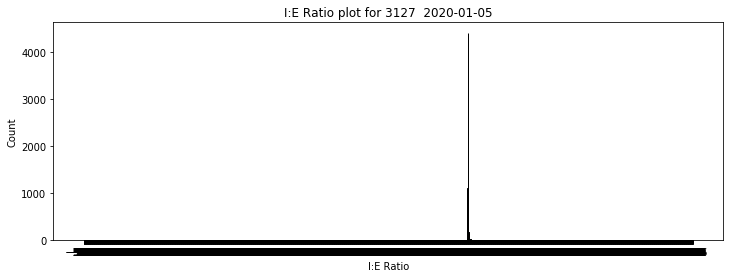

NameError: name 'df' is not defined

In [10]:
#MainPath='/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio/IE_MACResults/'
PlotFilePath=MainPath+"Plots3054_Progression.pdf"
if os.path.exists(PlotFilePath):
    os.remove(PlotFilePath)
    
#After removing the previous file create new file
pdf = PdfPages(PlotFilePath)


for IDs in Date_dict.keys():
    print("id",IDs)
    for eachDate in list(Date_dict[IDs]):
        print(eachDate)
        
        path=MainPath+IDs+"/"
        All_Files=Get_All_csv_pathnames(path)
        #print(i,All_Files)
        print("****************ID ",IDs,eachDate," begins here*****************")
        df_data=pd.DataFrame()
        df_filtered=pd.DataFrame()
        
        for eachfile in All_Files:
            #print(i,eachfile)
            #ProcessResultFilesForPyramids(eachfile,i)
            if ((eachDate in eachfile) and (str(IDs) in eachfile) and ("RAW_IE_Ratio" in eachfile)):
                #print(">>",eachDate,IDs,"RAW_IE_Ratio",eachfile)
                GetData=ProcessResultFilesForPyramids(eachfile,IDs)
                #print(GetData.shape[0])
                if(GetData.shape[0]>0):
                    #display(GetData.head())
                    df_data=df_data.append(ProcessResultFilesForPyramids(eachfile,IDs))
                    display(df_data.tail())
        df_data.to_csv(path+"Combined.csv",index=False)
        print(">>",path+"Combined.csv")
        print(df_data.shape)
        
        df_filtered=SubsetData(df_data)
        df_filtered2=df_filtered.groupby(['I_E'])['I_E'].count().reset_index(name='count')
        print(df_filtered2)
            
        fig = plt.figure(figsize=(12,4))
        x=df_filtered2['I_E'].to_list()
        plt.bar(df_filtered2['I_E'].to_list(),df_filtered2['count'].to_list(),width = 0.1,edgecolor='black')
        plt.xticks(np.arange(min(x), max(x)+1, 0.2))
        plt.title("I:E Ratio plot for "+str(IDs)+" "+" "+eachDate)
        plt.xlabel('I:E Ratio')
        plt.ylabel('Count')
        plt.show()
        
        
        Bet_03_06=(len(list(x for x in df_filtered2['I_E'].to_list() if  0.3<= x <= 0.6))/df.shape[0])*100
        Not_Bet_03_06=(len(list(x for x in df_filtered2['I_E'].to_list() if  0.3> x > 0.6))/df.shape[0])*100
        x2=['Between_03_06','Not_Between_03_06']
        y2=[Bet_03_06,Not_Bet_03_06]
        
        pdf.savefig(fig)
        
        print("****************ID ",IDs,eachDate," Ends here*****************")
    #break
    #break
#df_data.head(20)
#display(df_pyr.head())
pdf.close()
           

id 3127
2020-01-05
****************ID  3127 2020-01-05  begins here*****************
>> /home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_PEAK_Detection/IE_MACResults_WithInterpolation/3127/Combined.csv
(28162, 3)
(28162, 3)
(28162, 2) 15.790781904694267 1.2605638804062211 82.9486542148995


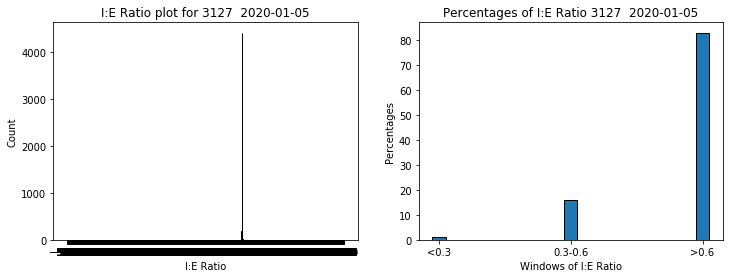

****************ID  3127 2020-01-05  Ends here*****************
2020-04-12
****************ID  3127 2020-04-12  begins here*****************
>> /home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_PEAK_Detection/IE_MACResults_WithInterpolation/3127/Combined.csv
(11489, 3)
(11489, 3)
(11489, 2) 27.051962746975367 1.227260858212203 71.72077639481242


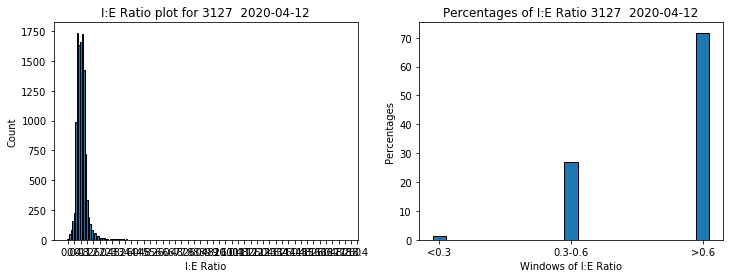

****************ID  3127 2020-04-12  Ends here*****************
2020-04-14
****************ID  3127 2020-04-14  begins here*****************
>> /home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_PEAK_Detection/IE_MACResults_WithInterpolation/3127/Combined.csv
(14106, 3)
(14106, 3)
(14106, 2) 23.86927548560896 0.9712179214518644 75.15950659293918


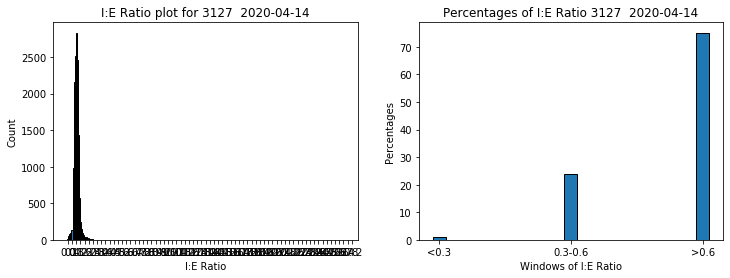

****************ID  3127 2020-04-14  Ends here*****************
2020-04-18
****************ID  3127 2020-04-18  begins here*****************
>> /home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_PEAK_Detection/IE_MACResults_WithInterpolation/3127/Combined.csv
(14265, 3)
(14265, 3)
(14265, 2) 26.168944970206798 1.3249211356466877 72.5061338941465


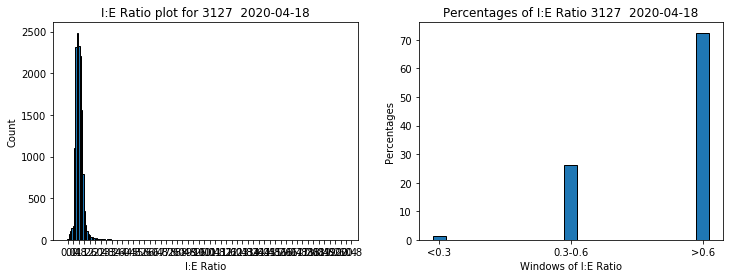

****************ID  3127 2020-04-18  Ends here*****************
2020-04-20
****************ID  3127 2020-04-20  begins here*****************
>> /home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_PEAK_Detection/IE_MACResults_WithInterpolation/3127/Combined.csv
(0, 0)
(0, 0)


KeyError: 'Start'

In [11]:
#MainPath='/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio/IE_MACResults/'
PlotFilePath=MainPath+"Plots3054Progression.pdf"
if os.path.exists(PlotFilePath):
    os.remove(PlotFilePath)
    
#After removing the previous file create new file
pdf = PdfPages(PlotFilePath)


for IDs in Date_dict.keys():
    print("id",IDs)
    for eachDate in list(Date_dict[IDs]):
        print(eachDate)
        
        path=MainPath+IDs+"/"
        All_Files=Get_All_csv_pathnames(path)
        #print(i,All_Files)
        print("****************ID ",IDs,eachDate," begins here*****************")
        df_data=pd.DataFrame()
        df_filtered=pd.DataFrame()
        
        for eachfile in All_Files:
            #print(i,eachfile)
            #ProcessResultFilesForPyramids(eachfile,i)
            if ((eachDate in eachfile) and (str(IDs) in eachfile) and ("RAW_IE_Ratio" in eachfile)):
                #print(">>",eachDate,IDs,"RAW_IE_Ratio",eachfile)
                GetData=ProcessResultFilesForPyramids(eachfile,IDs)
                #print(GetData.shape[0])
                if(GetData.shape[0]>0):
                    #display(GetData.head())
                    df_data=df_data.append(ProcessResultFilesForPyramids(eachfile,IDs))
                    #display(df_data.tail())
        df_data.to_csv(path+"Combined.csv",index=False)
        print(">>",path+"Combined.csv")
        print(df_data.shape)
        
        df_filtered=SubsetData(df_data)
        df_filtered2=df_filtered.groupby(['I_E'])['I_E'].count().reset_index(name='count')
        #print(df_filtered2)
            
        fig = plt.figure(figsize=(12,4))
        
        plt.subplot(1, 2, 1)
        x=df_filtered2['I_E'].to_list()
        plt.bar(df_filtered2['I_E'].to_list(),df_filtered2['count'].to_list(),width = 0.1,edgecolor='black')
        plt.xticks(np.arange(min(x), max(x)+1, 0.4))
        plt.title("I:E Ratio plot for "+str(IDs)+" "+" "+eachDate)
        plt.xlabel('I:E Ratio')
        plt.ylabel('Count')
        #plt.show()
        
        #print()
        test=df_data['I_E'].to_list()
        Bet_03_06=(len(list(pos for pos in test if  0.3<= pos <= 0.6))/df_filtered.shape[0])*100
        Below_03=(len(list(neg for neg in test if neg<0.3))/df_filtered.shape[0])*100
        Greater_06=(len(list(neg for neg in test if neg>0.6))/df_filtered.shape[0])*100
        
        print(df_filtered.shape,Bet_03_06,Below_03,Greater_06)
        x2=['<0.3','0.3-0.6','>0.6']
        v=[20,40,60,80,100]
        y2=[Below_03,Bet_03_06,Greater_06]
        plt.subplot(1, 2, 2)
        plt.bar(x2,y2,width = 0.1,edgecolor='black')
        plt.title("Percentages of I:E Ratio "+str(IDs)+" "+" "+eachDate)
        plt.xlabel('Windows of I:E Ratio')
        plt.ylabel('Percentages')
        plt.show()
        pdf.savefig(fig)
        
        print("****************ID ",IDs,eachDate," Ends here*****************")
    #break
    #break
#df_data.head(20)
#display(df_pyr.head())
pdf.close()
           

In [ ]:
def labelChange(lab,test):
    lab2=[]
    count=0
    for i in range(len(lab)):
        if lab[i] in test:
            count=count+1
            #lab2[i] = 0

    C_Index=round(((count/len(lab))*100),2)
    return(C_Index)
    
test=[0,1,2,3]
COPD_Index=labelChange(label,test)
print(COPD_Index)